$$
\Large{ \text {Perceptron Learning Algorithm (PLA)}}
$$
$$
\Large \text{Binh Tran}
$$

<script>
    var code_show=true; //true -> hide code at first

    function code_toggle() {
        $('div.prompt').hide(); // always hide prompt

        if (code_show){
            $('div.input').hide();
        } else {
            $('div.input').show();
        }
        code_show = !code_show
    }
    $( document ).ready(code_toggle);
</script>

# Introduction

* Perceptron Learning Algorithm (PLA) sort term is **Perceptron**.

* Simple classification algoritm

* Foundation of **Neuron Networks** & **Deep Learning**

Suppose we have two labeled data sets illustrated in Figure

<img  src="TQ1L8PBKFX627JWCLE1P9N7WUGD21XAG.png"/>

There are two classes
* **Class 1**: Blue points
* **Class 2**: Red points

## Problem:

* Input two set of labeled classes

* Find a line so that all points in **class 1 are on one side**, and all of the points in **class 2 lie on the other side** of the line

> With assume that there exists a flat line like that and this line is called **boundary**

## Perceptron (PLA)

<img  src="TMYC7N91AAITDWJ6QLOAHBJL0AY0YAXP.png" width=600/>

$$\mathbf{X} = [\mathbf{x}_1, \mathbf{x}_2, \dots, \mathbf{x}_N] \in \mathbb{R}^{d \times N}$$
> Where
$$ \text{ d: number of features }$$
$$ \text{ N: number of examples}$$

$$\mathbf{y} = [y_1, y_2, \dots, y_N] \in \mathbb{R}^{1\times N}$$
> Where
$$y = 1 ~ if ~ x_i \in class ~ 1$$
$$y = 0 ~ if ~ x_i \in class ~ 2$$

** Assume we found the boundary as below: **
\begin{eqnarray}
f_{\mathbf{w}}(\mathbf{x}) &=&  w_0 + w_1x_1 + \dots + w_dx_d \\ 
&=&\mathbf{w}^T\mathbf{\bar{x}} = 0
\end{eqnarray}

**To simple we work with d = 2 **
\begin{eqnarray}
w_0 + w_1 x_1 + w_2 x_2 = 0
\end{eqnarray}

<img  src="TMYC7N91AAITDWJ6QLOAHBJL0AY0YAXP.png" width=600/>

* From figure we see:
 
 $$\text{label}(\mathbf{x}) = 1 ~\text{if}~ \mathbf{w}^T\mathbf{x} \geq 0, \text{otherwise} -1 \\
 $$

$$ \text{or} \\
 \text{label}(\mathbf{x}) = \text{sgn}(\mathbf{w}^T\mathbf{x}) $$

** Buid lost function **

___
> We need to build the lost function with $\mathbf{w}$ as parameter

<img  src="B2AGS3I2UXPSKM6G2NJKCVHLSC31LS7J.png" width=600/>

* Points are **circled as points** are **misclassified** (**fault classification**).

> ** The simplest loss function is the function that counts the number of points misclassied **


> And we try to **minimizes this function**
\begin{eqnarray} 
J_1(\mathbf{w}) = \sum_{\mathbf{x}_i \in \mathcal{M}} (-y_i\text{sgn}(\mathbf{w}^T\mathbf{x_i})) \\
where ~ \mathcal{M}: \text{ the set of misclassifed}
\end{eqnarray}

* ** This function is discrete, cannot calculate the derivative so it is difficult to optimize.**

* We need to find another loss function for optimization is easier

Consider the following loss function:
\begin{eqnarray}J(\mathbf{w}) = \sum_{\mathbf{x}_i \in \mathcal{M}} (-y_i\mathbf{w}^T\mathbf{x_i})\end{eqnarray}

* **Note that:**

The further the boundary of $x_i$, the greater the value of  $(-y_i\mathbf{w}^T\mathbf{x_i})$, means the larger the deviation

The smallest value of this loss function is zero if no point is misclassified.



**$J(\mathbf{w})$ is differentiable function so we can use Gradient Descent or Stochastic Gradient Descent (SGD) to optimize this loss function.**

* With any misclassified example $x_i$ lost function becomes 
$$J(\mathbf{w}; \mathbf{x}_i; y_i) = -y_i\mathbf{w}^T\mathbf{x}_i$$

Gradient function:

$$\nabla_{\mathbf{w}}J(\mathbf{w}; \mathbf{x}_i; y_i) = -y_i\mathbf{x}_i$$



So the update rule is:
$$
\mathbf{w} = \mathbf{w} + \eta y_i\mathbf{x}_i\\
 with ~ \eta \text{ is learning rate.} 
$$

Note that:
* if $\mathbf{w}$ is a solution then $\eta \mathbf{w}$ is a solution with η being a nonzero. 
* So if $\mathbf{w}_0$ is close to 0 and the number of loops large enough, we can assume learning rate $\eta = 1 $

$\Rightarrow \text {the update rule will be:}$


$$\mathbf{w}_{t+1} = \mathbf{w}_{t} + y_i\mathbf{x}_i$$

**Try to calculate:** $$\large \mathbf{w}_{t+1}^T\mathbf{x}_i$$

\begin{eqnarray}
\large \mathbf{w}_{t+1}^T\mathbf{x}_i &=& \large (\mathbf{w}_{t} + y_i\mathbf{x}_i)^T\mathbf{x}_{i} \\
&=& \large \mathbf{w}_{t}^T\mathbf{x}_i + y_i ||\mathbf{x}_i||_2^2
\end{eqnarray}

\begin{eqnarray}
In~case of &&~ y_i = 1, \\
&& x_i \text{ is misclassifed so }\\
\mathbf{w}_{t}^T\mathbf{x}_i &<& 0 \\
y_i ||\mathbf{x}_i||_2^2 &=& ||\mathbf{x}_i||_2^2 \geq 1 ~ (remember ~ x_0 = 1)\\
&\Rightarrow& \mathbf{w}_{t+1}^T\mathbf{x}_i > \mathbf{w}_{t}^T\mathbf{x}_i \\
&\Rightarrow& \mathbf{w}_{t + 1} \text{ moves towards making } x_i \text{ properly classed.} \\
\text{ the same } with ~ y_i = 0
\end{eqnarray}

## Summary of PLA

> ** 1. Randomly select a $\mathbf{w}$ vector with elements near 0.**

> 2.** Browse randomly through each data point $x_i$:**

 
>   1. if $x_i$ is properly classified, ie: $\text{sgn}(\mathbf{w}^T\mathbf{x}_i) = y_i \Rightarrow $ do nothing 
>   2. if $x_i$ is misclassifed $\Rightarrow$ update $\mathbf{w}$ by the follow 
 $$\mathbf{w} = \mathbf{w} + y_i\mathbf{x}_i$$

## Example

### Create data

```python
# generate data
# list of points 
import numpy as np 
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
np.random.seed(2)

means = [[2, 2], [4, 2]]
cov = [[.3, .2], [.2, .3]]
N = 10
X0 = np.random.multivariate_normal(means[0], cov, N).T
X1 = np.random.multivariate_normal(means[1], cov, N).T

X = np.concatenate((X0, X1), axis = 1)
y = np.concatenate((np.ones((1, N)), -1*np.ones((1, N))), axis = 1)
# Xbar 
X = np.concatenate((np.ones((1, 2*N)), X), axis = 0)
```

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
np.random.seed(2)

means = [[2, 2], [4, 2]]
cov = [[.3, .2], [.2, .3]]
N = 10
X0 = np.random.multivariate_normal(means[0], cov, N).T
X1 = np.random.multivariate_normal(means[1], cov, N).T

X = np.concatenate((X0, X1), axis = 1)
y = np.concatenate((np.ones((1, N)), -1*np.ones((1, N))), axis = 1)
# Xbar 
X = np.concatenate((np.ones((1, 2*N)), X), axis = 0)


### virtualize data

```python
import matplotlib.pyplot as plt

plt.plot(X0[0], X0[1], 'ro')
plt.plot(X1[0], X1[1], 'b^')

plt.show()
```

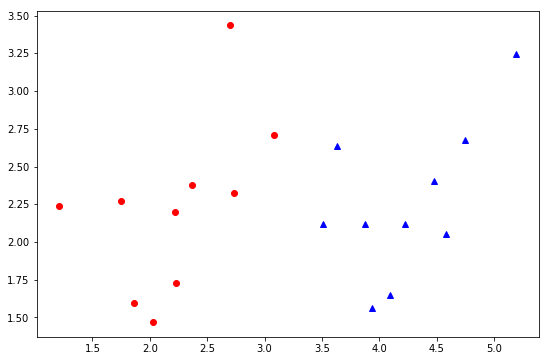

In [2]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(9, 6))
plt.plot(X0[0], X0[1], 'ro')
plt.plot(X1[0], X1[1], 'b^')

plt.show()

```python
def h(w, x):    
    return np.sign(np.dot(w.T, x))

def has_converged(X, y, w):    
    return np.array_equal(h(w, X), y) 

def perceptron(X, y, w_init):
    w = [w_init]
    N = X.shape[1]
    d = X.shape[0]
    mis_points = []
    while True:
        # mix data 
        mix_id = np.random.permutation(N)
        for i in range(N):
            xi = X[:, mix_id[i]].reshape(d, 1)
            yi = y[0, mix_id[i]]
            if h(w[-1], xi)[0] != yi: # misclassified point
                mis_points.append(mix_id[i])
                w_new = w[-1] + yi*xi 
                w.append(w_new)
                
        if has_converged(X, y, w[-1]):
            break
    return (w, mis_points)

d = X.shape[0]
w_init = np.random.randn(d, 1)
(w, m) = perceptron(X, y, w_init)
```

In [3]:
#
def h(w, x):    
    return np.sign(np.dot(w.T, x))

def has_converged(X, y, w):    
    return np.array_equal(h(w, X), y) 

def perceptron(X, y, w_init):
    w = [w_init]
    N = X.shape[1]
    d = X.shape[0]
    mis_points = []
    while True:
        # mix data 
        mix_id = np.random.permutation(N)
        for i in range(N):
            xi = X[:, mix_id[i]].reshape(d, 1)
            yi = y[0, mix_id[i]]
            if h(w[-1], xi)[0] != yi: # misclassified point
                mis_points.append(mix_id[i])
                w_new = w[-1] + yi*xi 
                w.append(w_new)
                
        if has_converged(X, y, w[-1]):
            break
    return (w, mis_points)

d = X.shape[0]
w_init = np.random.randn(d, 1)
(w, m) = perceptron(X, y, w_init) 

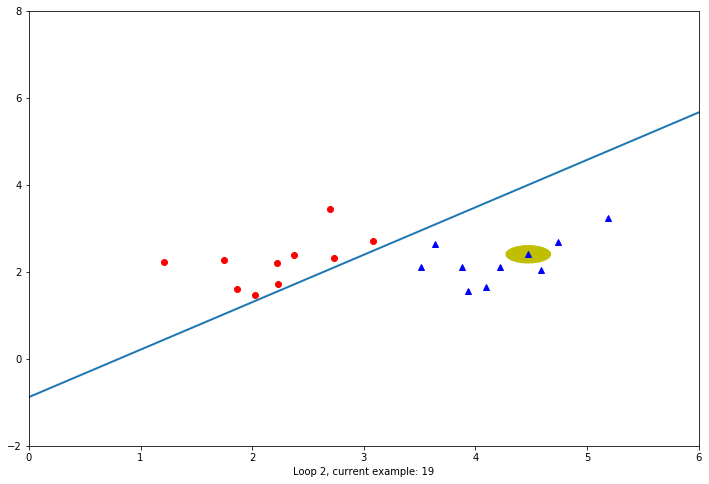

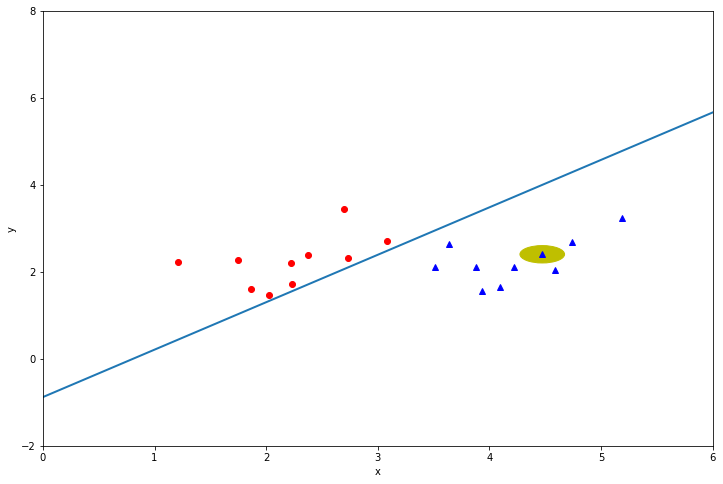

In [4]:
# Demo with graphics
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as display
import time


fig = plt.figure(figsize=(12, 8))
x1, x2 = 0, 6
y1, y2 = -2, 8


def plot_eamples():
    plt.plot(X0[0], X0[1], 'ro')
    plt.plot(X1[0], X1[1], 'b^')

def plot_point(ax, x, y):
    circle1 = plt.Circle((x,y), .2, color='y')
    ax.add_artist(circle1)
    
def plot_line(w):
    xt = [x1, x2]
    yt = w[0] + w[1] * xt
    if w[2] != 0 :
        yt = yt / w[2]
    plt.plot(xt, -yt, '-', lw=2)

def h(w, x):    
    return np.sign(np.dot(w.T, x))

def has_converged(X, y, w):    
    return np.array_equal(h(w, X), y) 


def perceptron(X, y, w_init):
    w = [w_init]
    N = X.shape[1]
    d = X.shape[0]
    mis_points = []
    j = 0
    while True:
        # mix data 
        mix_id = np.random.permutation(N)
        for i in range(N):
            xi = X[:, mix_id[i]].reshape(d, 1)
            yi = y[0, mix_id[i]]
            
            ax = plt.gca()
            ax.cla() # clear things for fresh plot
            # change default range so that new circles will work
            ax.set_xlim((x1, x2))
            ax.set_ylim((y1, y2))
            
            ax.set_xlabel("Loop %i, current example: %i" % (j+1, i))
            
            plot_point(ax, xi[1], xi[2])
            plot_line(w[-1])
            plot_eamples()
            display.clear_output(wait=True)
            display.display(plt.gcf())
            plt.xlabel('x', fontname="Arial", fontsize=10)
            plt.ylabel('y', fontname="Arial", fontsize=10)
            time.sleep(0.1)
            
            if h(w[-1], xi)[0] != yi: # misclassified point
                mis_points.append(mix_id[i])
                w_new = w[-1] + yi*xi 
                w.append(w_new)
                
        j = j + 1
        if has_converged(X, y, w[-1]):
            break
            
        
    return (w, mis_points)

d = X.shape[0]
w_init = np.random.randn(d, 1)
(w, m) = perceptron(X, y, w_init)

# Proofs of convergence

Assume that $w^*$ is a solution of the problem

** For every $\alpha > 0$, if $w^*$ is the solution, $\alpha w^*$ is also the solution of the problem. **

** We consider **

$$
u_{\alpha}(t) = ||\mathbf{w}_{t} - \alpha\mathbf{w}^*||_2^2 \\
where ~ x_i  \text{ is a misclassified}
$$

** We have:**

\begin{eqnarray}
u_{\alpha}(t+1) &=& ||\mathbf{w}_{t+1} - \alpha \mathbf{w}^*||_2^2 \\
&=& ||\mathbf{w}_{t} + y_i\mathbf{x}_i - \alpha\mathbf{w}^*||_2^2 \\
&=& ||\mathbf{w}_{t} -\alpha\mathbf{w}^*||_2^2 + y_i^2||\mathbf{x}_i||_2^2 + 2y_i\mathbf{x}_i^T(\mathbf{w} - \alpha\mathbf{w}^*)\\
\end{eqnarray}

** Because:**
\begin{eqnarray}
&& y_i^2 = 1 \\
&& u_{\alpha}(t) = ||\mathbf{w}_{t} - \alpha\mathbf{w}^*||_2^2 \\
and && 2y_i\mathbf{x}_i^T\mathbf{w}_{t} < 0 \\
\Rightarrow u_{\alpha}(t+1) &=& ||\mathbf{w}_{t} -\alpha\mathbf{w}^*||_2^2 + y_i^2||\mathbf{x}_i||_2^2 + 2y_i\mathbf{x}_i^T(\mathbf{w} - \alpha\mathbf{w}^*)\\
&<& u_{\alpha}(t) \ + ||\mathbf{x}_i||_2^2 - 2\alpha y_i\mathbf{x}_i^T \mathbf{w}^*
\end{eqnarray}

\begin{eqnarray}
\beta^2 &\triangleq& \max_{i=1, 2, \dots, N}||\mathbf{x}_i||_2^2 \\
\gamma &\triangleq& \min_{i=1, 2, \dots, N} y_i\mathbf{x}_i^T\mathbf{w}^*
\end{eqnarray}

** Choose **

$$\alpha = \frac{\beta^2}{\gamma}$$

We have:

$$0 \leq u_{\alpha}(t+1) < u_{\alpha}(t) + \beta^2 - 2\alpha\gamma = u_{\alpha}(t) - \beta^2$$

**It means:**
 * If exist misclassified point 
\begin{eqnarray} 
     \Rightarrow &&u_{\alpha}(t)\text{ is the sequence of decreases} \\
     and &&\mathbf{\text{ bounded below }} \text{by 0} \\
     and &&\text { The next element is smaller than previouse element } \\
     \Rightarrow &&\text{ to a time that will not have misclassified point } \\
     \Rightarrow &&\text{ contradictory with the assumption}    
\end{eqnarray}

** => Not exist misclassified point **

# The first Neural Network model

The function of perceptron $label(\mathbf{x})=sgn(\mathbf{w}^T\mathbf{x})$ can be descripted the below figure (called network) :

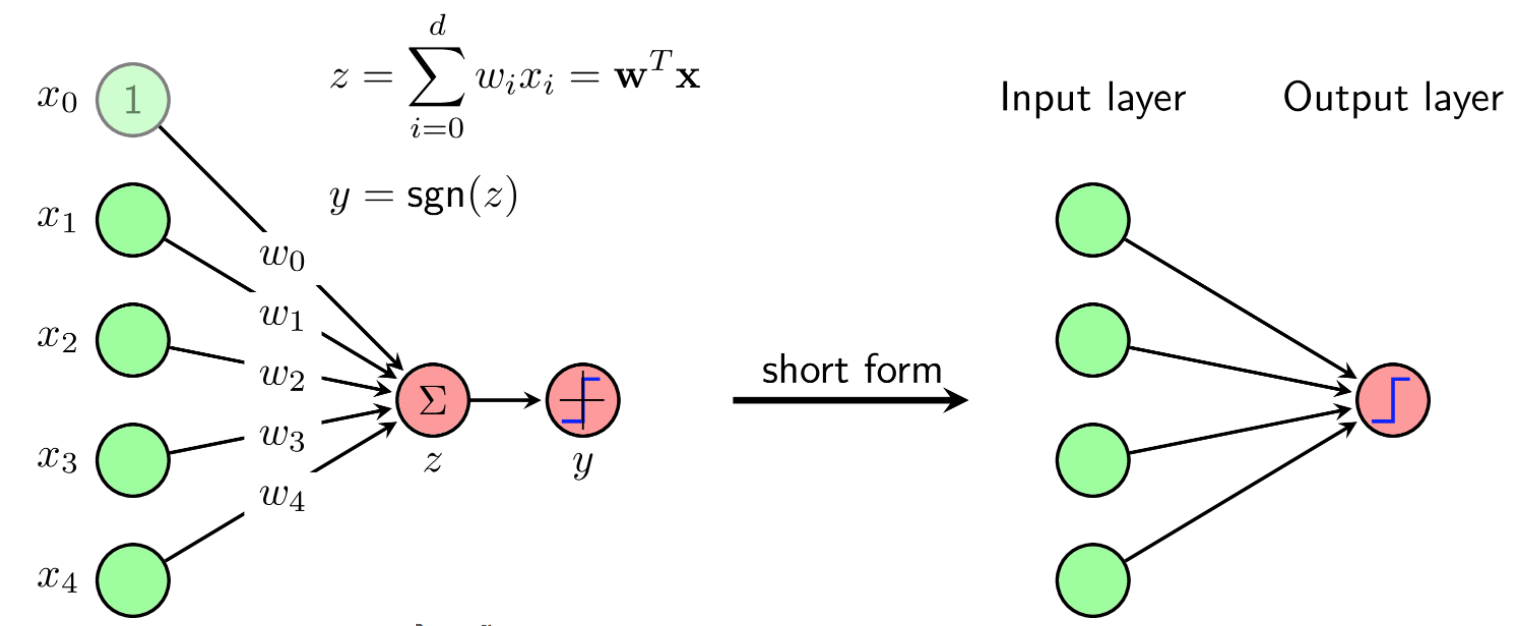

** The above perceptron model is similar to the node of biological neural network as shown below**

<img  src="CGF13D71DJ472DYUG9DDT5M8XOWU2UM9.png"/>

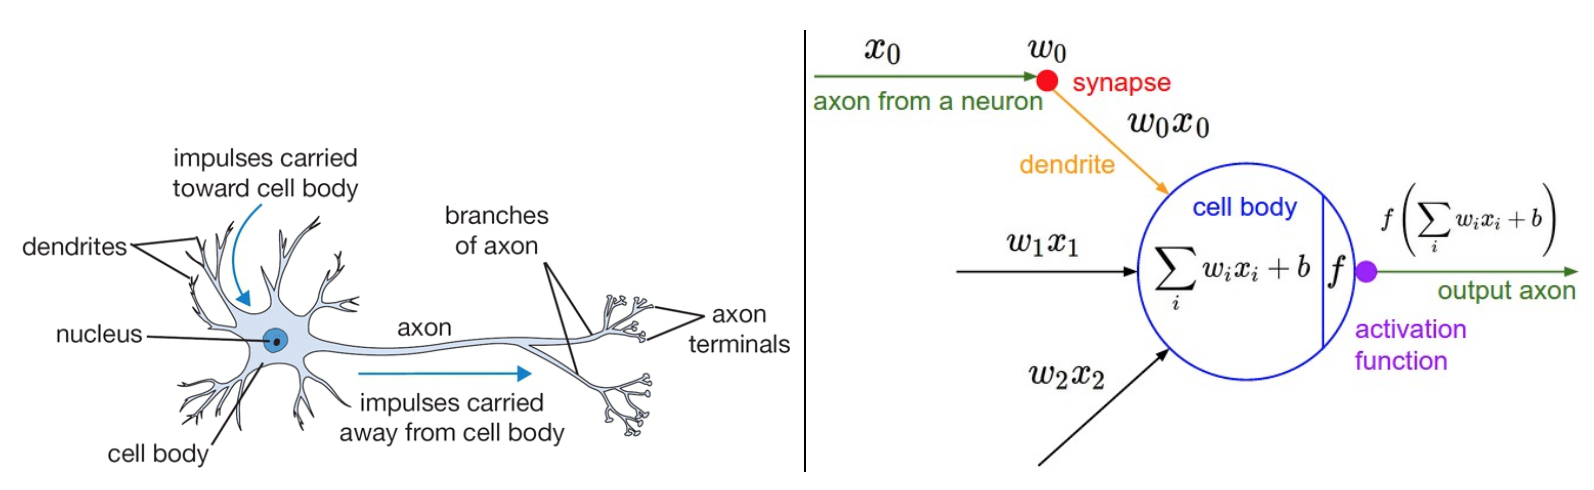

# Limitaion

## PLA can provide a variety of solutions

<img width =600 src="
AABXQvkJOTg9xf/v7+CA4OhpeXl+7n7YwJMhC2kXpGRgaWLl2KuXPnQoJgDw8PG52Zp6EABShAAQpQgAIUoAAFjCKQmZmJrKwsNGzYEC+++CLKli1rlKk7dJ4MhG3ELR/WkydPYtmyZSoT7O5OWhvR8jQUoAAFKECBxwrIyiz5JQ/5Qlp+GfmR6yGZJbPZ7HIeMm75t5X8LivsZA5caWfkT7Sx5i6fffk7LJ/5O3fuMBC20+1ntGYj2Af/T7dkyZLo378/GAzbCJenoQAFKEABCjxG4OjRo9i9e7cKnurXr48GDRo85gh9v3z27Fls2bIFSUlJaNy4sfrlSl8OxMbGYvny5Wr8fn5+6NevH4oVK6bvm8bZUQDA3bt3ER0djSNHjrjkl1iudBMZCNvobsn/uci3lfKQQPjdd9+Ft7e3jc7O01CAAhSgAAUokJ+A/MPx5Zdfxr1799RSwr/+9a+QYNioD8kkvfLKK5DllbVr18Ybb7yBDh06uAzH+fPnMWnSJKSkpMDX1xf/+Mc/0KdPH0hAzAcF9C6QmJiITz/9FMePH+dKCDvfbAbCNgKWpQu5S3Zkf3BISAh8fHxsdHaehgIUoAAFKECB/ATWrVuHM2fOqIIy7du3V9lPo2YPpWbJ9u3bsXfvXrWsuHfv3mjTpg1CQ0Pz49PU89evX8emTZuwcuVKFfg+++yzGDRoEEqUKHE/4aCpAXMwFLCxgCTXJIbIjStsfHqe7gEBBsIPYPBHClCAAhSgAAVcS0CywDNnzsSVK1dQs2ZNlfkMCgpyrUnYaLSynzY5OVllUyWgrFWrFjp16qSCSBtdwq6nkUyYFB6dPHkyUlNT0blzZ5Xpl5V2rrSs265IPDkFKGAzAQbCNqPkiShAAQpQgAIUcKSALP2VzOeGDRtUYZlu3bqp4M+omZS0tDRs3boVq1evVtnTIUOGICoqyiUyqfKFxsaNG1UQLF9qyB7vcePGoVq1ao78SPFaFKCAgQSMXVLRQDeaU6UABShAAQroSUCyn5I1nDZtGm7duqUCJldaAmzreyH7gqXA1I8//qiqzEogKRlVV1gSLWM/cOAAvv32W0jRs4iICLz22mto0aKFrZl4PgpQgAL3BRgI36fgDxSgAAUoQAEKuIqA7IWVysjz589XRaGkqnBkZKRh99XJkugdO3ZgzZo1qljnc889h3LlyrmEx6VLl1RBLKn6LXuBR40aBcnuczm0q/xt5Dgp4JoCDIRd875x1BSgAAUoQAFDCyQkJGDKlCmQfaWVKlVSgZPsJTXiQzKq586dU9lg6T8qmVTJBmt9r7Rk9aUy9Pjx47Ft2za1hFuKYz399NPsvGHEDzLnTAEHCzAQdjA4L0cBClCAAhSggHUCEuxdvnxZFcmSn4cOHYry5cu7RPbTupnnfbT0CpaewfJLqs2+8847LtFzV/Y0S5uk3377TS3nlkzwiBEjXGLsed8JPksBCriSAItludLd4lgpQAEKUIACFIBURJ4xY4YKnipWrIj+/fsjODjYsDL79+9Xe6UlCJYlxc2aNVOtpLQMIku5V6xYobLBd+7cUS2SJAguU6aMlofNsVGAAjoSYEZYRzeTU6EABShAAQroXUAywNIzeOHChXB3d8czzzyD0qVLu0RlZHvcG/lSQPYFnzhxArI0/JVXXtF8D1IpcibVvv/2t78hPj5e9Tl+8803UbVqVcPeR3t8NnhOClCgYAEGwgX78FUKUIACFKAABTQkcO3aNSxfvhzyuxSDkmXRfn5+Ghqh44Yie2x37tyJZcuWqT21Tz75pGo7pOUiU1Lk7PDhw/j444/VvmapEP3uu++qNk/e3t6Ow+OVKEABwwswEDb8R4AAFKAABShAAdcQkGzwoUOH7gd+Tz31FCpXrgwPDw/XmICNRyn7pOVLgfPnz6NKlSoYNmwYfH19bXwV251OinodP34cEyZMwK5du1SF6D//+c9o2bIl/P39bXchnokCFKBAIQQYCBcCiW+hAAUoQAEKUMD5Ajdu3MCmTZtU4CfFsaS6sCyPNuJDvhQQCymQJcGvVImuV6+epimkTdL06dPV3mDJ4j///PMYPHiwYTP6mr5ZHBwFDCDAQNgAN5lTpAAFKEABCri6gGQT9+zZg9WrV6s9sJ06dULdunUN22v26tWrqtpyTEwM6tevrwqGeXl5afY2x8XFYfbs2ZgzZw7kXkpRr5dfflkF8SaTSbPj5sAoQAH9CjAQ1u+95cwoQAEKUIACuhGQfsFSFOrUqVMIDw9XmUQt74W1J7xkg5cuXar22gYGBqpscO3ate15SavOLW2SZB+zZINv3bqFVq1a4b333kNoaKhV5+XBFKAABawRYCBsjR6PpQAFKEABClDAIQJSFGr79u3w9PRE8+bN0ahRI4dcV4sXiY2NxeTJkyFZ4Xbt2kGKZJnNZi0OVWV/5d598cUXOHnypGrtJH2Oq1WrpsnxclAUoIBxBBgIG+dec6YUoAAFKEABlxS4e/cu5s+frwot1axZU/Wc1WrgZ29gqRT9888/4+LFi6rnbvfu3VXbIXtf15Lzy1hPnz6N999/H8eOHUOdOnUwduxYNGnSxJLT8RgKUIACNhVgIGxTTp6MAhSgAAUoQAFbC2zdulX1nZXq0JINlr3BRnxkZmbi7Nmzaonx7du30aNHD1VxWYtfCsg+4Js3b+Ltt9/GkSNHVKurl156SS3jNmqBMyN+ZjlnCmhZgIGwlu8Ox0YBClCAAhQwuMC9e/cwa9YsXLhwAZINlmXARu0bnJycjIkTJ6ol0dIuqVevXiorrLWPiGSCpTjWRx99hM2bN6sex2PGjIFkrwMCArQ2XI6HAhQwqAADYYPeeE6bAhSgAAUo4AoC0dHRam+wZBilUrQUhTJilWFZHn706FFVdTk9PR3SQ1kstFgpWgpiTZ06VVW1lrEOGTIE/fr1Q6lSpQx571zh7xnHSAEjCjAQNuJd55wpQAEKUIACGheQrKIEUTNnzsT169cRGRmJNm3aICQkROMjt8/wcoPLK1euICoqSrVLKlGihH0uZsVZZcm2VPf+4YcfkJCQoDL4siS6YsWKmi3oZcV0eSgFKODCAgyEXfjmcegUoAAFKEABvQrIfljJgC5fvhzyc8+ePVGrVi1DZhRTU1NVq6QlS5aoqtlDhw5FpUqVIHumtfRISUmBVIj+6quvcOnSJTRs2FC1SZJ2V1obq5bcOBYKUMA5AgyEnePOq1KAAhSgAAUokI+AZIOTkpJUdeT4+HjVN7hDhw4oWbJkPkfo92mxkKBSKkWLhWTGZalxsWLFNDXpjIwMVRRrwoQJOHDggArUP/zwQ80u39YUHgdDAQo4RcDdKVflRSlAAQpQgAIUoEA+AllZWbh8+TJmzJihlkcPHDhQtQgy6t7g3bt3Y+3atQgMDMSrr76K0NBQuLlpJ5eRG6x/9913apxlypTBa6+9hm7duuVzh/k0BShAAecLaOe/os634AgoQAEKUIACFNCAgOyHnTZtGhITE1GhQgX06dPHkNlguRXSemj27NmQYlnVq1fHsGHDVBVmDdym+0O4c+eOWg4tvZ6DgoLw9NNP44UXXrj/On+gAAUooEUBBsJavCscEwUoQAEKUMCgApINlqXAv/32mxJ45plnVIsgI2aDZc/thg0bIH2US5cujddff10FwVqykP3b33zzDX7//XdVDEtaOo0bN457gg3695fTpoArCTAQdqW7xbFSgAIUoAAFdC4gFaLnzZuHmzdvonz58hg8eLDKMup82nlOb+/evVi2bJl6TQpPSfsoLQXBMjBZvi6/pEJ0586dVRCsxWrWeQLzSQpQwNAC3CNs6NvPyVOAAhSgAAW0IyDZ4BMnTmDx4sWqOrIUhZJg2IgVh6UN0aJFi1S1aKkQLUuNtVQgSzLBkq3++uuvVQa/ZcuWGDt2rNrLraX9y9r5dHMkFKCA1gQYCGvtjnA8FKCAbgSkgIz8suWD/8C0pSbPpTWB2NhYrFu3DjExMSoAHj58OHx8fLQ2TIeMJzo6Gps2bVIZ4NatW6NJkyYOuW5hLiL9nY8dO4ZPP/1UfXEhlaylV7Bkrb28vApzCr6HAhSggNMFGAg7/RZwABSggB4FJACOv30b69ZuRGaWbWbobgY6d+mAYkFBmlseaZsZ8ixGFsjOzsb+/ftV32AJpp588klVHMqIX/7IsvCZM2fi7Nmzqndy//79Ubx4cU18PKRNkuzhll7BEqiXLVsWL7/8Mtq0aYOAgABNjJGDoAAFKFAYAQbChVHieyhAAQpYIHDl8lW89/6nyMypARNMFpzh/x+Sg2y4m46hdu2aKhD+/6/wJwroQ0B65G7evBmnT59GlSpVVOVhIwbBcje3bNmCnTt3qi+8ZF+wZFq18JAvK2QPt1T0/vXXX+Hn5wfJ2nfv3l21dNLCGDkGClCAAoUVYCBcWCm+jwIUoEARBWRVdGZWAEpU+BpuJo8iHv3Ht2fnpOFmTF/YeKX1Hy/CP1HASQKygmLXrl1qWbRkgyW72KhRIyeNxnmXFQdpRTRx4kRcu3YNsu9WevFqIdMqY5OCWEuXLsWECRPuV4iWfcGlSpVyHhqvTAEKUMBCAQbCFsLxMApQgAKFFTCZ3CC/YHFWOAemHLMVxxd2pHwfBZwjkJqaqqojHz16FHXq1FG9co2YDZYCVNKG6PDhwyrQfOqpp1C3bl3n3JSHripLoletWoXx48cjLS1N7Vn+7LPPVCZYa5WsHxo6/0gBClAgTwG2T8qThU9SgAIUoAAFKOAogW3btqmMsGSDmzZtigYNGjjq0pq5jmRcExMT1d5bqRgtrYgkI+zp6amJMa5evRpffPEFpKCZFMeSrHBISAiM+IWFJm4IB0EBClgtwEDYakKegAIUoAAFKEABSwXu3r2LOXPm4NSpU6hZsyb69eunmeDP0jlZcpwsiZa9t1IgSwpjPfPMM2qvtBayrbJf+bvvvsORI0dQrVo1fPLJJyoYNptlpQofFKAABVxTgIGwa943jpoCFKAABSigCwEJsnbv3q0KQ7Vq1UotjdbFxIowCVkSffnyZUyePFktO5aK2bIk2tvbuwhnsc9b5QuKb775BpK1L1euHF555RXIfTJib2f7CPOsFKCAswQYCDtLntelAAUoQAEKGFzg3r17mDVrluobXL16dbUcuFixYoZTiYuLw+zZs1XFbGlHNHLkSFWAytnZ4Bs3bmDSpElYv349/P39MXjwYPTq1UsTxbsM9yHhhClAAZsLMBC2OSlPSAEKUIACFKDA4wSkFc+BAwewYcMGSEa0S5cuKhvs7ODvceO29evyZcCJEycwb948dWopkCVLxH18fGx9qUKfT/YrS0Es6WUs45JCWT179lRFzMqUKVPo8/CNFKAABbQswEBYy3eHY6MABShAAQroUCA30Prll18gWceqVauibdu2KFGihA5nW/CUpC+vVIqWvcEVK1bEc889h8DAwIIPsuOrufdmxYoV+PLLL1XLpNatW2PUqFGIiIiw45V5agpQgAKOFWAg7FhvXo0CFKAABShgeAHJAF+4cEFlG9PT09G7d2/I0mijZYNl7rI/esmSJWrp8ZAhQ1QxKmdWipYMtRTFeuedd1SFaLkvb775ptqzbLT7Y/i/qASggM4FGAjr/AZzehSgAAUoQAGtCUiF5J9//lm1CwoLC8MTTzyB0qVLa22Ydh/PxYsXsXTpUrVHunz58hgzZoxTK2ZnZWXh/PnzePfdd1WGWjL0//znP9GoUSMWx7L7p4EXoAAFHC3g7ugL8noUoAAFKEABChhXQIKtq1evQpZFS0b06aefRqVKlQyXDZYlyGvWrMHKlStRsmRJtfRY9t86M+sqQfCnn36KTZs2wd3dXf3crFkzp+5XNu7fFM6cAhSwtwAzwvYW5vkpQAEKUIACFLgvIHuCZ8yYofaeyp5YKQ4VEhJy/3Wj/HDo0CGsWrVKZcVl+fGgQYOcGgRL+6bp06dj/vz58PX1xd/+9jd07doVfn5+RrklnCcFKGAwAWaEDXbDOV0KUIACFKCAswQkGyx7gyXYcnNzU9lgaRck2UcjPaQK8+LFixEdHY0KFSpg+PDhKivsLIP4+Hh1T6SPsdlsRt++fTF69GgEBQWp++SscfG6FKAABewpwIywPXV5bgpQgAIUoAAF7gtIhWTZE3vlyhVIADx06FCnVki+PzAH/yBto2RZdGpqKpo2bYqOHTuqANTBw1CXkzZJck9kz3ZSUhKaN2+uimPJcm0JivmgAAUooFcBBsJ6vbOcFwUoQAEKUEBDApINPnbsmMqESlVkWRJdpUoVwxVhSklJUf15pXdweHg4+vTpA2f15pV7IvuBf/zxR0jhrjp16uCtt95SfYw19NHhUChAAQrYRYCBsF1YeVIKUIACFKAABR4UuHXrlgq6zp07p7LBw4YNc2qF5AfH5sif9+7di9WrV0PaFHXq1AktWrRw2vLjgwcPql7Bsl+5cuXKqmp1q1atnLpX2ZH3gteiAAWMLWCsTTnGvtecPQUo4CyBnBzkmHJgsvD6OfjP/4AcC8/AwyjgXIHs7Gzs27cPK1asgJeXl1oKXK9ePacFgM7QkCrRshRa9uFK1ezIyEjVNsoZ2WAZiyxP//zzz7Fr1y4EBwdjxIgR6NmzpyG/nHDG54HXpAAFnC/AQNj594AjoAAFdCzgZspCVuYVmNw8rJplTvZduJmyrToHD6aAswRk7+n69etx/PhxREREqL3BUizLSI/MzEzs3LlTtUuSbHD//v3RsGFDhxPIlxJyPyZMmKCqVsufn332WVW4LCAgwOHj4QUpQAEKOEuAgbCz5HldClBA9wJmsxuCAlORljDcJnMNCgTMZkvzyjYZAk9CAYsEJADcvHmzyjZKMSYpEGW0R3JysurLm5iYiAYNGqB9+/YqE+toB9mjPGfOHHz77bcqQ/3SSy+pLyZKlSrl6KHwehSgAAWcKsBA2Kn8vDgFKKBXAZPJhMjIali7dplNp1isWBD379lUlCezt8Ddu3exaNEiHD16FLVq1cKQIUMMtSRafCUIXrt2LbZs2QLJwL744ouIioqyN/0j55cgWL6Q+OCDD1QQ3KNHDzWWSpUqPfJePkEBClBA7wIMhPV+hzk/ClDAaQIeHh4ICQm26fUlwOaDAq4ksGPHDuzevVv1Cm7WrBlkb7DRHjdu3MA333wD+VLgySefhDj4+fk5lEGWY+/fv18Fwbdv31ZZ6ffffx/VqlVjmySH3glejAIU0IoAA2Gt3AmOgwIU0KUAA1dd3lZOqpACEvjNmjULZ86cURlQKcbk7+9fyKP18ba4uDhVJEyKhUnw+8ILL6iq2Y7cIy1ZaKkM/fe//x2nT59GuXLl8OGHH6o2Sd7e3vqA5iwoQAEKFFHAWJUqiojDt1OAAhSgAAUoYLnAnj17sH37drUcWPbE1q1b11BL+yUAlS8Bpk+fDimWJdlg2R/t6GzwyZMn8f3336sK0UFBQXjnnXfQtm1bh4/D8k8Sj6QABShgewFmhG1vyjNSgAIUoAAFDC0g7XkyMjLw66+/4tq1a6pSdLt27RASEmIol5s3b2LNmjU4cuQISpYsqfbjFitWzKFfBsTExGDGjBlYtmwZJPs7fPhwtU9bgnGuWDHUx5GTpQAFHhJgRvghEP6RAhSgAAUoQAHrBLKyslSrJAm+0tPTVSbUaNlgyQDLcuj58+erPbhdu3ZFy5YtVR9l63QLf7TsBZbrS5Vo2SPcuXNnvPzyy5CsMIPgwjvynRSggD4FGAjr875yVhSgAAUoQAGnCEg2WKoTT5kyBbI/VioSy7Joo7Xnyc0GnzhxAuXLl8fo0aNV+yhH3RTZn71x40ZMnjwZV69eRatWrfD222+jQoUKjhoCr0MBClBA0wIMhDV9ezg4ClCAAhSggGsJSDZYAi/ZFyvBWL9+/RAZGWmoDKTsDd6wYQNWrlypioN1794djRs3dphBbnGsjz/+GLI/uH79+njllVdQp04d1/owcbQUoAAF7CjAQNiOuDw1BShAAQpQwGgCshxXssGJiYkq+9i7d2/DZYNlX7QsCz916pTaH/3cc885NAiOjY3FG2+8gWPHjiE8PFwth+7QoYPRPoqcLwUoQIECBRgIF8jDFylAAQpQgAIUKKyAZIMvX76simRJVnLw4MGqVY8jWwUVdqz2fN+iRYtUtewyZcpAWkZVrlzZnpe7f25Zli5fREj2V9olFS9eHOPGjUO3bt1UH+f7b+QPFKAABSgABsL8EFCAAhSgAAUoYBMByUTOnTsXN27cUAHwoEGDVDBmk5O7yEkkC7xgwQKIRaNGjdTScA8PD4eM/tatWxg/fjzWrl2rrjdmzBgViAcGBjrk+rwIBShAAVcSYCDsSneLY6UABShAAQpoVECywdIzd+HChapKsgTBFStWdGiBKGfTSEb2999/V0uSJRssfYPFwBEPCYLlS4iZM2eqYmVDhgzBsGHD1LJ0o2XkHeHNa1CAAq4vwEDY9e8hZ0ABClCAAhRwuoBkgdetW4cLFy5AgsBnnnlGFYpy+sAcNAAJgqVf8Lx589T+aKmULb+8vLzsPoKEhARVIXrSpEmQgFhaNb366qtqj7a7u7vdr88LUIACFHBFAQbCrnjXOGYKUIACFKCAhgRyqxQvXrxYZYAlE1qjRg04akmwsykkCJY+vZKNPX/+vGqXJAbSOsrej7S0NOzZswfffvutyshLv+b33nsP1apVM1Q23t7OPD8FKKA/AQbC+runnBEFKEABClDAoQJSoGnLli2qSnLZsmXVklwjZSIzMzPV3CUQlsC0R48ean+wvQ3kutKn+Pvvv8euXbvUMuw333wTzZs3d0gm2qEfMl6MAhSggI0FGAjbGJSnowAFKEABChhJQLKhkpFcvXq1ykC2bt3aoT1znW0t85elyRMmTFDLksPCwtCnTx+VFbbn2OS60qZJriv9ikuUKIHRo0dD9mabzWZ7XprnpgAFKKALAQbCuriNnAQFKEABClDAOQKSAV21apVq1yM9a4cPHw4jFWdKT09X2eDp06cjIyMDI0eORGRkpN0NZCn2F198oSpUe3p64qmnnlL9go1k75xPPK9KAQroRYAVFPRyJzkPClCAAhSggBMEtm/frnrment7o2nTpmpJsBOG4bRLSlb266+/VnuEZX9ur169EBISYvfxyJ5gqVB99+5dDBw4EG+99RbkHvChPwG5x6mpqTCZTKoAnVH23uvvTnJGWhNgIKy1O8LxUIACFKAABVxEQP6BLsGY7FONiorCgAEDDLU3NTk5Gfv27cOaNWtUBvill15S/ZPtmZWVJdFz5szBTz/9hOvXr6Nbt2547bXXVJskCZT40IeA/J3auW0bDu/di5uXLiFLBcJuMPv7oWx4OOo3b45WrVujZMmSsPdedH2IchYUeFSAgfCjJnyGAhSgAAUoQIFCCG5M58kAACAASURBVOzevRvR0dHqnVKgqX79+oU4Sj9vOXfunCpUJdm6Fi1aqKDUz8/PbhOUZdgSeH/22We4ePGiyr6PHTtWfQnBYMhu7A47sfTijo+Px+IFC3Bo1SoEX7mKBvfSUSo7B75qFCbcuRWP65eu4NDuvdi5bBk6DxiAxs2bIzQ01GHj5IUooBcBBsJ6uZOcBwUoQAEKUMCBArJHdfbs2apvcEREBJ544gkUK1bMgSNw7qWkUvbmzZuxd+9eBAUFQQJSKVhlr0JVEgSfOXMGH3/8MY4ePYrKlSurXsGNGzeGj4+PczF4dasFZH/5lZgYzJ4yBbfXrEOr5BTUcvdAKXcP+HmY4W4yIQdAZk4OkrOycDkpBfv3HcC6q9cRe+kSOvXqhfIVKlg9Dp6AAkYSYCBspLvNuVKAAhSgAAVsICDLcw8dOoR169apAlGdOnVCvXr11B5GG5xe86eQ+UswmrtHt2PHjiobLEWr7PGQTOGVK1fwzTffqOrcpUqVwpgxY9C+fXtDfflgD1stnFM+T9evXcOCX37Bzd8XYqCbGbV8/ODl5oYHF7vLzx4mE4q7u6tflbIyUeLqNWyePUd9AfPkgAEO2Z+uBTOOgQK2EGDVaFso8hwUoAAFKEABgwjIP9olOyk9c2NjY1Vmsm3btmqvokEIVLuktWvXYv/+/WpP8HPPPYfAwEC7fBEg3uIs2Xcxl+zv4MGD1X5syUDz4foCd+7cwZ4tW3BywSIMdXNHQ19/eD8UBOc1ywCzOzr6B6BVXDyOLFqMPdHRkN7SfFCAAoUTYCBcOCe+iwIUoAAFKEABAJKdlP2p8+bNUxWLe/bsidq1a9slCCwqeEpKCuLi4iC/2+shgan0TV6xYgWys7NVz+QuXbrY63JITExU15LK1HI9udbbb7+tvnhgcSy7sTvsxPJ5On3yJHYsWIiOd++hrq/fH7LAjxuIp8kNrXz9EH4pBhsWLlR7jB93DF+nAAX+I8BAmJ8EClCAAhSgAAUKLSCVkn/88UfIHtkKFSqowKxMmTKFPt5eb5SAYsuWLfj888/V7/JnezySkpIwd+5cHD58WPULHj16tN3aFsm+UenR/H//93/Ku1atWmp5tGSC7VmZ2h5uPGfeAnKPTxw6hHtHj6Gdf2Deb3rMs0Fmd9R3c4fb6TM4eODAY97NlylAgVwBBsK5EvydAhSgAAUoQIECBSQbLC17pkyZorLB0i6patWqmsgGS2C+fPlyFaQuW7ZMLV8ucDIWviitknbs2KHaRLVp0wZSLdtej02bNmHixIk4deqUcpbewaVLl2YQbC9wJ5xXlr3fkPZjWVlq36+lQ6jo4YmKScmI3rLF0lPwOAoYToCBsOFuOSdMAQpQgAIUsExAlh1Pnz5dBZmSDX7qqac007Zl586dqoCVBOtSyEqCVVs/ZP6//PILzp49q1oXDRw4EB4eHra+jDrfwYMHMWHCBEiLqsjISPztb3/TzBJ0u0zYoCeVdkmp164j3OxepCXRD3MFmc0olZ6Ji2fPqgJ2D7/OP1OAAo8KMBB+1ITPUIACFKAABSjwkIAEmDExMZgzZw5k2bFkgyUYtlcg+NDlC/xjQkICFi5ciFu3bsHf31/tE160aJHaX1vggUV8ccmSJapatrRLkr26NWrUsEs2XJz//e9/q/ZMsux85MiR6Ny5s8pCF3HIfLvGBZKTkpCTmopiZrNVI/V0c4M/gIzkZLVaw6qT8WAKGESAgbBBbjSnSQEKUIACFLBG4MaNG1i8eLEKhsuWLYshQ4ZopnVPdHQ0jh8/rgp5SQsjCdqPHTuGXbt2WTPl+8dKkaqrV6+qJeGylFWWQ3ft2lUF3fffZIMf5AsG2YMsy6FlCbaXlxf69++PQYMGacbaBtPkKfISsMmW9hz1JVVep+dzFKDAowIMhB814TMUoAAFKEABCjwgIIHliRMnsGDBApUBliXRsjfYXn1zH7h0gT9K4CjFu2Rc0oLG3d1dZWjld6m2LH1+pYK0tYWzpKCRFMiS4DokJAS9e/dGlSpVChxbUV+UMd67dw8zZsxQv9LS0vDkk0/imWeeUZn3op6P73cNgYCAAJh8fZGQnW3VgNOzs5FsMsE7MNBuxdusGiAPpoAGBRgIa/CmcEgUoAAFKEABLQnI3tjNmzfjzJkzqljT8OHDVT9bZ49RAvS9e/eqXxJImv+7vDT399zXrOmtKsdeunQJkydPVtna9u3bq4ywn5+fTacvga/0Jpaq1+LdokULPP/886hevbpdll/bdPA8mcUCwSEh8C1bBueyMpANy9PCt7MyEevpgYpVqmpiu4LFIDyQAg4UYCDsQGxeigIUoAAFKOBqArIs+MCBA1i6dKlaqtuxY0fUr19fZV+dORcJfHNbGUnWV9oJ5fbVld/lz5ItlkyuNVlhucbs2bNVRlyywfIlQFhYmE2nfvfuXRw5cgQfffSRCrqlONY777yjnHODeptekCfTjIB8pkpGROCspyfiMzMtGpeEz5czMhDj749GLexXxdyiwfEgCmhYgIGwhm8Oh0YBClCAAhRwtoAEghs3blSBmuwNlqW6Wuhhm56eroJTyaJKwa6HA0b5szwve21lWbe8v6gPyQZL4aoffvhB7Tvu06cPoqKibFq0Sq4hmfZ//etfKrNdvHhx/POf/0SDBg1sep2izp3vd4yAj48PIuvUgTmiGnakpCDLgv7XKdlZOJSdhcyqlVG3Xj3HDJxXoYAOBBgI6+AmcgoUoAAFKEABewlI+54NGzao/cDNmjWza9/cosxB9gBLtlcC3AezwbnnyM0Ky+tS6VreX9SHFMaaOnUqrly5ovYGjxkzBlLF2ZaPy5cvq0BbCpF5e3vjH//4B1q3bm3zQly2HDPPZVuB6jVronHfPpiXlY4rGelFWiAt2eBtyUk4UaYUWvXsqbYu2HZ0PBsF9CvAQFi/95YzowAFKEABClglIPtWZUn04cOHUa1aNYwYMUIT2WApKnX69GmsXLlSBYz5ZajleWmntGrVKpV1leMK+5BMrVSi/vXXX9WXABIElytX7pHMc2HPl9f7pBL3zJkzVW/iwMBAjB07FtKbWMbMh3EEZL95s7ZtUffpwfjH7Vu4dO9uoTLDEgSvu5OAZb7eiOrdC+3atTMOGmdKARsIMBC2ASJPQQEKUIACFNCjgLQfktZEUoW5SZMmas+qFuZ58+ZNSJ9gCdRl+XPu3uCHxybPy+upqamqz7AcV9jH+fPnMWvWLEiP4sqVK6svASRYtdVD9i1LRvvHH39U45d2TG+88QbkGvnNx1bX5nm0JSD3u3SZMhg0ahRqPjsSH95NwbzEeMRmSAGtRx/y3MV79zAp7iZ+Dy6GJs+NQs/+/eHHL1AexeIzFChAwL2A1/gSBShAAQpQgAIGFZACTrKk+NSpU4iIiIDsj9VCpjI3G7xp0yb4+vo+NmiUIEPeJ1Wvu3XrhhIlSjx2760E2Dt37sTq1ash2brRo0erbLB8IWCLh2Sbly9froLg27dvo1GjRnj33Xche7AZBNtC2PXOIV/YlClXDoOeew4Vq1bFnsWLsev4CYQlJ6K8yQ0Bpv/kruKzsxCDHMT4+iKkQzsMeqovatWvj5DQUE2s1nA9eY7YyAK2+S+6kQU5dwpQgAIUoIAOBfbv349t27ZBgjbZsyqVorUQpMm+XSmAdevWLRQrVqxQ8rL3VrLBcpz0/61YsWKBx8mya8k4SzZYilb169dPZZYLPKgIL27duhUTJkzAuXPnUKtWLfz5z39G7dq1NeFbhGnwrTYWkGC4bLly6NanDypHRuLUkSOIPXMGZ2JvIDs1FTCZYPb3h1+Z0mgfGYmadeuiYliYamWmhb+bNubg6ShgdwEGwnYn5gUoQAEKUIACriWQkZGhWgZJIaeqVatCWiaFhoY6fRJS+EraDO3YsUNldQv7j395n5eXlzquVatWqqCQp6dnnvORlktSiVquIXOWdkmPC5zzPFE+T8r4//3vf6uWVNKG6YUXXkCbNm2c3o4qn+HyaQcLyGdVViE0aNQINWrVUi3A7iQmqhZg8pp/QIBaPh8UFGTT/eoOniYvRwFNCDAQ1sRt4CAoQAEKUIAC2hDIysrCyZMnsWzZMrUHt0uXLqhXr54mspWS1ZUstbQ0kkCgKA9pUyPHyfF169ZVS53zOl5aLUkRLskGd+7cGT169MjrbUV+TvoxSzb7m2++UWMICAjAyJEj0atXL5XRK/IJeYDuBWQlg/zSwpdQusfmBA0pwGJZhrztnDQFKEABClAgbwHZgztt2jS19LhSpUro0KGDzVsG5X3lgp+VAH3v3r2QAl6SzS1sNjj3rPJ+OU6O37dvn+oLnPta7u9SVEsKWB04cACSrR02bJhN2tFIECyBtbjKvmtZbi79mKVCdHBwcO7l+buBBOQzIZ8D+T3Hgt7BBqLiVClgNwEGwnaj5YkpQAEKUIACriUgweb169dVOx+paiwFsmrWrFnkoNMes5aiUlu2bMHFixdVlsySa0h27dKlS6pwlgSmDz8OHjyI9evXq57DsoRaMsLWPiTIkeXWkmX++OOP1RJXyTLLkusKFSpYe3oe7yIC8jmQLQdSiC01JQWx167h4vnzuH71KpLu3FHPy9J/BsUuckM5TF0IcGm0Lm4jJ0EBClCAAhSwXiAxMRE//fSTyl5KkCYBW+nSpa0/sQ3OIFWcpYCX2Wy2uDqu9BWWX5LxlT3ADy57li8BJk6cqJaFy9Lpvn37qr2Y1g5dgps9e/bgrbfeUsFO27Zt8d5776m+zNaem8e7jkBSUhI2btyIFYsWIebYcaTeugX3rCxkurnBK7g4wqKi0KJjR/Ts1QvFixd3nYlxpBRwYQEGwi588zh0ClCAAhSggK0EJBC8evUqZsyYoTJX/fv3hyyNlsDR2Q/JBq9atUrtsZWsrjUPOV6y3nI+yfrmVp6WP0uwLUtVn3jiCTRv3tzqTHjucu533nkHcXFxKvj9xz/+oSpXS0DPh/4FJAO8d/duzJsyBekHD6FNZjYqu5kRGlAcHiYgMycHtzOycfbgERw4egwbFi5Cv+dGqQJ1sq+dDwpQwH4CDITtZ8szU4ACFKAABVxGQNoRyf5YCRKln+2gQYMQEhKiifFLRvXo0aMqSLU2gJTjJUsr55P9wrL8WXom//DDD7h27RoaNmyongsMDLR67rLU+rPPPsPx48dV/+Lx48erwmPWBvNWD0zHJ4iPj8eFCxdw6eJF3I6PVzMNKl5cLUOvXr26qshc1P3llnJJFnj9qlXYMGUqql26jHZmd5Tx9IKPmxkeJhNMAHIAlM3JQXh2NupnZWH3mXNY+Ml4xF27hp79+nEPuaX4PI4ChRBgIFwIJL6FAhSgAAUooGcByVxK8DBv3jyVBZW+uVIsKr8WQ460uHPnDubPnw8JcKTPqi0ech453++//676I8uSVckGy3wHDBig9kVbmwmXXsRTpkxR+5GlQrQsjZYK3L6+vlZnmm1hoLdzyJcYO7ZswaFt25F56RJ8bifAOz1dTfOKhwf2FgvCsvBw1GnRHE1btlQF4Ky9xwUZyt+p7Vu2YPsv09HoYgw6eHqjpIeHCn4fPE6CYQmKg8xmBLi5IcTshqDbd7Bk2jSUCAlBy44di1wh/cHz82cKUCB/AQbC+dvwFQpQgAIUoIAhBCQbvGbNGpw7dw6lSpVSFY1tkRG1BZ5kgw8fPqwq7EovYFs8crPCkrGVeefui27Xrh1at25t9R5NWWI+c+ZMLFq0SPUHHjx4MIYOHcog2BY376FzSHb/0KFDWLdgAe5s245yt+JQOQeo4O6BQDezyrgmp6Qh5lYcTp8+ix379uPi4cNo16cPomrUsFvrqgvnz2P7ggWodO4COv43CH5o6I/80c1kQqDZHR38A5BwMx5rZ85C6QoVUKd+ffaZfkSLT1DAegEGwtYb8gwUoAAFKEABlxWQPbHHjh3DggULVMa1W7duKiPq7GywVM+VdkaLFy+G7BGWP0vQY6uHtK6RLwBkSfT27dtVYSzp6xseHm5VxlYy2EuWLMFvv/0GWRorni+99JJaGm2rsfM8/xGQJe3HjxzBrC+/hN+e/ejj6YUIbz/4mc2PZF4j4YMW2dk4FJ+AtQsWYdH168gYNQr1Gja0+coH+Tu1bvVqmI8cRSuzu8oEF/aeSYbY02RCV/9A7D90GAe2bkPF8HD2Ei4sIN9HgSIIMBAuAhbfSgEKUIACFNCbgLQRkrZEEgyXL18eEgw6OwgWYwl8pYq1LDGtX7++2h9sS3s5rwTCsiRa2tpINlgKZFmTCZfzbN26FZMmTUJMTIzKLr/66quIiIiw5dB5LkCtELgSE4NZkyYhYOsOjA0pgWCpKG6SUDLvh6+bG5r5+aNs+j3M2bYDC3OAkBIlUKVq1bwPsPBZ+Tt1YPNmtE9ORbi3r0VnKe7ujvbuHtgZHY1LbVozELZIkQdRoGABBsIF+/BVClCAAhSggG4FJNiUlkTLly+HLDtu06YNmjVrZlVG1FZYsn+zTJky+Oqrr2x1yj+cR4LgadOmYdOmTWrJ8iuvvKKWhf/hTUX4g2QBT548iQ8++ED9Lv2Xx44dqzyLcBq+tZACCbdvY/2yZbi9fgP+Eloqzyxwfqeq6OmFXtnZ+G3ffsybNQtvvveezfafyzXPnj4Nnxs3UcHkBh8rqq7X9PLBZin8de4cGjRsmN90+DwFKGChgPN7Ilg4cB5GAQpQgAIUoIB1Avfu3VN7ZCUYzs0GO6qibmFGLmORgNgev06dOqWKWckXANIqSnoHW1rNWb5QkGXQsgQ6t0L0uHHjVBsmLXkWxtxV3nP+7FnsXbIEz/j4wT+PpdCPm0dVbx+0Ts/EhS1bceLEice9vUivx1y5gsDUNBQzWffP7JKensiJv41bsbEqA16kQfDNFKDAYwWs+xv62NPzDRSgAAUoQAEKaFVAlgXLsmjpV9q0aVM0btxYq0O16biuXLmisuBnz55VhbH+/Oc/Qyo7W/qQCtSyBFq+UJBg+u2338aTTz7JAkeWgj7mOPnS4eyRo/C4GIOGfpbdN/kHcCUPD4TdTsDm9esfc8WivZyUmAjf7Gx4FbBMuzBnlGrSPjk5yEhLU8v3C3MM30MBChRegIFw4a34TgpQgAIUoIBuBCQbvHDhQtVPt2rVqnj66actzoi6Eopkb6V/sLSK8vf3x5AhQ1CtWjVY2p/4xo0b+O6771SFaDGV5dB9+vRBsWLFNLHE3JXuTWHHKsXTrp8+jRomE7ytWHocbHZHRGY2juzbV9hLF+p97u7uyAKQrWpWF+qQfN6UgyzkwPTfVRH5vIlPU4ACFgowELYQjodRgAIUoAAFXFlAspeSEZaHZIMbNGjgytMp9NjPnz+PFStWQFocVahQASNGjFDFwSxZwhwXF4dVq1apytPJycmQNknPPvssSpcurZZzF3pQfGORBJLu3EHS9esId3+0L29RTuTn5oayJhNuXr6MtLQ0VaCtKMfn996SJUsi2dMDKTk5+b2lUM/fycpChrcPAooXt+ke5kJdnG+igAEEGAgb4CZzihSgAAUoQIEHBaQN0a+//oozZ86gSpUq6N69u9W9cx88v1Z/lpZJGzZswPr161V16AEDBiAqKsqi4cryXFlW/sUXX0Cywm3btsWbb76JihUrMmixSLTwB0nmPfvePfhauQfXbDJBOlPn3EuHnNNWj7BKlZDg74+b2dnItuKkMffuwa1USZQsW5ZfrFjhyEMpkJ8AA+H8ZPg8BShAAQpQQKcCR44cwbp161Rf3g4dOqhssCUZUVfjkWywVMi+fv06ateujaeeesqifbzyRcLevXtVmySpFC3B9DvvvKP6L0vxLT7sK+Du4QGTuzvSrcy4ZufkIFOG6m626ZcXZcuVg3/VKjjn7obbmRkWYWTJEv67aQiIjEClypUtOgcPogAFChZgIFywD1+lAAUoQAEK6EpAsqKzZs3CtWvXUKlSJdU/t1SpUrqaY16TkeB1yZIl2LNnD0qUKIEePXogMjIyr7cW+Jy0SZKK0z/++CO2b9+OcuXK4eWXX0bnzp010X+5wMHr5EXZ2+0THIwrWSqMtXhWd3NycDMnB/6hoapgnK2+DJLxtX3iCZwPDcHRe/eQYUHAfj79Hvb7+aB6q1YoU7asxXPkgRSgQP4CDITzt+ErFKAABShAAV0JZGVlISYmBnPnzkVKSoqqbFyvXj1DFHU6d+4cfv/9d7WMuUWLFmo5uLRlKupDlkF/8803KrMcFBSEYcOGYfjw4Vy6WlRIK94v7qGVw3EiO8uqrHBiVibOmU2IrF3b5vevRevWCGreHJvd3XApIx2ZhQyGZSn17cxMzElNRqm2bVCvaVNV1M0KLh5KAQrkI1D0/wfI50R8mgIUoAAFKEABbQukpqaqwk7S7kcymV26dEFZA2Sb5AuAX375BadPn1b9kqW1UXh4eJFvluwj/frrr7F48WLIOXv16oXXX3+dmeAiS1p3QHBwMKrWqYPY4GI4dy/NopNJwHk5MxNnA/zQqn17i85R0EESrPcZOgTpLZpjckoSrmVkFJgZlrJaEiwnZGXhu/hbOBMViYGjX0DFsLCCLsPXKEABKwQYCFuBx0MpQAEKUIACriIggZtkM3/++WdIQNy/f3+1NNhWy0G16iBLmY8ePYr58+fj1q1bKgsu+6ItmffUqVNVkTE5T+/evVW/4MDAQK1OXbfjknsXVrUqqrXvgBmJCRY1KbqRkY6dOVkw16iBRo0a2cVK2nKNeP01+D/VB+8k38bc+JtIy867qVJyVhY2JN3Bn+JicbFZY7w3/hNUjbC8rZddJsSTUkBnAu46mw+nQwEKUIACFKBAHgLSe1WyopINLl++vCoUJW1e9P6QPdETJkxQBbJq1aqFrl27qj3CRZm3nGPNmjX48ssvceXKFXUO6RcsjpYE1EW5Nt+bt4C0qOo+cCC+3L8fM85dwIDiIYXuKZyUlYU1qSm4EFUNw559Vu0Pzvsq1j0rS+/DK1fGc6+9ht0NGmDjggVYsWcvwjKzUCoH8DGZoPYpA4j18YS5chU88dRTaNu1C+TvphQF44MCFLCfAANh+9nyzBSgAAUoQAFNCEg2WAI4aZkkP0u15LCwMJtWytXERB8ahCxl3rVrF5YtW4a7d++qLHjDhg2LVClaimxJRvmjjz6CVJ2WPdUvvfQS6tSpo3u/hzg19UdPT09UjqiGwa+/hhmffIK0G3Ho5R+Aku4ecDOZ8h2rtCRakZaMM9WqovOIEaheo4Zdv8zw8PBAqdKl0b5bN9SoVw/nTp3CjYuXEH/9GlLu3oW7lxeqhpZAq7CKCIuIQJly5SDLqvkFS763kC9QwGYCDIRtRskTUYACFKAABbQpIEt5ZV/rxYsXIZm0IUOGGKJvcEJCAiZOnIibN2+qAFb2RIeEhBT6JkkmWMw+/vhj7N+/X/UIfuONN9C8eXP4+fkV+jx8o30E/Pz90bxNG0iroY2//orvDx9FvbRURHp4oaynJwLMZuTk5CA1OxtX0tNxPP0u9pjd4N6sCZ4cPBgNmjVzyH2UzHBAQIAqelUhLAxpaWlIS02FfL7M7u4qI+3j4wNpvcUA2D6fFZ6VAnkJMBDOS4XPUYACFKAABXQiIBngM2fOqD2yZrMZffv2hexd1Hu/2+TkZOzcuRMrV65UGWCp7ly1atVCZ4MlgLp8+TK+/fZbdQ7ZC/ziiy9C9hcXL15cJ58O156GBI3SqqhT164q6xq9YQP279uPY1evISDxDnzvSg9fE1Lc3JAcFIj0ilEoX7cuWnbqhIioKPj6+joUQMYrf+/kV7FixRx6bV6MAhR4VICB8KMmfIYCFKAABSigGwHZE7x582acPHkS0i945MiRDg8AHI0pBbKuXr2KyZMn486dO5B2SVIpuigBbGxsLObNm4eZM2dCvkAYNGiQapUkPYiZtXP0Hc3/enIvZPlxg0aNVHAry9cPHziAC2fPIjYhQd0rb/8AhFepjIZNmqBCxYrq829J66z8R8FXKEABVxRgIOyKd41jpgAFKEABChRCQALCI0eOYOHCharFj2QzZY+sBHZ6fkg2WPYGr1u3TmUMX3jhBVV8qLDBjwTPy5cvV8uqZRlr+/bt8de//hWhoaE27zer5/vg6LlJdrh27drql3z2ZemxPNzd3XnfHH0zeD0KuIAA2ye5wE3iEClAAQpQgAKWCEhAKNnggwcPqmzws88+q/uAQAIgyX7/9NNPKhBq3LgxevbsqQLiwhhKcaz169erStNSYCwqKkpVi5ZMsN6/QCiMj6u8R770kIJa8quwX4C4ytw4TgpQwDYCDIRt48izUIACFKAABTQnsHfvXtX2R4KBZs2aoWXLlrpf1puSkqKC/23btqml0G+//bYqiFTY5cz79u1TQbAUx4qIiMBnn32m9hYzmNLcx5sDogAFKGCVAANhq/h4MAUoQAEKUECbAtIuSApFSTY4PDwcRsgGy52Ijo5We3ulEFK7du3Qtm3bQhfIOnv2LD7//HNs374dkZGRGDdunPryQJt3mKOiAAUoQAFrBBgIW6PHYylAAQpQgAIaFdizZw8kKyrLeRs1aqT2Bmt0qDYblrRJWrVqldoXXbZsWdXv19vbu1BZ8Li4OIwfPx4bN25Ue4GlxVSfPn10X13bZvg8EQUoQAEXE2CxLBe7YRwuBShAAQpQ4HEC9+7dU+2Sjh8/jsqVK2PAgAGQ9j96f0jgv3r1akjw26lTJzRo0OCxU5Y2SVJUacKECVi2bJkKmvv166cqRAcHBz/2eL6BAhSgAAVcU4AZYde8bxw1BShAAQpQIF+BQ4cOYevWrSrAk33BhQkI8z2Zi7wgha0WLFgAaZ8jBa6kb7BUEX7cQ5aQz5gxAz///LNqtfTEE0+oFlNhYWGFyiQ/7vx8nQIUoAAFtCnAQFib94WjogAFKEABvLAVowAAIABJREFUClgkkJGRgd9++w0XLlxQ2eDOnTtDKh7r+SFZXan0vHPnTvj4+KhscJ06dR475dTUVGzZsgWffvoprl+/jqZNm6rl1NWrV2el4cfq8Q0UoAAFXFuAgbBr3z+OngIUoAAFKHBfQALC06dPY+nSpZAgT5YHy/7gwlZMvn8iF/vh2rVrmD59OiQrLO2SevXqpQLigqYhmWDpsfy///u/qt1S1apV8cEHH6BevXrw8PAo6FC+RgEKUIACOhBgIKyDm8gpUIACFKAABURAssESEN64cQMVK1ZE+/btUaZMGV3jSN/gRYsW4dixY2opdLdu3VCrVq0C5yx7gs+dO4evvvoKmzZtguwF/utf/6q+NJBq03xQgAIUoID+BRgI6/8ec4YUoAAFKGAAgaysLEjV5GnTpqm9rpIVrVu3rq6zwZIBj4+PV4WuJPiXDHjHjh0LzOjKMbIMWpzmzp2rguc//elP6NGjhyEKihngrwKnSAEKUKBQAqwaXSgmvokCFKAABSigbYHk5GR8//33SEhIQIUKFSCZ0dKlS2t70FaOTpY3T5o0SS2JLlmyJPr27QtZ4lzQIykpCbNmzcIPP/wAyf4OGjQIr732mvq5oOP4GgUoQAEK6EuAGWF93U/OhgIUoAAFDCgg2eDcLKe0TsoNCKWHsF4fsrz54sWLmDx5MiS4lQx4w4YN4e6e/3f8snR89uzZ6gsDWVLdpk0bvP/++yoI1vs+ar1+DjgvClCAApYKMBC2VI7HUYACFKAABTQiIMuD58yZg6tXr6Js2bIYOHCg7itFS+b7p59+UnOWXsmDBw9+7H7o5cuX48cff0RsbKxqKfU///M/KnvOIFgjH2QOgwIUoIADBRgIOxCbl6IABShAAQrYWkCywTExMSoQlv2vvXv3Vm2TvLy8bH0pzZxPlkQfP35c7fGVLO+AAQMQGRmJgua8fft2fP311zhx4gRq1KgB2RcsLZbc3PhPIc3cWA6EAhSggAMF8l8/5MBB8FIUoAAFKEABClgmEBcXh9WrV6u2SdIv+JlnnkFQUJBlJ3ORo3KXgUsGPCoqSu3zlcrPeT1yW0p98cUX2LdvH8qVK4fRo0erZdGenp55HcLnKEABClDAAAIMhA1wkzlFClCAAhTQp4Dscz158iTmzZun9sY++eSTqFmzZoGZUVeXkP7I+/fvx8qVK9U8R44ciUqVKuVZKVqy5fJFwXfffYd169ap3sIjRoxghWhX/xBw/BSgAAVsIMD1QDZA5CkoQAEKUIACzhBITEyELPk9evSo2hP83HPPwdvb2xlDcdg1z58/j99++031SpYK0RLY+vv7P3J9+ZJAfKQ41s8//wwJivv376/2T+u9t/IjGHyCAhSgAAUeEWAg/AgJn6AABShAAQpoX0CW/B48eBCLFi2CLPFt1aoVmjVrVmDVZO3PquARSkVsCfxlKXhISAheeukl9Xte+3wlc7xlyxZ88MEHSEtLQ7t27dT7pbAWHxSgAAUoQAEGwvwMUIACFKAABVxQQILCDRs2YO/evapfsGSD8woIXXBq+Q758OHDWLhwIVJSUhAREaH2Q+fVLkmyv/IlgfQHloBYlov/61//UsewQnS+vHyBAhSggKEEGAgb6nZzshSgAAUooBeBXbt2YePGjWopdJMmTdC0aVO9TC3PeUjgL+2Ptm3bhrCwMIwdO1bt+c3rzbt371b9gaWoliyD/uabb1ClShXoua9yXg58jgIUoAAF8hdgIJy/DV+hAAUoQAEKaFJA2gctXboUhw4dQnh4uMqM+vj4aHKsthpUdHQ01q5dC1kS3qhRI3Tq1Al5ZXfFZOLEiSpTLsunP//8c9UzuKDWSrYaI89DAQpQgAKuI8BA2HXuFUdKAQpQgAIUUAKy7Fcyo7lBYcOGDXUtI0Wv5syZgyNHjqjM7vDhw5FXuyQppDVt2jRVUTogIACvvvoqunfvrjLHeQXNukbj5ChAAQpQoEABtk8qkIcvUoACFKAABbQlkJ6ejrlz5+LUqVMqG9y7d+88g0Jtjdq60Ug2eOvWrSoD3LZtW5URfjiwvXXrFn799VcsWLBAXaxXr14YNmwYJCDmgwIUoAAFKPCwADPCD4vwzxSgAAUoQAENCxw7dkz1xJXl0W3atMkzKNTw8Is8tPj4eEydOhUXLlxAjRo1IAFuaGjoH84jVaGXLVuGmTNn4vbt25BgWfYQV6hQ4Q/v4x8oQAEKUIACuQIMhHMl+DsFKEABClBA4wKZmZmqL+7ly5dRqVIldOjQQVWM1viwrRqeFASTZeDykGXODRo0+MP5pF+wtFT697//jYsXL0KWiUtbpTp16vzhffwDBShAAQpQ4EEBBsIPavBnClCAAhSggEYFJOCTAFiWRSclJaFr164q6Ht4ibBGh1/kYcn+Z5nnhAkTIMuepTJ2x44dERQUdP9cYiKZ4nfffRenT5+G9AiWIFgy5Xp1uT95/kABClCAAlYJMBC2io8HU4ACFKAABRwjIO2DfvrpJ8TFxaFs2bKqanK5cuUcc3EnXEWWfkvPYOmTLEGxFMiqXbv2/ZHIcwkJCXj55ZdVES0/Pz/86U9/UlnjvHoL3z+QP1CAAhSgAAUAMBDmx4ACFKAABSigcQHJfN68eRNTpkxRWdK+ffuiZs2aus165ga548ePR0pKCrp166ay3w+2QBKPv//976qXclZWFv7yl7+oIPjB92j8tnJ4FKAABSjgRAEGwk7E56UpQAEKUIAChRGQzOcvv/yilghLASipFF26dOnCHOqS75GCV1IBWpY7S9Xn559/Xu2Jzl3uLEHwrFmzlIlkyl955RX06dMHxYsX1+2XAy55IzloClCAAhoWYCCs4ZvDoVGAAhSgAAUk23n9+nXMmDEDGRkZ6Nmzp+ql6+HhoUscme+lS5cwefJkNV8J+mVJtLe3t5qvfCmwbt06fPvttypbLNnxF198EWXKlIHZbNalCSdFAQpQgAK2F2AgbHtTnpECFKAABShgMwFpH7R48WKcO3cOpUqVwpAhQxASEmKz82vtRDdu3MC8efNw5swZlfWWbLC0S5JssOwblgrSUiH62rVrarm0FMqSCtqenp5amwrHQwEKUIACGhZw1/DYODQKUIACFKCAoQUkO3r+/HlVKdrNzU1lg6tVq3Y/O6o3nPT0dBw+fBi///47pODVgAEDUKtWLTVf2Se9b98+TJo0CdJLOTw8HG+//Tbq16+v3qs3CyPNR7L8surhdnw87qalwc1sVkviQ0uUUIXhWPzMSJ8GzpUCjhNgIOw4a16JAhSgAAUoUCQB2Su7efNmHD16VGWBR44cqQKEIp3Ehd4sWd5ly5ap7Le0QnrhhRcg1aDlIRni7777Dlu2bFGZ4jFjxqgvBhgkudANfmCo0hNbAt8zp0/j9MGDuHzoEO7EXEZ2WhpgNsOjWDGUrFYNkU2boEKVKqhcpYr6QiR3n/gDp+KPFKAABSwSYCBsERsPogAFKEABCthXQDKgx48fV8uEZT9whw4dHqmcbN8ROPbskg2WZc/Lly9XwX7//v3vV8aW4ljST3jlypXw9fVFv3798OyzzzIT7NhbZLOryRL3mEuXsH7pUuycOw9+166juacXann7IMhsRkZODi5fuY69+/Zj1rz5CKpXBwNefBG169dHYFAQ94Lb7E7wRBQwtgADYWPff86eAhSgAAU0KiBtg7Zv3479+/er5aGjR4+GXgtkyS2QAlkrVqzAhQsXUKdOHVUpWrJ/UhVa2kbJcmkxGTp0qOoXnJsp1ujt47DyEZBM8OkTJ/DdZ58hZfNWvF08FOElSsPTzQ2mB46p7OWNVgEBSMzKwoJ9B/D1uDfQ89VX0L1vX4T8d8/4A2/njxSgAAWKLMBiWUUm4wEUoAAFKEAB+wtIACzLhKUvbrNmzdCyZUvIPmG9PmSu69evV9Wfhw8fDmkTJY+FCxdi4sSJuHLlCnr16oVx48ahRIkSemXQ/byOHjmCqV98gdDtO/FlqbKI9PGB10NBcC6ChMbFze4YGVISb+a4Ye1XX2PZwoVITk7OfQt/pwAFKGCxgH7/H9ViEh5IAQpQgAIUcK6ALB1ds2aNygZLQDhq1ChdLwc9cuQIVq1apfokSzZ44MCBqnXSjh078OGHH+Lq1ato3769apMkxcK4T9S5n09Lry4FsTYuWQqP3XsxJjgU/mbzH7LA+Z1X/rFa39cXA3NMODRvPnZs3ZrfW/k8BShAgUILMBAuNBXfSAEKUIACFHCMgFRHlqJQkgFu2LAhmjRp4pgLO+EqUhl77ty5qiK0tEGS/b/FixfH2bNn8eabb6rCWdWrV8frr7+uLPS8PNwJ/A695P49exC7ZQu6u7kj1OxeqCA4d4CeJje08PVDuctXcHDDRtU+K/c1/k4BClDAEgEGwpao8RgKUIACFKCAnQRkT6wsB5YsqQSGgwcPRmBgoJ2u5vzTStAvRbBkuWvr1q3RsWNHtQxaMsF79uxRy6AlIJal4QEBAc4fMEdgkUBiYiKO7d6NkGvXUdPbG26mB3cEF+6UQWZ3NDKZcefIEZw8frxwB/FdFKAABfIRYCCcDwyfpgAFKEABCjhDQFolbd26FVJFWfYGS0ZYr0uBJeifPn26yv5KX+Du3btDqmV///33qnCW7I9+8cUX8cQTTyA4ONgZt4PXtJHAjdgbSD5/AWGZWQg0W1arVULncA9PBN2Kw9GDB200Mp6GAhQwqgADYaPeec6bAhSgAAU0J5CRkaGWCcuyYAkMJQAsWbKk5sZpiwHJkui9e/eqgmAS9Pfo0UNlwBcvXoyZM2eqgHjQoEGql7AUx9LrlwG2sHSFc9y8dROm+NsoW8Ql0Q/PLdjdHQFpabh++TKkAjUfFKAABSwVYCBsqRyPowAFKEABCthYQALgJUuWICkpCe3atVN7g/UYAObk5Kil0JL5lR7BUgCrefPmOHz4sMoGJyQkoEWLFvjoo48QGhqq62rZNv4IafZ0dxIT4XHvHvxN1v3T09vNDb5Z2biXnKxWTWh2whwYBSigeQHr/muk+elxgBSgAAUoQAHXEJAMqWRCpbJuxYoV0aFDB9U/2DVGX7RRypJo2Ru8aNEiVR16wIAB9wPjM2fOoEaNGvjnP/+J8uXL67padtHUXPvd8oVOjgnqlzUzycF/zqHHL4isceGxFKBA0QUs26RR9OvwCApQgAIUcKCAZNxkr6X8bquHVDDWcx9bWzlZch65V/Hx8fjll18g2dARI0agQYMGul0OLHP9/PPPkZKSovZAh4WFqblHR0dDKkT/5S9/QePGjS2h5DEaFSgeHIwMbx8kZmVZNcK0rCwkmdzgFRAIb29vq87FgylAAWMLMBA29v3n7ClAAZ0KHD9+XO29jImJsckMQ0JC0K1bN1238bEJlIUnSU1NxaRJk3D79m2VBe3atatus8Gy7FuKga1btw6SBZeq2FOnTlXPSUD8wgsvQObPh74ESoSWQE5oCGJOn7FqYrcyM5Hs74cK4ZX4xZxVkjyYAhRgIMzPAAUoQAEdCkiwsXNXHI6fqgBP7zCrZpiZHouSIRfQtGm8VefhwXkLSDB448YN/Pzzz5CAWLLBUVFRul0SLF/OTJw4URU6kn3Qa9aswe7du1VrpKFDh6rAmJm+vD8rrvxsmbJlEBoZgQt79+FmZgZKuHtYNJ3j6XeRUqUiOjRsaNHxPIgCFKBArgAD4VwJ/k4BClBARwKy1DY93Rs5poZw96xv1cwys87iXvpNlb2z6kQ8OE8BWQo9Z84cXL58WWWBBw4ciFKlSuX5Xld/Mi4uDuvXr1f7g93d3dXS/R07dqh9wkOGDMHIkSNVcSxXnyfH/6iAtMKq17w5lu6Mxo4Tp9ErMOjRNz3mmavp6dhjdkOJ+vVRLTLyMe/myxSgAAUKFmAgXLAPX6UABSjgugImM9zMPjCbA6yag5ubL0wmy7I3Vl3YAAdLNvjatWv49ddf1Z5u6aNbpUoVSNCgt4fsV5cl+9I3WPYGFy9eHIcOHVI/S+uk559/HrI0mkWQ9Hbn/zMfua81atXC+a5dsDXmMsJSU1DX16/Qk03KysKK1GSkNaiHJ7t0QWBgYKGP5RspQAEK5CXAqtF5qfA5ClCAAhSggAMEZE/w6tWrceLECUiv3GHDhiE4ONgBV3b8JaRNkuwLPnLkiLq4LAOX+UtRrDfeeEPXy8Edr63NK8qXHy06dULZrl0wx5SD6JRkZOTkoKCSftkAJBO8NCUJx8Mroc3gQYisXp37g7V5izkqCriUADPCLnW7OFgKUIACFNCLgCxfl1ZBs2fPVvuBpRhZrVq1dFkJVzLfu3btwuLFi9U+aMkOSgsl6R/87rvvom7durqct14+q7aah9z3SuHh6DViOH7LzsLcjZsQn5yCMDczSrq7I9DsDk+TCdk5OUjLzsbtrCxcycxAdE42zlWrgidGPYtmbdqo/eS2GhPPQwEKGFeAgbBx7z1nTgEKUIACThS4c+cOtm/frpYHh4aGqmrJvr6+ThyR/S5969YtrFixAocPH1YXkTZcUolcMsFtGNjYD16DZzabzahStSpeeustrIiKwtw5cxB4LRYNsjIRkZONIJObyhJfy87GYeTgZJAf/KvXwIuvvYpqERG63DagwdvEIVHAEAIMhA1xmzlJClCAAhTQkoDsl5UlwvPnz4eHhwdat26N5s2b63K5p2S+ZUn0hg0bVFEsyQoGBQWpwlhSIdvHx0dLt4ZjcYBA7hchQ4cPR88+fRC9cydWr1yJ348exd2kZLiZzQguVQpNWzTHB336qJZinp6e3D/ugHvDS1DASAIMhI10tzlXClCAAhTQhIAsC968eTP27Nmj/pE/evRoXQbBgi3Z4Hnz5uHUqVPK3t/fH126dMH//M//cDm0Jj6NzhuEfCkiRa86de6MDh07qpZamRkZMLm5qS+IJHssQbO8jw8KUIACthZgIGxrUZ6PAhSgAAUo8BgBCYClf670y23SpAmaNWv2mCNc92XJeu/fv1+135Jq2JL5/te//gVZBs4Ax3Xvq61GLp8B+SUBr2qp9d+K6fxs2EqY56EABfITYCCcnwyfpwAFKEABCthB4O7du1i5ciUOHDiAihUrQpYH63Vv8NmzZzFr1izVIkoCHQn6P/zwQzVvBjp2+HDp4JT8XOjgJnIKFHARAbZPcpEbxWFSgAIUoIA+BKRg1NatW1Xf4AYNGqj2QfqY2aOz+O2339SSaFkKXqdOHbz66quoV6+eqpL96Lv5DAUoQAEKUMBxAswIO86aV6IABShAAYMLpKenqwJZx48fR1hYGPr27avLvsGZmZk4evSoygZLr+DKlStj1KhR6NChA4tjGfzvAKdPAQpQQCsCDIS1cic4DgpQgAIU0L3AyZMnsX79eqSkpKBly5ZqqbDeloJKlWgpkPX111/jwoULqkL00KFD0atXL9UySfc3GVDZ/oyMDPW77HuVyuB8UIACFKCAtgQYCGvrfnA0FKBAAQLSckZ+2eKRG3zk/m6Lc/IcFChIQLKkc+bMwcWLF1U2uGPHjihTpkxBh7jca/L3MzExEYsWLVLZYAkGe/TogaefflrtC3a5CRVywDJvmWtsbCwS4uKQnJiIpIQEZKRnwMffD0HBwfAPDERoyZIoVqwYl4YX0pVvowAFKGBPAQbC9tTluSlAAZsJyB7DuLh4JCen2eScbm4mBAcHqX+UShEfPihgTwEJlK5cuYK5c+ciISEBgwcPRtOmTXVXNTktLQ3R0dH4y1/+AikKVr58efzpT39CRESE7uaa+3nJyspSwf/506cxd+o0XNq/D3evx8Lz3j2Yc4C7ZhMQEAj/ihXQqmdPdOnRA6XKlIFU0OYXcbmK/J0CFKCA4wUYCDvenFekAAUsEDh//jzGj/8aS5buBkxWBq45OQgM9MGf3x6MkSNHcs+iBfeDhxRNQLKFU6dOxc2bN1GuXDl06tQJFSpUKNpJNP5uCfalTdJbb72llkbLF0xjx45FeHi4bjOgMmfJAn8/YQI2zZqFwWZPPO8fgNIlysDLzQ3yX6rMnBwkZWXh7LUb+O6T8Vg6dy5efv99tGzdGn5+fhq/qxweBShAAf0KMBDW773lzCigOwGzeykEl34LgcXaWzW3zMx4pKfOteocPJgChRWQPbNxcXGYMmWKyhwOGzYMdevWLezhLvO+3bt345NPPoHsgzabzYiKisKgQYN0WQws96acOHECk7/4EukbNuDHYqEo4+4BT+mJK71x//smd5MJxdzdUc/sh/8r640tt25j2vsf4OZrr6J7nz5qVUru+fg7BShAAQo4ToCBsOOseSUKUMBaAZMbTG5+cHcPtupMOTlZMJm8rDoHD6ZAYQWSkpL+kA2WolGlS5cu7OEu8T4JCH/66Sds3rwZshc6ICAA48aNQ8mSJaHXrQey13vV7Nlw37oNL/kHobyHJ8ym3PD3j7dNnpWAONDsjvZ+/vBMS8WKqdMQGBSEbj17Qgpq8UEBClCAAo4V4H95HevNq1GAApoRyPsfrJoZng0Gkpkei4T41UhNPmTV2TIz4uFV8hKABladx4gHy/7RGzduYNq0aZB97t26dVP7ZT09PXXDcfXqVTW/JUuWQIJ+Hx8fNGzYUFWJlp/1+JD9z9FbtiBmzVoM9/BCBU8vtQz6cXOV/+r4uZnRzNsXl2JvYN/SZahcrRpq1qr1uEP5OgUoQAEK2FiAgbCNQXk6ClCAAloQkIxjh/bVERGRAJgSrBtSTg6Cg2vouuqvdUD5Hy2FsRYvXoyzZ8+iRIkSkDZCoaGh+R/gYq9I4Dt79mxVDVv2ysojODgYL774opqnXrPBUvjs9LbtiIi/jWoBxQoVBD94awPNZrTz8sHso0exffNmREZFMSv8IBB/pgAFKOAAAQbCDkDmJShAAQo4WqBs2bIYPXqoaulii2vLnk+9Zvds4ZPXOSQbHBMTowJFeT03G6wXR1kCvXz5cvz888+qX7AUjvL390fjxo3RtWtX3S6Jlnt57PBhZJ45g0YeXqooVl73/3HPVfT0Qvk7d3Dx0CHcvn1bfVHyuGP4OgUoQAEK2E6AgbDtLHkmClCAApoRkNYs8osP5wlIP13ZM3vo0CGVJZUK5UFBQc4bkA2vLEHvrl27MH78eJw5c0b195ZWQGFhYRg1ahSKFy9uw6tp61RS/OzcqVPwjYtHRSuWuEtRrUomN1yKjVWttWTFgFYfMmfJ/sfHxyM5KUntA3czm1XV65CQELUnnPuctXr3OC4KUCA/AQbC+cnweQpQgAIUoICFAhI4SPVkWTYsAUKHDh3Uvllvb28Lz6idw3Iz3e+//76aowTFsgRaMt1NmjRBx44dtTNYO4wkMyMD8bGxKJGWhqCAYlZdIcTNDe5JyWofuVUnstPBcm/j4+JwMzYWR/fuxcEdO3H9wnlk370Hk7s7gsuVQ53mzVG7cSOUrVBBFf/S0/53O7HytBSggEYEGAhr5EZwGPoRkH842OohGRY+KEAB1xNITU3Fzp07sWfPHpQqVQpjxozRRYZeAnzZC/zBBx8gOjpaZYIluJfiUbVq1cLw4cPh6+vrejesCCOWntA56RnwginfKtGFPZ2nyQ0eWdlIS00t7CEOe5984SFLtr/76ivsXr4CJW/eVPuan/b1Q4CbGek52Th86QqWrV6D34KLo3HPHhjwzDOoXLUqGAw77DbxQhSggBUCDIStwOOhFHhYQPbMyT8ebPWQQJj/oLCVJs9DAccJHDx4EIsWLVLBb7NmzdCqVSvVW9dxI7DPlW7duoXvv/9eFceS/979P/beAzyqanv/f9MTktBC770X6b33oqKgAgJKEwWUoqL3eq/lquC18xNFehELIqLSe0dAeu8ltFBCT0L6/3n3/YY/QkImmZnkzOTdzzPPJDPn7PLZk8xZZ631Lq7r4MGDxiBu0aIFGjZs6JyBLdSrCQH29kZMYiIS6A2344ZlLBIR5+kBq0UKcG8Z0fDua6+j5PHj+Ld/IMrnLww/1ke+p0ZyEV8/tMmeA+djYzFjzlyM2bULXV98EY89/riFdkxTEQEREIHkCcgQTp6LXhWBNBOgp2Ty5JmYMXMeomPSfPoDJ3h7AZUrF8OkiWOlJvoAHb0gAtYlQO/oqlWrsH37dlC0rH///m5hBDM/lMb9N998A/6/69GjB3bu3ImbN2+iefPmplySj4+PdTfGQTPz9fNDSIH8iAzwx434eOSyowbwlfh4xAYHI1/+/A6anf3d0ON99MgRvD1sODpeuIg2QTmR19sbPvcYwEmjsG4yH0V9fTE0R24sCT2HFRMmmhu47Tt0SDpMzyIgAiJgSQIyhC25LZqUIwnwgo2CNTt27HBYtwx15EXgvaVBGBJ9/fpNXLpSEtly9DZ3zdM7YCISEXVnD8LClqa3C50nAiKQSQR27dqFNWvWmP8PNWrUQIMGDTJpJo4blqHeNO4//vhjREREmJznYsWKYcWKFciZMyc6d+6MypUr2/V/z3GzdW5P9IiWLFcOO0JyI/TilXQbwrGJiTiVEI/4/PlRpEgR5046Db2HX7mC7ydMQI1ToWifIyfyenmnGgLu7eGBEG9vtPMPQMK581j43XcoW64cSpcunYaRdagIiIAIZCwBGcIZy1ujZQIBGqjbd+zFd7P2wNuvOgB78m4TER93FhXK7MUzzzzzN0M4aWme3iEIyFYNHh6eSS+l+ZmG8J3EG3BgunGa56ATREAE0k4gOjoaCxYsMErRNBR79erl8krRTPfYsGEDPvvsM5w/fx5ly5bF4MGDMXr0aKMkzFJJDItm6aSs0ipXq4bdZUrjr9CzqBSQzXhL07r209F3cC5HMIpXq2puJqT1fGccz5scFMU6t3oN/hUUjDw2GMFJ8+A3ax5vHzRIiMeJw0ewZP58DBk+POltPYuACIiA5QjIELbclmhCziAQFRmD21FFkT3uQfVCAAAgAElEQVSgh30GamIiYuI34uatn22Ypn0Gtw0D6BAREAGLETh06BDWr18PGsS1a9c2NXUtNsU0T4ce7vHjx2Pv3r3Gczls2DCcPn3a5JDmzp3bRMeULFkyS3iDk+Ax5L1C48bYunc/Dt6KQLWAtAmE3YqPx+roKKB2DTRq3hxWCSlnDvjmlStRO+oOSuQOTvOe8luvsLcPmsXG4vsVKxDeu7cppXVv9FQSQz2LgAiIQGYTkCGc2Tug8TOMgKenH7y9c8HDwyvdYyYiAbExgek+XyeKgAi4LwHmVv7yyy/GQGQ93Y4dOxrFaFde8cmTJ40RvHbtWrDObd++fcFwb9ZEjoqKQpcuXYzBn5W8wdxPloqq07gxzh85irm/zkPAnSiU9Q+waasj4uOxMSoCRwoXQstOnVC6TBmbzsuIg8IvXsTZ3XvQzj9bmo3gpPll8/RCMY94+Jy/AN4YYkktGcJJdPQsAiJgJQLpj9200io0FxEQAREQARHIZAI0GufPn2/Eo5o0aeLyucH0Dk6cOBGLFi0yYl9du3YFHwz9pneY3mAKgVkpvzUjPwIMfW/9VDfEN2qAWfGx2Bd9x4hnxSeT08KieswJPhsTjbV3IjE/ZzBqPdsT9Zs2sUxZLepp3Lx2DRHnz6OUn331rrN5AIVj43D82DEjrJaR+6KxREAERMBWAjKEbSWl40RABERABEQgBQI0In788UeTQ0vDsGXLli5rIFJXgcrX9G7/8MMPuHHjBh5//HEMGjQI169fx/Tp042Hr1u3bqhQoYJlDLkUtsZpL9PLWbFyZQz6xz8Q17YNPoiPwdI7kTgTH4fLcXG4+n+P8Lg4XGQ5otgYjI+8jZl5cqHja6+hc9euyJMnj9Pml9aOWTLp1o0b8L4Tjex2KGFzXCpMhwC4fPGiDOG0boSOFwERyDACCo3OMNQaSAREwCEE6FpREwELEaARzNJCM2bMQHh4OLp3727CQS00xTRNheJYzHOmGNa5c+fQqVMnI47FcGCWTqLnO3v27BgxYoSlDLk0LdJBB9MYLlGiBN4d/SH2PPM0xn72Gabs3Qv/GzeRIz4eLCZ1G8BNPz/E5glBh+f74JXnnjMh815e6U/TcdD0/9YNb4Ag8X9ykvYoXCR16sHukvGOJ72vZxEQARHIbAIyhDN7BzS+CIiA7QTMhVos4hOibT8nmSMTEmKAxPhk3tFLIpB2AhTGYggxjWF6g9u2bYvChQunvSMLnME85yNHjhjD98KFC0bs65VXXkGVKlWwfPlyzJ49G8HBwRg6dCgKFCjgFvWRHYHdz88PNWrWxNf8HFy5gmvh4bh6+TJiYmIQFByMvAUKIGfu3EYd2j8gwJI5s76+vgjKkQPRvr64GR+H7F7pv0SMTQTCARTPn9+Sa3XEnqsPERAB1yeQ/v9yrr92rUAERMDFCHh5hcMrYQLuXP/RrpknJsYhwC8GQCe7+tHJIkDv6eXLlzFlyhTcvn0bPXv2NEaj1bx9tuwUPduhoaEYMmSIUYWmp/ONN95AvXr1cOrUKcydOxfXrl0z5ZMYJk0Psdr/CLC2MJWfWVOZNwqKFCsGhhrTI8rPgre3tzEIrSwaxTVkz5UTQYUL4eSVa6ieLf2XiFFIxFlfb7QoXVqGsP5IREAELEsg/f/lLLskTUwERMAdCbBcyYjhL6FP76sOWZ63txcKFiwAekHURCC9BG7evImff/4ZZ86cMR7Sp556yjynt7/MPI8lkd5//31s2bIF2bJlw2uvvYamTZuaHGCqRi9btswYelSMpsfbykZdZnKk4cuHK/5vyZs/P4pWr45NCxaierb0VUiITEjA6YQERBcuYG4K8SaAmgiIgAhYkYD+O1lxVzQnERCBBwgwJ5EPNRGwCgF6g8PCwjBr1izj/WvXrp3xlvr726e4mxnrO3v2LGbOnGkUoekZpFf4iSeeMDVgDxw4gMWLFxuhLNZG5usygjNjl5w/ZkjevKjfuhVmrliBdtF3UMzXD94eacsYPhcXi9WeQL22bc2NE36e1ERABETAigSkGm3FXdGcREAEREAELE+ACsrMm92/fz9CQkLQu3dv82z5id83QYZ2s+wTDWHmO9PQZQ4w10T1aJZL2rp1qxF46tOnjxGHuq8L/eomBBgJUKlmTRRv3Qo/3LqBK/FxSK4cVErLvRgbi00JcYioUA5tO3ZMdy3ilPrX6yIgAiLgSALyCDuSpvoSAREQARHIEgSYT0v1ZJZMYhgsvcFVq1Z1ubxZ5jWvWrXK5DhfvHgR9evXx1tvvWWMXnp9Dx8+bEKiafQ/+uijZp3y8LnvR5x7G5InD57u2xefHDuORadC0dLHFwW9feDnmbLvJCExEWFxsVgZE40DJYujfa9eKF2mjKVAMYKDtbH5Wb4TFWXKOvn6+ZmcbtbEDgoKstR8NRkREAHnE5Ah7HzGGkEEREAERMDNCNy6dcvk0m7fvh28iB44cKDLXUhTzGnHjh2YMGGC8WrTkH/zzTdRqVIls1uRkZGmjvC+ffuMF5ieYldVw3azj59Tl8Pc5vKVKuHld97G+DFjcOHocbRNSEBxb28EenrC38MTXh4erLSE6IQE3IyPx7XEBCyMi8HJUsXR5rnn0LptW0t4gylWRiX0y5cu4XJYGDatWIFDO3bi9pUrSIyPh29QEIqWL4daTZqgQrVqyJMvHwIDAxX679RPmDoXAesQkCFsnb3QTERABERABFyAAC+umTf7008/GUGkxo0bo2HDhkY12AWmb6bINbBG8JgxY7BhwwaULl0aw4YNQ6tWre4uYc+ePViyZIlRin7mmWfQpk2bu+/pB/cmQAXs2nXq4KMJE/DZf/+L0StXodT1cLTyy4YaAdkQ7OWF2MRE7I2KxMKIWzgU4IcqbdticP/+qFipkiXKavEzzlD/Y4cP49MPPsCZrX+hATzQJTAYpf384evhgcvXbmLzoSOY9NNsxBQtgh6DB6N9p04mN97TYnWe3fsTp9WJQOYQkCGcOdw1qgiIgAiIgIsS4MX1xo0bTd4sa+m++OKLlrjwTwtOrmHkyJFYv3498ubNi759+6Jbt25/8+KNGzfOlFGqXr06OnXqZISP0jKGjnV9Anny5MG7H3yAsMHnsX7NGsxbtgyfHT6MxKhoJHp5o1CJ4mjRvh36t2yJYsWLm9QAqwip3bhxA4v++AOzv/gC7W9H4qM8BZCdpawAeP6fgFceH2+U8w/AU4khOBEVjTFvv4utGzfilVGjLBfa7fqfJq1ABKxHQIaw9fZEMxIBERABEbAwgZ07dxpPqZ+fH+rWrWu8wVa5+LcV2z/+8Q+sW7fOhIA+99xzxhBOKvfDkGnmDdNIThLPYu6wcoNtpes+x3HPqYJetHhxPPH002jXqZMRUIuLjQU9pqwlTYEt/4AAUyvZKp8Rpi4s/v13rPl6PIbGJqJ2jtwI8vLC/VnOHvCApwfg7eGFSv4B+NjLC5PXbsB3/v7oPngwKlSo4D6bqZWIgAg8QECG8ANI9III2EkgMQEJibHwQEL6O0pMQGJifPrP15kiIAJOIUAVZdbTZW4t82VpRNIQcJXGvN9p06Zhzpw5YA3kJCOYCtFJRgzXOHbsWFBNul69emjRooVKl7nKBjtpnhSEo5gUHww5TmpJn5mk363yvH3rVuycOxdtbkegXmAQAj29Hjo1FnhiqHRRXz/0TQQmrFuPDaVLG+V0RkyoiYAIuCcBGcLuua9aVSYR8PYGPLEDkdffsXsGCfGX4edndzfqQAREwIEEWCqJnlR6TRkyTE+pqzR6ydasWYMvv/wSVIhmzu8LL7xghLCSPNoRERFYunQpNm3aZDx8vXr1QsWKFSUe5CqbnAHztKrxm7T0S5cuYfvKlch38jSaBGRL1QhOOo/P9BiX8PVF64gYrFmxEgeqVkWzli3vPUQ/i4AIuBEBGcJutJlaysMJRN85gxvXlgPgvd/0tkTExR4C8j94Pi8kmzdvjJCQXLjnhvmDB9r6igeQJyS3LkBt5aXjRMDJBGJiYvD7778bheVixYrhqaeeAnMoXaHRE0z1548//hjHjx9H7dq1MWrUKGPkUhiJjSWh6AX+5ptvQKO5ZcuWaNKkiXKDXWGDNce7BA4fPIjre/aiZSKQx/t/n+27b9rwA/OHa/gHYEfoGez76y/UqlvX5RThbVimDhEBEQCMZoBAiIBbE+Dd6+LFi6BurZOIi19j91o9PWNRtnSFu2GESR1yHF5c1qpVK+klu5+tfufd7gWqAxFwIQLHjh3DypUrwdq7FI9q0KCBS8ye5WOOHj2Kzz//3JR8Kl68OF599VXUrFnTlIpJWgRDpZNygxkCO2DAABP+rf9DSYT07AoEdm/fjpyXr6CUj2+6b3uHeHujWMQtnDx6zNwcUo1hV9h5zVEE0k5AHuG0M9MZLkaAntouXTqibdvmDps5PShJoYT3d6qLxvuJ6HcRcH0CDIVmXu2JEydQtGhRE1ZcqFAhyy+M+ZxnzpzB9OnTMX/+fFPzePDgwejYsSOCg4Pvzj8+Pt6sbcqUKSYHtHnz5mjatKlyg+8S0g+uQIB/p+dOnULpyCiE+Kc/d59xY0W9vHEiPNwYwiVLlnSF5WuOIiACaSQgQziNwHS4axLgBd+9F32uuQrNWgREILMIXLhwAT///DPCw8Px5JNPolGjRpk1lTSNe/36dfzwww+ggRsYGIiuXbti+PDhD9Q85nGrV682JaFy5MhhjsmZM2eaxtLBIpDZBCj0dufmLQQlJCDA836N6LTNLoenJ7yjonD92rW0naijRUAEXIaAff8lXGaZmqgIiIAIiIAIpI8Ac2dnzpwJivBQKZq5s/QKW73RG8x5jx8/HgyPZqkn5ggn5QTfO//du3ebY1kqh95iioDxZzURcCUC/Mx74P9XtbZn7vaoidgzrs4VARHIOAIyhDOOtUYSAREQARFwMQI0gq9du2ZKDvGZRqIjdQCciYMebJZKogAWDdv/9//+X7KlnujtplL0wYMHTej0a6+9hqSaws6cn/oWAUcTYF1jn+Bg3PLwwJ0EO0oYAriekIA4f3+JxTl6k9SfCFiIgEKjLbQZmooIiIAIkACNr6SHI4gwb511QFPKa3fEGO7aR1LdXZYbYk4wRbJcITd47dq1GDduHA4fPmw8wW+99ZYpk5SchsGGDRvwxx9/gCHRVMKuUKGCPivu+oF283V5e3ujSMmSuLn1L4THxKKwb/prEJ6Nj4NHnhDkUR1hN//UaHlZmYAM4ay8+1q7CIiAJQmwvM3MmXNw5Og5h8wvb96c6PXsoy5V89YhC7ezEwpI0ZvK/NqoqCg888wzqFSpkqW9pQwNpfHLEGiGO5ctWxYDBw5EvXr1kg2JPnXqFBYtWoTQ0FBUrlwZzz//vKXXZ+eW6vQsQOCR2rWxbPVqHDsZmm5DODwuFqd8fZC7bFnkz59MvcQswFFLFIGsQECGcFbYZa1RBETApQhcvXoVu/dexp4DpeDnX8yuucfFhiNX9l1o3SrMrn6y4sk3btwwSstHjhxBvnz58Oyzz1r6ophRBPzsfPrpp9i4caMJc+7bty/atWuXrFggjebly5dj3bp1JvzzscceQ/ny5bPiVmvNbkSgQsWK2FK1KrafPI1KsbHI+391stOyxO1RUbhZugQa16mTbDpBWvrSsSIgAtYlIEPYunujmYmACGRhAl5euZEtqB6Cs9ezi8KdqOPw9rlkVx9Z8WQalcydnTVrlikn1LZtW2MkMgfRio1GLZWfJ0yYYNStKYjVo0cPdOnSBQUKFEh2yidPnsRvv/2GsLAwtGjRwqhhJyeklezJelEELEogT548qNO6NRbtP4A1R46hk1cwsnl62Tzbw3eisMrPGxXbtEalqlWRXDqBzZ3pQBEQAUsTkFiWpbdHkxMBEcjaBKhbau+DBKV/mtbPEb3B9JTu3LnTeEsZMpwrV660dpNhx9+8edOEOH/yySeIiYlB+/btTZhziRIlkp0D663OmzcPe/fuBQ0HioAxN1hNBFydAA3XR2rVQq1uXbExJDfWR0WCoc4P05Lme7GJiTh4Jwo/xcUge7OmaNi2LfIqP9jVPw6avwg8lIA8wg/FozdFQAREQASyGgF6V48dO2a8wfSQslxSzZo1YVVvMPOXt2zZgnfffRe3b99GnTp18Pbbb6NMmTIperPOnDmD7777zpSE6t69O+jxlphaVvuku+96KfzWqmNHxCUk4KcJk3Dh+g008wtATk9PZPP0hK+np7k9GJeYiKiEBNxMiMeFhHhMjY9BUJNGGPTSSyhTtqz7AtLKREAEDAEZwvogiIAIiIAIiMA9BKgUvW3bNmzduhUhISEYOnSoZfMEKei1Y8cOvPPOO2CoM+c7adIklCpVyiiF37Osuz8y7Hvy5Mk4d+6cUcDu0KEDSpcuffd9/SAC7kCAfwvdevRApWrV8MHbb+OX/QfQ1MMLLQODUMrPD74enrgSF4vNkRFYFBWBSyG58cwrL+PJbt1M9IdCot3hU6A1iMDDCcgQfjgfvSsCIiACIpDFCDBceM6cOfDz80ODBg3QuHFjsCyLFdu+ffswduxYY7gzxHnq1KlGKTqlXF8azidOnDDebgpr9enTx6xPF/1W3F3NyV4CrIddtVo1TJk1C+fPnsXvv/yCjzZswLWLl5AYH4+A4GBUqN0YPTt1RJ0GDZArZ054+/ikGElh73x0vgiIgLUIWPOb3VqMNBsREAEREIEsQuDOnTtgDd6//vrLKEUPGDDAskYwSx/R+7t06VIz15EjR5owbl78p9QiIiKMqnR4eLjJCWZusMrDpERLr7sDAdZQz549OwLLl8egV15BnwEDEB0djcSERPj4+sA/IACBgYHw9/dXeoA7bLjWIAJpICBDOA2wdKgIiIAIiIB7E9izZw9WrVplPEI1atRAo0aNLLlgKkSzvvHcuXNN7nK3bt1MeaeH5TEzl3jXrl1GJIs/9+zZE1WrVrWsoW9J8JqUSxJgxAOjOih4xwd1ANgUCeGS26lJi4DDCEg12mEo1ZEIiIAIiIArE6CXaPHixUYpukiRIiZsOGfOnJZbUmxsLH766Sf8+OOPxrNFMa/BgwenWCYpaQEMhf72229x5coVPPLII+jcubOpNZz0vp5FIKsQoAEsIzir7LbWKQIpE5AhnDIbvSMCIiACIpCFCBw+fNiUTKK3lN7g+vXrW3L1S5Yswbhx40z9X+Ywv/zyyyhXrtxD50o1aQqALV++3Iho9evXD8WKFZM3+KHU9KYIiIAIiIA7E1BotDvvrtYmAiIgAiJgEwF6WVlX9+DBg8ZAfPTRRy2XO0uhq927d+PDDz80gldVqlTBSy+9ZMolPcy7xTDQ0NBQE0rN+sg08h9//HGwxIyaCIiACIiACGRVAvIIZ9Wd17pFQAREQATuEjh9+jQWLlyIa9euoWHDhkZJ+e6bFvghLi4OFMdirWDmMefNmxfDhw834lipKVpTIGvz5s1YvXq1EQ165ZVXTJkl1Q22wMZqCiIgAiIgAplGQIZwpqHXwCIgAiIgAlYgwLq6s2fPxpkzZ8DcYObc8tkqjfO7ePEivvzyS5PDTBXcUaNGoV27dqnWN6Y3eP/+/fj+++9BY7patWp4+umnjcCWVdaneYiACIiACIhAZhCQIZwZ1DWmCIiACIiAJQjQUKQC84wZM4yx2aZNG8spRdNLTUN9/PjxxphlOPSTTz5pvLqpQaQAGFWw161bZ0osvfrqq0ipxnBqfel9ERABERABEXAnAsoRdqfd1FpEQAREQATSRIC5wazFy7q6RYsWRevWrVGoUKE09eHMgylyxTrBo0ePNiJXNICpEJ0vXz6bht2wYQPmz59vPMcsBdWiRQup5dpETgeJgAiIgAi4OwF5hN19h7U+ERABERCBZAkw5JgG8LRp03Dz5k0TasyyQqnl3CbbmRNeZCjzypUr8f777yMyMhK1a9fGe++9h8KFCxujOLUhWS7pjz/+wN69e1GyZEkMGjQo1VDq1PrU+yIgAiIgAiLgLgTkEXaXndQ6REAEREAE0kSA3tY5c+aAQln58+c34cZW8gbTmzt27FgzPxqyVIsuW7aszYY6z1+7di38/f3RrFkzoxadJkA6WAREQAREQATcmIAMYTfeXC1NBETAlQkkAonxSEyMs2sRiYkJAPhQu5cASxFdunQJ06dPR0xMDFq1aoUKFSoYo/He4zLrZypDMyeYtX/pAf7nP/9plKxt9VaHhYUZgayTJ08aA7hnz55GMdrZ66GXnTcYjh49inNnzyIqIgKJHh7ImTMnChcpYkpTqWyTs3dB/YuACIiACNhCQIawLZR0jAiIgAhkMAFPz+uIj1mKqNuH7Bo5LvYKvP0v2tWHO57MUOjly5ebUkS5c+dG7969bc67dTYPeqhpBLPcEY3Gvn37mrq/thrBnB9Dqrdv324M+7Zt24I1h53ZaACHXbiAvbt34/iePQjbtQvRoWfhExODRN6KCQpEQPHiyFe5EirVqYMKlStbhrczuahvERABERAB6xKQIWzdvdHMREAEsiiBXLlyoVmTkihZ/AyAY3ZTyJWrCAoWLGh3P+7SAY220NBQzJo1C6ylS4GsqlWrWiJ/lgrRM2fOxIIFC8B5du3aFc899xyCgoJswk8VbHq6p06digsXLhhPd4cOHRAYGGjT+ek56M6dOzh98iRWzpuHXX/MR75Ll1Hbxxc1sgUip9f/LjPCrt3CzvNbsHvjJuxfvATVujyOFh07olTp0mYP0jOuzhEBERABERABewjIELaHns4VAREQAScQKFeuHPigUeOo5uHh4aiuXL4fhu5u3brVPLJnz46BAwcaz2tmLox7TQXrhQsXGhVrCl1RIZpzY2i0rY0h37/88gv27dtnvMFdunQxRr6t56f1OAp6HTpwAD989RUSN2xCf78A1MiTH173fd7KeHmhjL8/Hk1IwJ4rVzF13NfYv2cPXn3nHRQsVMjmvOe0zk/Hi4AIiIAIiEBKBKQanRIZvS4CIiACmUyAxqujHpm8FEsNf/jwYXz33Xfw9fU1ebcNGjTI9NxgGpQ0Xl977TWcP38e9erVM2WSKleubDM7GtM08r/44gvQkGZIdMOGDZ1aN/jCuXP49tNPEbJpM0YE50DtwKAHjOB7F+Dv6Yk62YLwn+y5kLB8Jcb+978Iv3LFoTd97h1PP4uACIiACIhASgRkCKdERq+LgAiIgAi4HQGG8W7ZssU8KOA0ZMgQpxqKtgBkCPS5c+fQrVs3XLlyxShDUxyL5ZLS0m7duoVvvvnGhEQzt7hPnz4oU6ZMWrpI07E0vKdOnIiCBw7hcf9A5PXxtel8xibk8fbGP/Pmx6nFS7Bq6VLcuHHDpnN1kAiIgAiIgAg4ioAMYUeRVD8iIAIiIAKWJ7B7927Mnz/feIPr1KmDRo0a2VST15kLozgWDXLmLdM4Z5mk+vXrp8lAZ0g0Pck0hGnsP/PMM6A3OS0CW2lZI43g3bt24cKmP9Ei0QPF/fyQlgsKT3ggl5c3+vgFYMO8eQg7fz4tw+tYERABERABEbCbQFq+t+weTB2IgAiIgAiIQGYRiI6ONkrMf/31lxEPe/75542IVGbmT584ccKEMq9bt86Ewb/zzjto3rx5msWt7hXIKlasGHr16mVqIzuLNQ3hdatWocS16yju5QXf+3KCbRmXecQNA4MQc/gIThw8iIiICFtO0zEiIAIiIAIi4BACMoQdglGdiIAIiIAIWJ3AgQMHsGbNGiNKRZXoxo0bZ+qUGQ5NYSs+aFgOHTrUeHLpFU6LcU4D/8iRI6YfqmD36NHDhFf7+fk5bX0M5965eQuqwAM5Pb3SNQ5DpOkVLhMTi1MHDoAlrdREQAREQAREIKMISDU6o0hrHBGwOAGGVtI7xTBNqtc6ouXLlw8lS5YE67SqiUBmEoiJiTEh0QyNLlKkCLp37448efJk2pRYJmnx4sWYNm2aEbhq164dRowYgZCQkDSXE2JINMW/zp49i9KlS5uayMwRdlaj0X4nKgqXQ0NR1NMLAZ723VMv7e2Dw+fOGQ7OmrP6FQEREAEREIH7CbilIcwvaSpwenl5PfSCgsel5a77/fD0uwi4EwH+zWzYsAHTpq/EneggeHja502Ki72C+nUL4+WX+8kQdqcPiouu5eTJk1i1apXxOrJuMHODM6sxh3ft2rWYMmUKzpw5g1q1auH1118HQ5rT2iIjI00ZqGXLlplw6r59+5qbTz4+Pmntyubj+d0ZGRWFxOhoZPPyfahKtC2dZvf0RGxkFGKio205XMeIgAiIgAiIgEMIuI0hzAuLy5cvG+VNlo/gxUFgYCBYI5I1GPPmzfuA8EhUVBSOHTtmjqXRzFIa/v7+5pyCBQs6BLA6EQFXIkBP8JVr5eAd8BR8PPPaNfWbUWsREbkPDKFUE4HMJMBoh7lz55rw4aJFi4Le10KFCmXKlPj3wDJJ48aNw65du4yg1auvvmrKJaVnQqdOncJvv/2GixcvmnrBNIT5Xebs5u3lBXh6Ij4RYLVre6pUx/GmNG9cs081ERABERABEcggAm5hCDM/ihcW//3vf7Fw4ULwd96xZq5UUFCQCYEbNmyYuUtOQzepMTRt6tSpJmeMP9MIYAhnixYtMHbs2Id6k5P60LMIuBsBeoK9vbLD2zunXUvz9AwEPOwLmbRrAjpZBP6PQFhYGH7++Wdzs7RTp05o2rRpprGhqNW///1vbNy40dyk7d+/Pzp37pyu6CR+Z61cudI8mIYwYMAA8NnZjd+twdmzwzdnTly+egPFErzgZ0d49Lm4OASG5Ea2bNmcPXX1LwIiIAIiIAJ3CbjFVer69esxcOBAzJs3zxjBXB1DnmkMs67i5MmT0bNnT5OPdXflgLkI+eKLL7Bt2zb88MMPKFeuHA4ePGgER+49Tj+LgAiIgAi4LoFZs2aBxjCjg1q2bAtPXWYAACAASURBVAl6hTOr0ftLI5he2+eeew40hGlYpqfxBvCiRYtw9epVkxvMusEZ1fgdW6ZKZRxLiMfthPh0D0tv8v74OOQvWQrBwcHp7kcnioAIiIAIiEBaCbi8R5iG64wZM4wBy/BmhjTzQidXrlxgTtjmzZtNyBiP4114lmdgWYmkxi9z1llkGHWSwiYNaDUREAEREAHXJsD/5devXzffEVeuXDEeU9bnzQxtCIp1sT7wihUrTJ1fCmPxBm56c3kZYj1nzhz8+eefKFOmDF566SUEBARk2Ibx+7ZF27ZYtnkL6sTEI8Q77TnJTJo4HBWJa/nyomKtmnCmwFeGgdFAIiACIiACLkPA5Q1hivuwJiRD3UaOHGnu+NMI5pc0Q6Rv3LiBQ4cOmRwqhk1//PHHYGmKtm3b/i2PihdGmXFx5DKfFE1UBERABFyMAHUgpk+fDqoqMye4ffv2mZIbTN0K5ihTHCs8PNzcjKX3ltoV6f3eoQHMUlAUuaNx36ZNm3T3lZ5t5bzrN2yIxWXLYuuefcgTG4u8aRToik1MxHc3r6PSoz1QqGhR872dnrnoHBEQAREQARFIDwGXNoQZ9kxPL0Oa3377bVSvXv2Bu+v0CJQtWxbVqlXDI488YsKe//Of/5hc4Jo1axpxrPSA0zkiIAIiIALWJUCPKUOGaXwyEqhLly5GTCop8iejZk4jmJFJvAnL8GxqUNB7yzJHvGGbnkZxyJkzZ5rvv/Lly6Nbt24mCio9fdlzDm86P9n3ecz76L/IdT4MLT2DEGTjmhhOPf/mDVyqUA7PduuGkEwsZWUPA50rAiIgAiLgugTSl5hkkfVS4IqN3t0aNWo8YATzPd61pgBHhQoVTBjaW2+9ZS4YKKx15MiRuznFFlmSpiECIiACIuAAArxROn/+fBMRxNq8zz77rEmdcUDXNnfBqCRGJI0ePRqHDx9GpUqVMGrUKPN8r3CjzR3+34HMMV63bp35jZ7gunXrZqg3OGm+/H6tXa8e6vTojo0F8mFJ5C1ciIlJejvZ54TERFyIjcHc27ewJl8edOVNgXLl7qYmJXuSXhQBERABERABJxBwaUOYFxkMc6ZHOLU76/zCpiI0Q+PoPebv33zzjTGGmbulJgIiIAIi4B4E6A2m95VeU/7cqlUr0HOakarEHJfl+SjIyBQe6lcklUlKrygUI5xu3ryJiRMnmnDvypUrm++0jFCKTumTwbV0ePxx1O3XF9vKlsGPsXewNuIWTkbfQVRCgimtRNWNW/HxOHInCqsibmN2Yjx2V66AtkMGo0379kajI6X+9boIiIAIiIAIOIuAS4dG86KG4iBpEbfiXfiGDRvigw8+MA+qiVK5k3lWaiIgAiIgAq5PgMYiqwlQP4K15Pk/Pk8Gh96eO3fO5Cezxi9DiKkO/fTTT9slaMXvqbVr15oHb+Z27drVpARl9o6R7eNPPYXCJUpg4S+/YM6BAyh+7QbKxMYgpwcrDCfiMoBj/r44nysfCteqiee6djXpSulVzM7sNWt8ERABERAB1yfg0oYwhUZoCFMdml5dlqOIj4/HhQsXjBeA79Pw5QXDvY2/V6lSBZ988onxDrN0Up06dcw59x6nn0VABERABFyLAG+M8juB3mBWBGjevDlq1aqVod5gGuK8ycqKBlSFZvrOP//5z78JNKaVKj3MVMBmjXuKQDZq1AjNmjXLlNzg5ObO3OuGjRqhTt26OHPmDBYtXIiF27fjzu3b5mZ1SL58qFW3Lno2a4YSJUqkGsWV3Bh6TQREQAREQAQcScClDWEavvxCZa4U86+YB3zx4kV06tQJVAtl/eAGDRokmztMiKwl+fnnn5uSFgyTZk6ZmgiIgAiIgOsS4P/+HTt2mFq9TJ15+eWXERQUlGELotf2559/NiJdNFxZ0eDLL7+0ywjm5CMjI7Fs2TLj6aZR/OKLL6JixYoZti5bBuJNZn4vUwjs5VdeuRutxZsTfO/+m9K29KljREAEREAERMBZBFw6R5hQWDOYxjBLJ/3+++/mDvzRo0eNR2Dq1KkIDQ19KDteKP3rX/8yOWQ8T00EREAERMB1Cezfvx8//vijiQZiGkyTJk3sNkLTQmP58uUYP348Tp06Zby2n376qdGnSEsfyR3LOsjsi4Y2b/ayCoI9glvJjeHo15KMX4Y/ywh2NF31JwIiIAIiYC8Bl/YIc/EMjWbeVWBgoLlIoOHLMGnegaY4SWriKPxyzpEjB/r162dyyVhaiXfb1URABERABFyLAMsKUVF5y5YtJif4hRdeMBFBGWWE0RM9ZswYHDhwALVr18bw4cON19be8WkE//rrr6ZcEkOt6eUuUqSIjEvX+nhqtiIgAiIgAhYj4PKGMC8wWBrj0UcfRZkyZcxdeJZV4p1yeoupFJ1aS+qDtRgLFy5svMn2XrikNqbeFwEREAERcCyBffv2mfBh9kqPKb3BGfG/nDdPL126hPfeew87d+5E8eLFjTgWw6LtrVvMm7onTpzAtGnTzA3eZ555JlPqITt2p9SbCIiACIiACGQ+AZc3hImQFzo0eBkGV69ePcTGxhohDt45t/UiiMdR+bJDhw4mv9jW8zJ/CzUDERABERABltNjWPL27dtRqFAh9OnTx5TXczYZGqoUr3r//fexevVqk4/ct29fE75MtWh7G8UfWQ+ZpZj4HTVkyBATxaTvKHvJ6nwREAEREIGsTsDlc4Tv3UBeGFAllOHSFOxIz4UCz09vjcd756KfRUAEREAEMo4ANR7WrFmDiIgIVKtWzeTnZsToFMSiHkVSzWKm6jz11FPGGLd3fOYD08M8d+5c41l+8sknjafbXi+zvfPS+SIgAiIgAiLgDgRcxiPM3K+zZ8+CuVLM/eWDxq6aCIiACIhA1ibAKCCKJTI0mrmzXbp0QYECBZwOhZ5gKjmz+gDVqjt37oyhQ4eiZMmSDhmb3uDFixeb0Ohy5coZLQtGOqmJgAiIgAiIgAjYT8AlDGHe4We425QpU7B161aT+9urVy9z158iWck1XhgxVI53znXhkBwhvSYCyROIj7+J6DunER9vXzmxuNhLSEyMSX4QvSoCDiTAurU0GMPDw9G6dWtTssiB3SfbFcsZbd682YhjMT+4UqVKGD16tDGC0xONdP8g/A5jqDUNbVY3oHHPvGdH9H3/WPpdBERABERABLIiAcsbwhQh2b17N0aMGIG9e/ea0hGsGUyD+Ouvv0bdunWT3bewsDCjHsq76CyvRPVoq5eaSHYhelEEMpAA/0b8vA/gxvUd8ICHXSMnIh7+vlVNuoJdHelkEXgIAX5H/PLLL0bkkN7gVq1amRrxDznF7rcYsrxnzx7jCaYXmhFKLJlEwUam1ziinT9/HgsXLjTeYOpfMOdZRrAjyKoPERABERABEfgfAcd8YzuRJkPPNm3aZC4GqMRJ9Uw25k3RC1CnTp1kLw7oGfjkk09MGYuqVavi1VdfBdU21URABJInwFSDrl27okOHjkadNvmj0vYqozGCgpKP2khbTzpaBB4kQKEq5ugyP5dhxP3790ezZs0ePNDBr5w8edIYvitWrED+/PmNJ7h+/fpGpNFRQ7FcEr/7KPzF3ODSpUs7qmv1IwIiIAIiIAIiAMDyhvDly5dx7tw59OzZ04RCDx482Gxc3rx5Td3flO6QM0xt0aJF5twffvgB7777LlatWmVqDUsMS599EXiQAP+WGDlBsTlHtZT+Ph3Vv/rJ2gToDZ4+fbopXVS0aFETFs0SeM5s1KkYN26cqetLI3jQoEHGUPXy8nLYsIx6WrBgARjZ9NhjjxnxLf0tOQyvOhIBERABERABQ8DyhjDzfClCUr58eVCNkyIkzMeiEErt2rVT3EZ6t3iRwhrDfK5evTp+/vlnDBs2zFzE8GJfFxYp4tMbWZQA/yb0d5FFN9/Flk0jmDXjWV+XXmHWkq9Vq5bDQpOTwxETE4NvvvkGc+bMMfoTHPOFF15ASloVyfVhy2uzZs0ywl+lSpUy6+J3mJoIiIAIiIAIiIBjCVjeEKaHihcZDINmTUYKoVBEhHlYttyB53H0EPCChUYx84p5IcNajI70fDl2W9SbCIiACIjAwwhQrIo3N0+dOgVGCFFMytne4O+//x583Lx5Ex07dsTw4cMdrk69Y8cOUzeYYzAkmt95jso7fhhPvScCIiACIiACWY2A5esI8wKnRo0aRjBr7dq18PT0NHfibTGC791Mqm5ScIQh1vQgMJ+MgidqIiACIiACrkWA3mCGKLOSAEvrNW/eHJUrV3bazU3mIlO9+YsvvkBoaCjq1auHV155xUQqOTKCgutiTeLTp0+D3uAOHTo4pB6xa+2uZisCIiACIiACGUPA8oZw9uzZ0aBBA1M24rPPPjMhaQyNTo8RS2OYF0wU8Nm2bZu5gMoYzBpFBERABETAUQRu3bqFlStXYteuXciRIwd69+7tcM9s0lwZgcSKBSyNdPz4cZQtW9YYwRRq5I1ZRzWOQ28w6yEzBJveYIZ6O3IMR81V/YiACIiACIiAOxCwfGg0IfPO+Msvv2wEr/7xj3/gueeeM4Yx86Zy586NfPnygQJYttyZZ11heg6OHTtmLjbcYRO1hswhwIvVQ4cOOXRwKqPzwl5NBEQgeQL0mlJAccaMGeaAli1bGiFFptE4utE4ZVrOf//7X2zZsgV58uTByJEjjTI1v0sc1ehxZij02LFjTS1klmGSN9hRdNWPCIiACIiACCRPwCUMYU6dRu/QoUPB2oq8M0+PMA2GJk2a4PHHHzd3zpnzyzqoNIqDgoIeyCHmxQbPowAXjRj+riYC6SHAzw4FegYMfBFACDw87FeMTYi/ik8//QBNmjSWFyg9m6JzsgSBiIgIE9GzceNGox/BkknUj3B0o8HNqgUMv/7xxx/Nd8pLL72E9u3bg9FFjmz8TmI9Yo7DfODnn38e5cqVs+nmriPnob5EQAREQAREICsRcAlDmEbrhg0bTB1gGh9Jnt+rV6+aMDKGkiXlDlMshRcRPXr0MJ5i5hInHc+LjQMHDmDJkiXmbjuVpdVEIL0E4uMTcflyDHLk+xhe3vkAeKS3KyQiDuGXXkJ0TEK6+9CJIpAVCBw9etTk0fL/d+PGjY32gzOEDxl+ze+Kjz76yNxU7d69O/r27evwEGzeVGOZpM8//xzx8fFGE4PijvQ+q4mACIiACIiACDiPgEsYwsznffXVV03oGFEkeXKTDNyk1yiacvLkSXz44YemXjBD1/ig4BaVp3mxwTv8DKHjXX1Hl7xw3japZysT8PIKhJd3MDzsMIQTEuPg4eG4fEMr89LcRCC9BPg/nt8Hf/75p4kIomAVo4Ac3RgSvXz5crzxxhtGU6JRo0YmNccZZYzo4d66dSuWLl1qbtqOGDHC4ca2o/moPxEQAREQARFwBwKWN4SpDLp+/Xrw7vx//vMftGnTxoSO8UKFr+3cuROLFi0y+VusN8xwNl4s8cFGY5kK0fQY8247w6lpKLOUkkRI3OEjbIE1eNAXTG9w+j3C9p1rAQaagghkAAGGD//222/GOK1bt65JjXFGaSEapUzB4XcMa9iPHz/epOc44zuDehXffvutodeqVSsj6KibtBnwYdIQIiACIiACWZ6A5Q3h8PBwI1ZCtWfmglEYK6nRsK1evTratWsHKknTaKbRS8OZj2vXrhnDmHnB9BqwDBPzjOkNVlh0EkU9i4AIiID1CTC1Zd26deamJ6N8GKbsDIORaTg0fCmER/G6Tz75xChF3xuB5Cha/H5jWcDt27ebtTDySTdpHUVX/YiACIiACIjAwwlY3hBmfjC9v9WqVTN35O9dDj0BzKNKyqVK8gbzrjrLXFBYiw+WpNizZ48xfgsWLGiUpu/tRz+LgAiIgAhYmwAN01WrVhmxwypVqhjlZkfPmBoS9M5u2rTJ1O99/fXXzTjOMII59/379+Onn34yN2ypft20aVPdpHX0pqo/ERABERABEUiBgOUNYXpyqQBNb29qjWFrzP+tWrWqeTCXmCHSBw8eNGJbvPM+btw4sDYxPcnOCKlLbY56XwREQAREIG0EeEOUKTC8qUlBxGefffbuDdC09ZTy0YwmmjBhgqlPTE8zBRe7dOlidCZSPiv97zCKiSHYNL4LFCiAF1980Xx/pb9HnSkCIiACIiACIpAWApZX52GYGOsIMxeYYldpabyLTzXRmjVrgmUv/v3vf5vcMtaEZEgaPchqIiACIiAC1iZw6tQprF692pQsY4oLPaeOarxhSsGqH374Ab/++quJQGJJPtarT4o2ctRYSf1wTNYlpio1b+A2a9bMoWtKGkfPIiACIiACIiACKROwvCGcO3duk9vL8OjZs2cjMjLyrmp0yst68B0fHx/jJX7vvffw119/mZws5pypiYAIiIAIWJcAtSDmzZtnPKdFihQxpe8KFSrksAnzu2XlypX47LPPzA1Shij369cPZcqUcdgY93dE/QqKftEbTDEujsfvKDUREAEREAEREIGMI2B5Q5goKleubELhvvzyS6xYsQI3btyw2ZvL0Gh6fy9evGiMaBrWTZo0MSU4aFSriYAIiIAIWJcAQ4h/+eUXExHUsGFDtGjRwmGTpRFM1eYXXnjBlNZjWs3LL7+MWrVqOWyM+zuiN3jZsmUmD5kRSxSCbNCgwf2H6XcREAEREAEREAEnE3AJQzhnzpx47LHHwPqKTz31FN5//32jEm0LG4a68Q5/xYoVzV13GsZeXl62nKpjREAEREAEMpnAjz/+iHPnzoHeYP4vL1q0qMNmxLxg5gJTg4I3SZk2Q2Pbme327duYMmUKjhw5gnr16pnxnSXG5cx1qG8REAEREAERcHUCLmEIEzKNYeZsLV682OSKMUfs+eefN6UneFc/ucYcYApkHT58GDdv3jR34D/++GMTGs2wNz8/v+RO02siIAIiIAKZTICeU4YQz5gxw3hrWQ2gUaNGpja8I6ZGT/CoUaOMmCJvjn799deoXbu202+Ufv/998YIZinAtm3bmpu0jliP+hABERABERABEUgbAZcxhCkoQrVnXghNnToVb775pgmRZu7Y2bNnk10177LTgGb4GS+qeNd/zpw5oAIp7/rzdTUREAEREAHrEeD/6VmzZpn/71RVZr14eoUd0Si+NXny5LtiVR988IEJuXZGXeKk+fI76MyZM8awp/AjQ6JV0z6Jjp5FQAREQAREIOMJWL580r1IaNjSi/vII48YIRM+805+rly57j3s7s88vlevXiasbsGCBUYZlMbvW2+9BdYTVoj0XVT6QQREQAQsQ4DRPFevXjUhxLdu3ULHjh2NaKIjoniYc0yhKnpmaZz26dMHvXv3NjdNnRmiHBcXZ5Spjx49amoUd+7cGSVKlLAMc01EBERABERABLIaAZcyhO/dHNYWZlmk1FqlSpXwxhtvmLvvDLMrWbKkuajy9fVN7VS9LwIiIAIikAkEWM6INy9ZA543Ort3727qB9s7FfbL2r2TJk0y6TKNGzfGyJEjwTBlRh05qzF95/jx48YbzDSdJ5980ghkKSrJWcTVrwiIgAiIgAikTsBlDeHUl/a/I+j1pRIoH2oiIAIiIALWJkBvML2206ZNA72oDCHmDc1s2bLZNXGWYdq4cSPGjx+PkydPmhupr7/+OipUqGBXv7acTIEs5jqfOHHCGPTPPPOMw8K8bRlfx4iACIiACIiACDxIwHm3wB8cS6+IgAiIgAiIwEMJ0Gikwbp582Yw8ociifTY2tsomvjJJ59g586dKFeuHIYOHWqMbHv7Te185jozHHrmzJmgMc7KB6xioKik1MjpfREQAREQARFwLgEZws7lq95FQAREQARsJMCc3dOnTxtvsLe3N5o1a2Zq+torYkWhRGpD0LjOkyePMa6ffvppG2dl32H0bk+fPh0s1ZQ/f3707dsXFP9SEwEREAEREAERyFwCbh8anbl4NXpWIJCYGIeEhFi7yrqwDyQmZgVcWqMIpEiAdd53796NNWvWIDg42Hhtc+TIkeLxtrxBL+x77713t9TewIEDMWjQIKfmBCfNi2PTG/zdd9/Bx8cHgwcPNkawM/ORk8bWswiIgAiIgAiIwMMJyBB+OB+9KwKpEjh5+EUkJNgfXJEt4GqqYznyAOZiMgeTz45oVNxlTj49eWoikB4CFMdiCDFFpFgqj2Xu7FGKjoyMxIQJE/DTTz/h+vXrGD58uKk/n1EiVUeOHDHjR0dHG6HG/v37w17DPj1cdY4IiIAIiIAIiMCDBHTF+iATvSICqRKg0Zc7dy58N3Mc4uMd48mlaG3lyhXs8iynOvF7DuBF+rivZ2DL1qP3vJr+H/PmyYGhQ7oaVfb096IzsyoBeoMZuvznn38apWh6bWmwprekEXONly1bZvKCWTGga9euJiS6UKFC6e4zLXvD3OAtW7YYlWoavyNGjDAlmuQNTgtFHSsCIiACIiACziMgQ9h5bNWzmxPw9fVBgwZ1HLpKXiSn98I/rROJiorCxUuJuHK9PbIFVkzr6X87Pjb2CqLPrzZet7+9oV9EwEYC9AYvXrzY1PZljXjmB6fXaKRRvWvXLrz77rsICwsz3mUaomXLls2wiIW9e/fi119/Bb3BNWrUMCWTGB6tJgIiIAIiIAIiYA0CMoStsQ+ahQsSSAoFdsGp352yl1cg/ANKIyh7vbuvpeeH6Duh8EzYm55TdY4IGGNx1apV2Lp1qxGU6tOnj/EKpwcN83JpVDMv+MCBAyYkmbXkWULP3hJMts7n1q1bWL58ufFwUxhrwIABDlG+tnV8HScCIiACIiACIpA6AfsTG1MfQ0eIgAiIgAiIQIoEjh8/jtWrV4PhzFWqVEHTpk1TPDa1N9jXV199hfXr1xuF6FGjRqFFixZGfCu1cx31/r59+7BkyRLQM12zZk20adPGUV2rHxEQAREQAREQAQcRkEfYQSDVjQiIgAiIQNoJxMbGYv78+SaUuXDhwiaXt2DBgmnvCMD58+cxY8YM/Pbbb6YGce/evY03liJuGdVu3LiBOXPmgKHRJUqUMHnJefPmzajhNY4IiIAIiIAIiICNBOQRthGUDhMBERABEXA8ARqvS5cuxeXLl1G7dm3jvU3PKDRAf/zxR3z//fdGDb1169Z4++23jZJ5evpL7znbt283pZroDW7cuHG615Pe8XWeCIiACIiACIiAbQRkCNvGSUeJgAiIgAg4mEBiYiLmzp0LKpjTG0zjtWjRomkehV7lRYsWYdq0acYrzNJLY8aMydBwaE6awlgTJ04066levbrxbgcFBaV5PTpBBERABERABETA+QRkCDufsUYQAREQARFIhgDLGrFuML3CzAtu2bJlMkel/tK2bdvw6aefGnGs+vXr41//+pcJS079TMcewbzgv/76yxjEHTp0QJMmTRw7gHoTAREQAREQARFwGAHlCDsMpToSAREQARFIC4FZs2bh4sWLKFKkCFq1amWe03I+PcqhoaF4/fXXsX//flSrVg1DhgxBrVq1MqwMWdJ84+Li8OWXX+LcuXOm9BMFslQuKYmOnkVABERABETAegTkEbbenmhGIiACIuDWBBISEkzN6enTpyM8PNzk0darVy9NNX5pBLNM0ciRI43QVv78+fHCCy+gbdu28Pf3z1B+DIlmfjKN8YCAAHTr1s2oX2dUTfAMXawGEwEREAEREAE3ISBD2E02UssQAREQAVchQCEpKiufOHECVFR+9NFH05wbfP36dbz//vtYtmyZEcTq378/unTpku76w+llR6P+ypUrpmQTBbsY4s0cZeUGp5eozhMBERABERCBjCEgQzhjOGsUERABERABADQcr169igkTJiAyMtIYjRSWoifV1sbz6YGdMmWKycelB5alktJbdsnWcZM7jl7pefPmGa90rly50K9fPxQvXjy5Q/WaCIiACIiACIiAhQjIELbQZmgqIiACIuDuBG7fvo2VK1eCZYaCg4PRp08fFCpUyOZl0+u6du1ajB07Fvy5efPmGDVqFIoVK5bhecFUqz59+jSmTp1qSjYxL7hGjRoZrlZtMzwdKAIiIAIiIAIicJeADOG7KPSDCIiACIiAMwnQG0xxLJY5YmvWrJkRuAoMDLRp2KioKKPK/Nlnn+HkyZOoVKkSRo8ebRSivby8bOrDkQdR9fr333/H7t27kSdPHgwcOBD58uVz5BDqSwREQAREQAREwEkEZAg7Cay6FQEREAER+DsBhkLTE7xu3TojaMW8XhqQtrT4+HhTHmn8+PHYsmWLUZj+8MMPjSHt5+dnSxcOPYYq0QcPHsT3338PX19fI5BVtWrVDBfqcuii1JkIiIAIiIAIZCECMoSz0GZrqSIgAiKQmQQojjVp0iRjODZu3BgNGjRAtmzZbJrSpUuX8O2335p8XCpEjxgxAo899pjpy6YOHHxQWFgY5s+fjyNHjhhhrDfeeAPZs2d38CjqTgREQAREQAREwFkEZAg7i6z6FQEREAERuEuAStE7d+7Ehg0bjPFLQ9bWkGie+/HHH2P27NnGg9y9e3fQm5yZbfPmzfj555+NSvWgQYNMnnNmhGdnJgONLQIiIAIiIAKuTECGsCvvnuYuAiIgAi5C4MCBA6Zkkre3N+rWrWvygxlSnFpjveAvv/wSc+fOBX/u0KEDXn31VZs9yan1n5736QVesGAB6KUuXLiwqV/MdamJgAiIgAiIgAi4DgF9c7vOXmmmIuBwAomJCUhMjEFCwh27+k5IjIZHYrxdfehk9yVAj+6mTZtAL2pISAj69u1rkzeYhi/LJM2YMcMYnUlGcIECBTINFgW/VqxYYZSvmd9M1esiRYpkuGJ1pgHQwCIgAiIgAiLgJgRkCLvJRmoZIpBWAh4eHvDzuQ7PhNmIjVyX1tP/dnxi3C0EBt+Cp2f5v72uX0SABI4ePYrly5eDqs+1a9dGy5YtUwVDMaqNGzfi888/NyWKCYwZLwAAIABJREFU6tSpgyFDhqBixYqZanQeOnQIS5YsMbWQmefctWtXeHoquCrVDdUBIiACIiACImAxAjKELbYhmo4IZBSBvHnzokePtmje/IJDhqToUeXKlR3SlzpxHwIxMTFYtmwZtm3bhoIFC6J3797gZ+9hjeccP34cY8aMMcrMJUuWxCuvvIJ69erBx8fnYac69T3O69dffzXK1/RKP/XUU+Dc1ERABERABERABFyPgAxh19szzVgEHEKAuY18qImAMwmcPn0aq1atMh7U9u3bo3nz5g8djp7g8+fP44svvjDhx1SIphHM84KDgx96rrPfPHz4MBYuXAjWD6YR3KZNG2cPqf5FQAREQAREQAScREDxXE4Cq25FQAREIKsTYO3fP/74A3v37jU3XTp16vTQmy/MCQ4PD8dPP/2EyZMnm5q8zMFlmaTUvMjOZh0dHY3p06cbTzW9wFxL8eLFnT2s+hcBERABERABEXASARnCTgKrbkVABEQgqxO4fPmyqft77tw5E9acmgc1MjLShFH/5z//gZ+fH+hBHj58uAmpzkyWNND37duH33//3XiDO3bsmKpnOzPnq7FFQAREQAREQARSJ6DQ6NQZ6QgREAEREIF0EGCd3VOnThlVZQpkFStWLMVeaGxShOqtt94CPckUxZo4cSJy5syZ4jkZ9QbnxlBtlkuqUqUK2rZtm+ke6oxau8YRAREQAREQAXclII+wu+6s1iUCIiACmUSAhiPzaGfOnImLFy8a72nTpk0fqvZMQS0qRPN4hh5/9913yJEjx0PPyYjlMSR69erVpmQSVa+fffZZo3xN1XU1ERABERABERAB1yUgQ9h1904zFwEREAFLEqBHl3m+oaGhoNgVQ6KLFi2a4lz/+usvTJgwAbt370apUqUwevRo4xG2QlmiW7duGW8wDfu6deuiWbNmyJ49e4pr0RsiIAIiIAIiIAKuQUCGsGvsk2YpAiIgAi5BICEhAdevX8e0adNw48YN0BPM2sH+/v7Jzp9lkr755husW7cOLEk0cOBAtG7dGt7emZ+5QyOY3uC1a9caz3S/fv1QtmxZeHl5JbsWvSgCIiACIiACIuA6BGQIu85eaaYiIAIiYHkCDB9miaH9+/eb/F6WGUrJG0wv66RJk0xuMMWxunbtiqefftoSHleGd4eFheHbb79FREQEGjVqhBYtWphwbctvgiYoAiIgAiIgAiKQKgEZwqki0gEiIAIiIAK2EKA3mErRNG5jYmLQpEkTVK1aFYGBgX87nUZmbGwsKKbFXGAaz1Rifu6554yw1t8OzqRf6M2mJ3jTpk0ICgrCSy+9hHz58mV6znIm4dCwIiACIiACIuB2BGQIu92WakEiIAIikDkE6Dn9888/jfEYEBAA1gBmuPP9jUby+vXrwTJJrBvcuHFjDBgwAJUqVbr/0Ez5nQb9oUOHTHg3J8D5Mc+ZBrGaCIiACIiACIiAexCQIewe+6hViIAIiECmEqCX9+zZs5gyZQoocpWUG3y/8UhP8JEjR/DCCy+YckSlS5fGqFGjjBBVpi7gnsFv3rxpcpa3bNmCkJAQvPbaa6BhryYCIiACIiACIuA+BGQIu89eaiUiIAIikGkE7ty5g71792LlypXw8fExocS5cuX623xoLJ8+fRrDhg0DRbKYFzxu3DjUr1/fUiHHNIB//PFHZMuWzeQFswayr6/v39aiX0RABERABERABFybgAxh194/zV4EREAELEGAXt6pU6cadWiGEjds2PABpegTJ05gzJgx2Lhxo/Eaf/3116hZs6YxnC2xCMB4qZcsWWLEvgoXLmyMdqvMTfMQAREQAREQARFwHIHMr0/huLWoJxEQAREQgUwgQG/wtm3bTH4wa+wOGjTI5NN6eHjcnc25c+fw/fffY968ecYTzHBoCmQFBwdbyhu8atUqLFu2zChed+7cGVWqVLm7Bv0gAiIgAiIgAiLgPgTkEXafvdRKREAERCBTCBw+fBgLFixAXFwcHnnkEbRq1epvdYCpwPzbb7+Z/GEKUXXp0gUvvvgicufObTzDmTLpZAYNDQ3F/PnzcerUKZQvX96IfaVU/ziZ0/WSCIiACIiACIiACxGQR9iFNktTFQEREAGrEYiOjjZlhqgWnTdvXmM83psbTIXopUuXYsKECbh69Srq1auHkSNHgmHHVmrMX16+fDk2b95svMHt27dHuXLlrDRFzUUEREAEREAERMCBBOQRdiBMdSUCIiACWY0A834ZTkyl5YoVK4LCUkmNxuXWrVuNINaxY8dQuXJlvPnmm8ZrnHSMVZ7pBf7hhx8QFhZmFKzptaaYl5oIiIAIiIAIiIB7EpAh7J77qlWJgAiIgNMJsBTS4sWLsWPHDhQqVAhPP/00ChYseHdchkxTHGvnzp0oUaKECYdm2LTVGsO1586da2oH05vdoUMHVKhQwWrT1HxEQAREQAREQAQcSECGsANhqisREAERyEoELly4YMKe6UWtXr06WrdubZZPT/ClS5eMEcyQ6cDAQPTr1w/du3e3lDAWJ0sj+Pz585g2bRrCw8PRtm1bNG/eHF5eXllpK7VWERABERABEchyBGQIZ7kt14JFQAREwH4CNHYpgHXw4EGT70sDsmjRouDrUVFR+Oqrr4zwFH8eOHAgnnvuuQfKKdk/C/t7YA7z+PHjjTEcEhKCxx9/XLnB9mNVDyIgAiIgAiJgeQIyhC2/RZqgCIiACFiPAIWvWA7p7NmzpmYwDWG2yMhI/PLLL8YQvn79Onr27GkEtPLkyWO5RcTHx4NebRrCVLamx7pWrVqWm6cmJAIiIAIiIAIi4HgCMoQdz1Q9ioAIiIDbE5g9ezZYG7hIkSKmXBKf6f2l6vIbb7yBW7dugcrLQ4YMMfnB99YUtgqca9eu4dNPP8Xt27eNF/jJJ59EgQIFrDI9zUMEREAEREAERMCJBGQIOxGuuhYBERABdyPA0GcakDNnzsTly5fRtGlT4xGmobt3715jBDM/uFq1akYhmqJTPj4+lsNAo33fvn3Ge03PcO/evVG2bNm/1T+23KQ1IREQAREQAREQAYcRkCHsMJTqSAREQATcnwBzaufNm4ejR4+CObUdO3Y0ucE0KkePHm2MYXpV//Wvf5kw42zZslkSCgW+Jk+ebASyKPT1xBNP4N76x5actCYlAiIgAiIgAiLgMAIyhB2GUh2JgAiIgHsToMIyvcGTJk1CREQEGjRogJo1axqhKRqVq1evRs6cOfHqq68aA5lq0VZsDNtmyacVK1bA19cXAwYMMCHeVvRcW5Gf5iQCIiACIiAC7kBAhrA77KLWIAIiIAIZQIBCWKtWrcK2bdtMSaRevXrB09MTs2bNMl5iGpUUnHrxxRctqRCdhOjUqVMmtJtiXgzh7tq1K4KCgpLe1rMIiIAIiIAIiEAWICBDOAtsspYoAiIgAvYSoDeYub9TpkwxtXcbN26MkiVLYtmyZfjpp5+M4FTLli3x2muvgeHQVhTHIgMKY61fv948GAo9ePBg5M6d2xj09jLS+SIgAiIgAiIgAq5DQIaw6+yVZioCIiACmUaA4lIMJ2b4Mz2/ffr0waFDh0ye7enTp41g1ptvvmnyhTNtkqkMTKEvCnqx/jHXU7lyZfTo0cOSYl6pLEVvi4AIiIAIiIAI2EnA287zdboIiIAIiEAWIEBjd+LEiUZVuVGjRmBd4JdfftkYlnXr1sXw4cNRo0YNS5OIi4vDokWLsG7dOhQrVgzDhg2TEWzpHdPkREAEREAERMB5BOQRdh5b9SwCIiACbkGA3tPdu3ebcGI/Pz/jDR45ciSOHDliSg4NHToUzZs3t/xaaQAvX77cGPO1a9dGmzZtLD9nTVAEREAEREAERMA5BGQIO4erehUBERABtyHAUknMA2ZjXeDZs2ebsGgKTNEr3LlzZ9BAtnJjbjDXwDJPFStWRP/+/S0t6GVllpqbCIiACIiACLgDARnC7rCLWoMIiIAIOInAnTt3sHnzZmzatMmMwPBielYpnjVo0CCXqb+7Zs0asw5/f3/jva5Vq5aTiKlbERABERABERABVyAgQ9gVdklzFAEREIFMInDs2DEsXboU4eHhoNjUiRMnwDJK3bp1Q9++fVGwYMFMmpntw165csWoXTPPmeWSnnjiCVPv2PYedKQIiIAIiIAIiIC7EZBYlrvtqNYjAiIgAg4iEBMTY+oGb9myxfRIbzA9wU2bNsUbb7xhBKe8vLwcNJrzumFe8Pbt200odKdOnVClShXnDaaeRUAEREAEREAEXIKAPMIusU2apAiIgAhkPIHQ0FBjCJ87d854g2n0li9fHu+88w7KlCljyihl/KxsH5FG++XLlzFhwgTj0a5fvz5Y6zh79uy2d6IjRUAEREAEREAE3JKAPMJuua1alAiIgAjYRyA+Ph4LFy7Ezp07TUfe3t4oUqQIXn/9deMR9vS0/n3U6OhozJs3zyhes/bxM888Y4Sy7COjs0VABERABERABNyBgPWvZNyBstYgAiIgAi5GgJ7U33//HfQKe3h4IF++fHj++edN6SRXMILpDb569So++eQTUDG6Xbt2qFOnjpSiXexzqOmKgAiIgAiIgLMIyBB2Fln1KwIiIAIuTICeVAplsQUHB4O5tfQGu0q7fv06ZsyYgZMnTxrjl7WOS5Uq5SrT1zxFQAREQAREQAScTECGsJMBq3sREAERcDUCVIj+7rvvEBYWZvKAWSf4rbfechlvKr3BzGueOHEiGOLdu3dvlCxZEgzvVhMBERABERABERABEpAhrM+BCIiACIjAXQI0ImfNmmXKJNGIZEjxK6+8YvKD7x5k8R/Onz+PmTNngs8s79S/f3/kzZvX4rPW9ERABERABERABDKSgG6PZyRtjSUCIiACFibAckksMzR58mRcu3YNNWrUMEZk1apV4Qplkog2NjYW+/btw9y5c+Hj42NymsuWLWt5hWsLfyw0NREQAREQARFwSwLyCLvltmpRIiACIpA2AjQgT58+jdGjR+Po0aMICgoyRnDDhg2RLVu2tHWWiUefOXMGv/76qwmNLlGiBPr16+dS889EdBpaBERABERABLIUARnCWWq7tVgREAEReJAAw6GZD/z1119jwYIFYNkh1txt3ry5S4UUR0VFYcOGDVi+fDly5MhhcoPpDVZu8IN7rldEQAREQAREIKsTkCGc1T8BWr8IiECWJpCYmAiKY82ZMwfffvutYUGVaObVFi1a1KXY0KPN2scXLlwADeCePXua0k8utQhNVgREQAREQAREIEMIyBDOEMwaRAREQASsSSAyMhKLFy/GRx99ZDzBrBncqFEj1KpVy4RHW3PWD86K+c00gtevX28EsqgUXaxYsQcP1CsiIAIiIAIiIAIiINVofQZEQAREIOsSoDeYYcRjxozB5cuXDQhPT0+8+OKLLhUSzYkfOnQIS5YswcWLF1GpUiX06NEj626sVi4CIiACIiACIpAqAalGp4pIB4iA/QTodeOD5Wgc0aiGGxgYCD8/P0d0pz6yIAEawevWrcNXX32F48ePGwL8PFEci4+AgACXocIcZ9Y93rlzJ8qXL29ygxnerSYCIiACIiACIiACKRGQIZwSGb0uAg4ksHnzZoz7+leEXbwFwMu+nhPjUL16EQwd8iwqV65sX186O8sSOHDggBHH2rp1qyk5RBC8uUJvcPbs2V0qt5Z/X2vWrDE3m5o0aYLWrVuDnm01ERABERABERABEUiJgAzhlMjodRFwIIEbN27g9Flv3Ip4HD6+BezqOSryCPJeOIiIiAi7+tHJWZcAxaTGjh2LVatWgUrLVFVmlMEjjzxijEj+7CqNZZ+mTp2KY8eOoWLFinj00UcREhLiKtPXPEVABERABERABDKJgAzhTAKvYbMeAW/vEAQEVoZ/QGm7Fp+IBHh6nbGrD52cNQkwHJqG7+TJkzF//nwTqk+j8cqVK8Z47NOnD3Lnzu0ycBgSzfDu1atXm7V06tQJdevWdSlvtsvA1kRFQAREQAREwM0IKHbMzTZUyxEBERCBlAiwPvDcuXMxYcIE3L592+TT0hBmbnC5cuXQtm3blE613Os06rkGlny6dOmSEcji/PPly2e5uWpCIiACIiACIiAC1iMgQ9h6e6IZiYAIiIDDCdAT/Oeff+Ldd981HuBq1aqhVKlSJsS+QIEC6N69uyk75PCBndQhjfqNGzdi2bJlxgPcq1cvExrtpOHUrQiIgAiIgAiIgJsRkCHsZhuq5YiACIjA/QRYY5flhf7xj38gNDQURYsWxaBBg3Dt2jUwX7hKlSpo3779/adZ9neGRDOc+4svvjCh3qx53KxZM+UGW3bHNDEREAEREAERsB4BGcLW2xPNSAREQAQcRoBG44kTJ/Dhhx+CCtEsi/TJJ58gLCwMBw8eRKFChdCuXTtjHDtsUCd3RKE45gazBrKHhwcGDx6MkiVLOnlUdS8CIiACIiACIuBOBGQIu9Nuai0iIAIicB+BM2fOmJzgP/74A/7+/vjggw+MB5hiWXyP4lIdOnS47yxr/3r27Fmjes0SSfRk16tXz5R+svasNTsREAEREAEREAErEZAhbKXd0FxEQAREwIEEwsPDMXv2bMyYMQPZsmXDCy+8gJ49e2LFihU4ffo0ChcujJYtW6JIkSIOHNW5XV2+fBmLFy/Gnj17jMjXiBEjjEAWPcNqIiACIiACIiACImArARnCtpLScSIgAiLgQgQojpWkEB0fH2/qAw8bNsys4PvvvzdKyw0bNkTTpk3h6+vrEiujUjTDuWfOnAl6g7t164bq1asbg9glFqBJioAIiIAIiIAIWIaADGHLbIUmIgIiIAKOIUDDd+nSpZg0aRIuXryIGjVq4I033jCe34ULF+LIkSOmXjDDikuUKOGYQTOgl/Pnz2PJkiU4duyY8QIPGTIEwcHBqhucAew1hAiIgAiIgAi4GwEZwu62o1qPCIhAliZAr+lff/2Fr776yihFV6hQAaNGjULNmjVx/fp1TJkyBTdv3jR5tXXq1DEh064AjMY918VcZ3qwO3fujNq1a8Pb29sVpq85ioAIiIAIiIAIWIyADGGLbYimIwIiIAL2EDh69Cg++ugj7NixA6wPzDJJrVq1AuvurlmzBtu2bTPGb48ePVCsWDF7hsrQc1nmibnBVMCmQvTzzz8PLy+vDJ2DBhMBERABERABEXAfAjKE3WcvtRIREIEsTIBlkiiONXbsWKxfv97kzfbr1w9PPvkkfHx8TN3diRMnIjY2Fg0aNMAjjzxiwopdAVlcXJwplURDPnv27OjUqRNYO1hNBERABERABERABNJLQIZwesnpPBEQARGwCAGGQ9++fduoQ1MI686dO+jVq5dRiA4JCQGFs3bu3GnUoulF7du3r6kfbJHppzqNS5cu4bfffjPeYIpjUflaTQREQAREQAREQATsIaDkKnvo6VwREAERsAABGrr0AlMQi97Tp556CgMGDEDx4sXN7M6dO4dvv/3WhBJTKbp+/foICgqywMxtmwJLQCWFerPmMfOe1URABERABERABETAHgLyCNtDT+eKgAiIQCYTiImJwe7du/HSSy8ZI7hRo0b45z//idKlS5uZ0Ujeu3cv1q5da0SmBg8ejJw5c2byrG0fngrRP//8s1G/Zqmnxx9/3PaTdaQIiIAIiIAIiIAIpEBAhnAKYPSyCIiACFidAJWUd+3aZVShw8LCjAf4ww8/RPny5U1eMOd//PhxzJo1Cwyfrlu3Lpo1a4aAgACrL83Mj3NmzWCugWWe6A0uXLiwS8xdkxQBERABERABEbA2AYVGW3t/NDs3IpCYGI24uBuIjQ23a1XxcbeAxDi7+tDJrk+ARuK+ffuMOBbzf5kLPGbMGLAkUpKhy1xhlhzauHGjEZnq37+/8QZ7elr/HiiNfK7v119/NeWeunfvDnqEWTpJTQREQAREQAREQATsJSBD2F6COl8EbCBA1d7cOa8h4epseCG7DWekfEiQ/yVkD86m0jEpI8oS79BLSm/p8uXLTb7v0KFD0aVLF/j7+99dP0sNLVmyxAhp1atXD+3atXOZurs04idPnozQ0FCUKlXKeIMLFSp0d236QQREQAREQAREQATsISBD2B56OlcEbCRQtmxZvDQo3hgkNp7ykMPKIG/evMifP/9DjtFb7kzg4sWLoIDU3LlzTcgz82YHDhx41xPMtbNuMPOCN23aZD4vzz77LPLly+cSWDj3PXv24JdffjHlnrp16waqRXt76yvLJTZQkxQBERABERABFyCgqwoX2CRN0fUJMGeTDzURsJdAREQEFi5ciB9++AHXrl1DmzZtMHz48AeM3LNnz2LVqlW4fPkymjRpYrzB9o6dEecz5Pvq1auYMGGCqX3Mv5snnngCBQsWzIjhNYYIiIAIiIAIiEAWIWD9RLEsshFapgiIgAikRoB5s1u3bjV5wQyNpvjVsGHDULFixb+dyuMYEr1t2zZjQDJkumjRon87xqq/0BvM3OA5c+aAuczMay5WrBg8PDysOmXNSwREQAREQAREwAUJyBB2wU3TlEVABLIeAXpK6eUdMWIEDhw4YGrpsmQSvb33tytXrmDBggUmv5YhxZ07d77/EEv+zjUyJ/jrr782od3lypUzNZEpBKYmAiIgAiIgAiIgAo4kIEPYkTTVlwiIgAg4gQANRIZE9+vXD0eOHDE5vwyH7tSpU7Kj/fHHHzh48KApNdS6dWuX8QZTIGvHjh3Gm03RrzfffBO5cuVKdo16UQREQAREQAREQATsISBD2B56OlcEREAEnEyARnB4eDhee+01UwrJy8vL1A2ml9fPz++B0Xks6wZfuHAB9evXNznErlAuiQvZv38/pkyZYkKiGzRogPbt2/9NAOyBxeoFERABERABERABEUgnARnC6QSn00RABEQgIwhQ7IrGIXNm6TEdNGiQKZOUO3fuZIf//fffwfxhKou3atUKxYsXT/Y4q71I4a/Vq1ebvGaujeWgcubMaYxiq81V8xEBERABERABEXB9AjKEXX8PtQIREAE3JUD15BUrVmDSpEm4efOmUU9mmaTChQs/YCAmJCTg+vXrprYwz6M3uFGjRn+rK2xVTPR679q1CzTi+XPjxo3RvHnzB9Zo1flrXiIgAiIgAiIgAq5HQOWTXG/PNGMREIEsQIA5wVu2bMHnn39uRLKoED1q1Cjj4fXx8XmAQExMjMmt3bt3L4KCgsDawiVKlHjgOCu+QHEvloRiaHSRIkUwYMAA5MiRw4pT1ZxE4P9r7z7grKquvo//h2kwDL333pv0ZqgKCCJdigqoxKigpog+JsaUV5OY5Ik+GBRUQIqiqCgWpHekSW+C9M7QO0x9P2u/z+QlhjJz58695975nc9nPlPuvefs/T2Dzrpr77UQQAABBBAIEwEywmFyI5kGAgiEj0BSUpI2bdqkf/7zn7LAtkqVKvr1r3+tevXq3TDDm54Nfvvtt11RLQuaGzVq5AJir6tYBthaQlnPYzusCnarVq28PmzGhwACCCCAAAIhLkAgHOI3kOEjgEB4CVhguH//fo0ZM8YFh7YMevjw4a5CdExMzA0ne+XKFa1cuVKLFy+WZYsHDx7seu/e8Mke+6HtDZ46dap++OEH1a1bV4MGDVJcXJzHRslwEEAAAQQQQCDcBAiEw+2OMh8EEAhpAdvn+z//8z9uv2z+/PnVt29fPf744zedkwXOVlDLssH2tWVTmzRponz58t30NV55wMY7d+7cf1XDbt++Pdlgr9wcxoEAAggggECYCxAIh/kNZnoIIBA6AikpKXrjjTf06aef6tq1ay4L/NJLL92yaJRVkra9tbNmzXITtWJaxYsXD4lJWybbln/v2bPHBcC9evWStYfiQAABBBBAAAEEsluAYlnZLcz5EUAAgQwIWHZ08uTJ7sOqPltQ+Pzzzytv3ry3fLUtox47dqyioqJcpWjrvxsqS4snTZrkgmBrk2R9kWvXrn3LufJgzhOwN4fs34b1wo6IiHAfOU+BGSOAAAIIZIcAgXB2qHJOBBBAIBMCycnJWrRokV577TVXIbpt27ZuOXSlSpVu+Ye/ZVQ3btyopUuXuuDXllAXKlTolhnkTAwr255qxb1OnTrl2kJZxejevXu7dkmxsbHZdk1OHBoCVijuREKC1n73ndauWaPjR45IqamKzp1bFatUUYtWrVSnbl239N+CYw4EEEAAAQR8FSAQ9lWO1yGAAAJ+ELC2Rzt37tQf//hH97lOnTp64oknXNXnmxXHSr+sLSmePn26bHm0VYru1KnTDatKpz/fK58tgJ8wYYJ27dqlEiVKqE+fPiHT6skrhuE2DntzZN++fVo2f762LlmqmEOHVPr8BdVOSlZURIQuSzqxfqO+XLBQs6tVVcO2bdXh7rtl++g5EEAAAQQQ8EWAQNgXNV6DAAII+EHAMsGHDh3Sn/70J61YscL10B0xYoTuvPPO2xa7suDX+gwvW7bMZYGtUnThwoU9nw22wH/v3r0aN26cLCDu16+fGjduHDLLuf1w2znFjwRs+bNlf+dOm6arq9ao/pmzqp4rUhViY1U4T15FSLqWmqoTiUnaf/CINhw4qG+3bVfCwYPq2qePypQte8uVEz+6HN8igAACCCDgBAiE+UVAAAEEgiBgGbBjx465/b1WHMv2Aj/yyCO65557VLRo0duO6MCBA67isu0nbtq0qXtdKCwVtarYH3zwgct+V6hQQUOHDlWpUqVuO1+eEJ4Ctv9365Ytmv7WW4pfu169c0Wpdnx+lwW+fsaxuXKpbEys+6idnKwNxxL09XuTdOHCBQ194gkVCoE3ga6fD18jgAACCARfgA02wb8HjAABBHKYgP3xb3tkP/vsM5cZtUJXPXv21M9+9rMMVXy2fZQLFixwWWSrED1w4ECVLl3a84pWCdv6BX/44Ycuc23Z4GrVqoXEcm4oULQqAAAgAElEQVTP44bgAN2/g5MnNWXMGBVav1EDomJUP0/cfwTBP55aoagotcqTVw+lRWjzB1M1++uvdfmyLZ7mQAABBBBAIOMCBMIZt+KZCCCAgF8ELl26pNmzZ7t+wfYHvGV0//a3v7lMsFXGvd1x9OhRzZs3T0eOHFHNmjVdm6XbvcYLj9u433//fVk2u2TJkho2bJiKFCnihaExhiAI2JJo+3dwccVKdY+MVqXY3BkehWWIq8fEalCuKH06ZoyOHDwo22rAgQACCCCAQEYFCIQzKsXzEEAAAT8I2B//ixcv1qhRo2Stj6pXr+6WR1tAmJGlzZZF++abb7Ru3Tq3pLhr164qX768H0aWvaewIGXTpk365JNP3H7g4cOHq0yZMq7tU/ZembN7UcB+j22f+xfvv69uaVLZqMzv1MqTK5daxsWr/JFjWjJvns6dO+fFqTImBBBAAAGPChAIe/TGMCwEEAhPgQ0bNuif//yn7LMFwa+++qqqVq2aoSDYRKzdkO0ptqxqo0aNXP/dUJCyCtG2JNr2CFsAbEXBQqXfcSj4htoYrWjalo0bFbn/gOpGxSguV6RPU4iOiFDnPHm1cckSnTtzxqdz8CIEEEAAgZwpQCCcM+87s0YAgSAIWAbYlkBbpeeKFSvq6aefdhWiIyMzHgR8+eWXbp+tFZjq0KGDypUrF4SZZO6StqfZ+iTPnTvXLf+2eefLly/DwX/mrsazQ0HAfid+2LlTlZJTlFsRrjK0L+OOjIhQrdx5dGzXLl2+eFGWaeZAAAEEEEAgIwIEwhlR4jkIIIBAFgVs2aYFwfPnz1eBAgU0aNAg9erVy1WLzsip7Q98qxA9ZcoUV226efPmLhC+Xa/hjJw7u5+zefNmff2/BY1q167t5p2RvdDZPS7OHzyBlORkHT9yRKUiIhR9+23xNx2o/RFTPCZGaecv6MK5c7KtBxwIIIAAAghkRIBAOCNKPAcBBBDwUcACWFsGOnbsWFcl2v5QtwD4oYceylCF6PTL2nlmzpyp77//XgULFlSnTp1cVjn9ca9+tmJgX331lVavXu2WRD/88MOuUJZXx8u4AiPg/l1cS1SsywZnIRKWZMujI1JTZVlmOy8HAggggAACGREgEM6IEs9BAAEEfBS4cuWKPv/8c40ePdrtj23fvr0effRRVa5cOcNntJ7DllGeMGGCO4dVmW7ZsmWGs8kZvlA2PNGywVbh2hxs3LacmwMBKwwXnz+/zqelKlW+B6/2ykupqUqNjlaeuDiW2/OrhQACCCCQYQEC4QxT8UQEEEAgcwKWDf3uu+/0xz/+UcePH1e9evX0i1/8QnXr1lVmlgZb/13bY7tmzRrXc/f+++8PiWzwhQsX3FLu7du3u8Dfxm17mzkQiIqOVvkKFXQgQkr0PQ5WalqaDl67qrjixZWvQAFlZr89dwEBBBBAIGcLEAjn7PvP7BFAIJsEbDn0zp079corr2jbtm1uWfAf/vAHV+k5KhOtYiwbbHuDx4wZIwuIbW+wVYu2YlNeP6zFkwXwlg22TPCdd97p9SEzvgAJREdHq0btWjoUF6fTaalK9nFJc7LS9N2VyypXp7byhsC/iQDxchkEEEAAgQwIEAhnAImnIIAAApkRsOB13759rlewVUq2oPWll15SixYtMt0yyHqtWqulOXPmuCEMHTo0JCpF27jffPNN1yu5fv366tatm6xXMgcCJmCBcOWqVVW6SWOtSErU2ZTkTMPYkupzKalakJqsFnfdpYKFCmX6HLwAAQQQQCDnChAI59x7z8wRQCCbBBISEvTBBx9o4sSJbh/vr371K1cgy6pFZ/Y4duyYywbbnspWrVq5YNrr2WArCGb7gpcvXy4LiK04mL0JwIHA9QK2MmLAkCGaH5dbu5OTlJLJrPCFlFR9eeGcIho0UIs2bUJilcT18+drBBBAAIHgChAIB9efqyOAQJgJ2L7YqVOnuuJYFrD27dvX9QuOj4/P9ExtSfHWrVu1YMECt/fxscce83xW1ar2WvD7j3/8Q6dOnXLLodu2bZvpTHimsXhByAnYft4mTZuqVf/79WGuCK29cjnDS6TPp6Ro6eVLmlkgXk8+N5JscMjdfQaMAAIIBF+AQDj494ARIIBAmAhY+5aPP/5Yb7/9tgsGLQv64osvunZHltHN7GHLqy2rbBnWZs2aKRQCSisQNn36dLec2zJ+Q4YMUa1atTJVHCyzTjw/dAViY2N1/wMPqErf3no/T4w+P39WZ5Jt5++ND9tLvPvaVU2+cFZflyiqYS++qPoNGril1jd+BT9FAAEEEEDgxgJRN/4xP0UAAQQQyIyA7Qu2fbzjxo3TwYMH1bBhQ/32t7/NVJuk669n2eD169dr6dKlsmyytVyyPba+BNTXnzc7vzYDWxZuraIsM961a1dX3MuXbHh2jpNze0ugRIkS6v3QQ1pWurQ2zpypbdt3qNL5JNXLnVtlomMUGRGhS6kp2peYqG3JSdobH6e8bX6iQQP6q0nz5q6SemaqsHtr9owGAQQQQCBYAgTCwZLnugggEFYC1iZp1KhR2rJli6pXr+6WQ1sW19c/0C0b/PXXX+v8+fNq0qSJKzZlBYa8fJw9e1ZfffWVrFp0/vz5XfBetmxZnw28PFfG5l+BcuXLq0vPnqpSs6bWLl+ufdu2a9+hw4q+cEGRaWlKjIxWStnSyl25ou5o0EB3NGummrVq0S7Jv7eBsyGAAAI5SoBAOEfdbiaLAAL+FrA9sfv373d7Yi0YLlasmB555BF16tTJ5+Wa1ibJCk0tW7bMZYEfeOABFS9e3N9D9+v5kpOTtXfvXk2aNElmcvfdd7vl3GSD/coc1icrVKiQmrVsqXp33KFDhw5pz549Sjh+XKnJycodF6dSpUuratWqsgwy/YLD+leBySGAAAIBESAQDggzF0EAgXAUsKXAlgW1Hr+2LNoytoMHD/a5QnS60eHDh12BLKsYbX2DrfWQ1w8rjPXNN9+4vcFFixbV8OHD3d5or4+b8XlPIE+ePKpWrZr78N7oGBECCCCAQLgIEAiHy51kHgggEFABy3raPtjPP/9cb7zxhsuCDhgwQAMHDlSZMmV8HosVxrLewytXrlTJkiVd1ely5cr5fL5AvNCywRs3bnTVsi2Iue+++9S4cWO3dzMQ1+caCCCAAAIIIIBAZgUyX8Y0s1fg+QgggEAYCliLoDVr1mjEiBGuQnS7du3c15bJyspx8uRJl1m1PcK1a9dWjx49snK6gLz2+PHjmjVrlr7//nu3NPyXv/ylrBowBwIIIIAAAggg4FUBAmGv3hnGhQACnhWwDOimTZtc4Gv7ea041quvvuo+Z3XQViBr8+bNLqts+4yt2JSXD8uML168WDNmzHD7mS0jbvs42cPp5bvG2BBAAAEEEECAQJjfAQQQQCATArYv2KoiW2sky9pacaw333zTBX/WNzcrh2WDp06dKtsj3LRpU3Xp0sXzAeXu3btdBvvIkSOqUKGChg4d6vkxZ+Ue8VoEEEAAAQQQCA8BAuHwuI/MAgEEAiSwbds2jR07VqtXr5ZVuX3llVdcQavcuXNneQQzZ87UDz/84DKrHTp0UMWKFbN8zuw8gb0pYAWyrNexvSFge6QtGOZAAAEEEEAAAQS8LkAg7PU7xPgQQMAzAtYmacqUKbKANS4uzvXJ7du3r6xAlK/9gm1ytrzYqk9PnjxZJ06ccG2H2rRp487rmcnfYCC2J9gsLJPdsGFD9ezZ0+eWUTc4PT9CAAEEEEAAAQSyTYBAONtoOTECCISTwJkzZ/TJJ5/o448/lu0Rtv27w4YNU4ECBbIUBJuRnc8qRdu+47x587p2SZUrV/Y0X1JSkqZPn+7GbNWtu3fvrkqVKnl6zAwOAQQQQAABBBBIFyAQTpfgMwIIIHATASuINX/+fE2YMEEJCQlq3bq1nnnmGb8sXbblxefOndM777zj2jFZ26FmzZopPj7+JqPxxo937NjhAmHLZFvF7I4dOypXLv6X4o27wygQQAABBBBA4HYC/NVyOyEeRwCBHC1gger69ev18ssvywpDNWrUSE8++aRbCuwPGAuyV61apSVLlrgiUw8++KBfAmx/jO1G57Bl3ImJie5NgQMHDriq1l27diUbfCMsfoYAAggggAACnhUgEPbsrWFgCCAQbAELgo8ePSrri2sZ0PLly+uJJ57Q3Xff7ZehWVB56tQpvfXWW255dPPmzdWkSRPlz5/fL+fPjpOYyc6dO/XRRx/p/Pnz6t27t1q2bJkdl+KcCCCAAAIIIIBAtglkrddHtg2LEyOAAALBFbAg1ZYsjxgxQhs3blRsbKyef/559ejRI8t7gtNnZtngrVu3usrL9jPbc1y6dOn0hz35+cqVK65nsu2ZrlGjhmvxZHuEORBAAAEEEEAAgVASIBAOpbvFWBFAIGACVgn5r3/9q+bNmyfLgr7wwguyJcD+aJOUPolDhw65Vky2t9ayqvZhxbK8elgQvGbNGn355ZduebT1DK5Tp47f3hjw6rwZFwIIIIAAAgiEnwBLo8PvnjIjBBDIooAFwdOmTXPtjCz4e/jhh9WvXz8VLVrUb0GfnXfz5s1atGiRyzZbNtjO7+WCU7aM+4033nBFvWwZty0RL1iwYBa1eTkCCCCAAAIIIBB4AQLhwJtzRQQQ8LCA7Xu14NQCPlv+261bN1ccq0yZMoqK8t8iGutJbK2YLl++rAYNGrig0p/ZZn8T2zLxZcuWOZvIyEg98sgjqlChgl9N/D1mzocAAggggAACCNxMgED4ZjL8HAEEcpxAegXn1157TRaoWoBq+4KrVavmsrb+Arl69apbYmyVoq0P8eDBg1WsWDFXNdpf1/DneWy/tFWIHj9+vC5evKg777zTBe758uXz52U4FwIIIIAAAgggEDABAuGAUXMhBBDwskBKSoorXDV69GjXLsmync8++6xsCbAVyvLncfDgQc2ZM8dVjK5SpYq6d+/u2SDY5m29gi0bbG2erKL18OHDVaRIEU8v4/bn/eJcCCCAAAIIIBB+AgTC4XdPmRECCGRSID3j+eabb2rhwoUqXry4fvrTn7p9wbYM2J9HUlKSFi9erOXLl7s9wQMHDnSVoiMiIvx5Gb+dywqFWWXrqVOnuhZPVtDLlovnyZPHb9fgRAgggAACCCCAQKAFCIQDLc71EEDAcwKW8bRMsFVDjo6Odr1xn3zySb8Vxrp+wseOHdP8+fNlWeGqVavqvvvuu/5hz31te6YXLFjglnKXKFFCTz31lGJiYrLFxnOTZ0AIIIAAAgggELYCBMJhe2uZGAIIZETAlkRPmDDBVYm2glAWmD733HPZkvG0zPPs2bO1evVqWe9dy6zaEmwvHytWrNAXX3zh3iBo3bq1OnXqxJJoL98wxoYAAggggAACGRIgEM4QE09CAIFwFLDAdMaMGbIl0ZaptT7BzzzzjFsanR3ztbZMdj0rPGWFuHr06JEdl/HbOa1qtgXB1ubJste2N5gDAQQQQAABBBAIBwH/9QIJBw3mgAACOUYgMTHRBXi/+93v3DLlFi1auDZJNWrUyLaM56xZs7R9+3aXDe7QoYPns8FW0MsqW1uvYOsZXL9+/Rzz+8FEEUAAAQQQQCC8BcgIh/f9ZXYIIHADAStYtXfvXo0cOVI7d+502c6nn35aTZs2VXb18j116pSmTJmiI0eOqEmTJi6wtL22Xj0OHz7s+hxbG6l69eqpf//+iouL8+pwGRcCCCCAAAIIIJApAQLhTHHxZAQQCHUBq4J86NAhvfrqq1q6dKkKFy6sESNGqF27dq6nb3bNz7Krlg22vsF33XWXKleunF2XyvJ5bcm4Za/XrVvnssGdO3eWZco5EEAAAQQQQACBcBEgEA6XO8k8EEDgtgIW4FlGdtKkSZo+fbrrDzxkyBD16dPHtTK67Ql8eIIF3hcuXNDEiRN1+vRpNW7cWFZ0Km/evD6cLftfYka2h9nGm5CQ4Poo33PPPZ4db/aLcAUEEEAAAQQQCEcBAuFwvKvMCQEEbihgy5O/+uorjRs3TlYt+t5779XPf/7zbAuCbRC2DHvRokWuUnR6a6YqVarccHxe+KG5fPLJJ9qxY4fLBnfv3l3Vq1f3wtAYAwIIIIAAAggg4DcBAmG/UXIiBBDwssClS5c0d+5cVyHaqjfbPl1bHl2sWLFsK45l2VVryWRVqS9fvuyuadfNly+fJ6ksCLaM+bvvvuvGbUuiW7Vq5foGe3LADAoBBBBAAAEEEPBRgEDYRzhehgACoSNgAd7KlSs1duxYt0/X9ru+8sorrmpzZGRktk3k6tWr2rBhg+sdbEHx0KFDValSpWy7XlZPfPHiRb3zzjuuinahQoVcgSxrm8SBAAIIIIAAAgiEmwCBcLjdUeaDAAL/IbBr1y699tprWrZsmapVq6YXX3xR1i4pu48TJ064bLAFwXa95s2bKz4+Prsv69P57c2Co0eP6o033nDZ6wEDBqh27drZli33aZC8CAEEEEAAAQQQ8JMAgbCfIDkNAgh4U8CC0Zdeesn1wy1XrpyGDRsmW/KbK1f2/ufvypUr2rZtm+bNm6eIiAh33eLFi7uvvSh1/PhxjRo1yhX2qlixoh566CHX79iLY2VMCCCAAAIIIIBAVgWisnoCXo8AAgh4UcCysLY0+S9/+YsrVmX9gS3LOWjQoIBkZQ8ePKgJEyYoMTFRzZo1U9u2bT1bedmcvv/+e3322WcuUH/kkUfcsvGoKP4X4cXfbcaEAAIIIIAAAlkXyN6USNbHxxkQQACBTAtYEHzt2jW333XatGmy7GyvXr3cHt2SJUtm+nyZfYFdb+PGjVq8eLHi4uJcNrho0aLKzv3ImR3j9c+3oH38+PGuvVOdOnXUr18/5c+f//qn8DUCCCCAAAIIIBBWAgTCYXU7mQwCCJiAVWieNWuW2+9qLZPatGnjgtFAFX6yPrzWpuns2bOqWbOmrAVRbGysJ2+OFchavXq1Fi5c6DLWtnS8fPnyslZPHAgggAACCCCAQLgKEAiH651lXgjkUAELgjdt2uSWRO/bt0+W4XzuuedUt27dgGRkLRO9atUqlw22yssPPPCASpQoEZBrZ/aWW+Z8z549sqz56dOnXXGs/v37ezZoz+z8eD4CCCCAAAIIIHAzAQLhm8nwcwQQCDkB249rFaL/9re/ac2aNSpTpox+85vf6I477lCePHkCMh/rwzt//nxXgdlaJfXo0SMg1/XlItZb2Yp5WWspK+Rl2WD7nN2FxHwZK69BAAEEEEAAAQT8KUAg7E9NzoUAAkETSE1N1aFDhzRu3DjNmDFDBQoU0LPPPqsOHToEbL+rtSBasGCBli9f7gLKvn37umXGQUO5xYUtG7xlyxZ98803On/+vMuc9+7d+xav4CEEEEAAAQQQQCB8BAiEw+deMhMEcrTAuXPnNHXqVI0ZM0b58uXT4MGDXYYzkEWfTp48qdmzZ7vlxtWrV1efPn08e0+SkpI0ffp0t4y7cuXKevzxxwP2hoFnURgYAggggAACCOQYAQLhHHOrmSgC4Stg+3InT56sN9980+1vbdeunf7whz8EfK+rFehav369Spcu7XoVly1b1rPo3377rWsrZVlsa+/UsWNHz46VgSGAAAIIIIAAAv4WIBD2tyjnQwCBgApYIPfpp5+6JdGWFW7cuLH+/Oc/u6XRERERARuLZYM//vhjtzy7YcOGuvfeez1ZIMtArKCYtUuy3sFWRMwKelmbJw4EEEAAAQQQQCCnCBAI55Q7zTwRCFOBRYsWaezYsW45shXFevHFF1WtWrWAz3bOnDnavn27rFJ0+/btZYWyvHpYgSxrmRQVFaW7777bvXkQyDcNvOrCuBBAAAEEEEAg5wgQCOece81MEQg7AWuT9I9//EMbN25UlSpV9Nhjj6lFixYuwAvUZK3o1JkzZzRlyhQdP35cTZo0cQW6AlWlOjPzTB+rFRQ7fPiwq6Z9zz33uOA9M+fhuQgggAACCCCAQKgLRIX6BBg/AgjkPAGrEG1B56hRo7RixQoVLlxYQ4YMUZcuXZQ3b96AgthYFi5c6IJxC34tsLSg3ItHcnKyK+ZlfY5z586tXr16uWrRXhwrY0IAAQQQQAABBLJTgIxwdupybgQQ8LuABZ6WgZ0wYYLbk2s9bwcNGuSCOuuBG8jDxnLhwgW3P/ns2bNq1KiRy0hb1WqvHbaX2vYxW0Exa5fUtGlTtWnTRgULFvTaUBkPAggggAACCCCQ7QIEwtlOzAUQQMBfAra01wJPq878yiuvyFoAde3aVQ8++KAqVqzor8tk+DyJiYmu/dCSJUtke2wHDBjg2WywFcj68ssvtWbNGpcNfuSRR1S1atUMz5UnIoAAAggggAAC4SRAIBxOd5O5IBDmAtYm6bvvvtPIkSN19epVl4H99a9/rRo1agR85haUWxZ49OjRsnFZhtU+Atm3OKOTtsz1sWPH3FJye/Ogc+fOzi7Qy8gzOl6ehwACCCCAAAIIZLcAe4SzW5jzI4CAXwQsmFu3bp0LghMSElSqVCkXhNp+3GBUPLbgd+vWrfrmm29kY3v44YdVvnx5v8zV3yc5deqUPvnkE9cuKTY2ViNGjJCXexz7e/6cDwEEEEAAAQQQ+LEAGeEfi/A9Agh4UmDDhg169dVXXTBXtGhRvf32265NkrUACsZx9OhR17bJguCWLVuqdevWio+PD8ZQbnlNG9+ePXvcnurIyEgNHjzYLYmOjo6+5et4EAEEEEAAAQQQCGeB4PwFGc6izA0BBPwusHPnTr377rtaunSpa/XzX//1X2rbtq2sSnMwssFXrlxx2eAFCxbIAkrbb2uFuqxwl9eOQ4cOuaJiBw8eVLFixfTEE084w2C4ec2G8SCAAAIIIIBAzhXw3l9tOfdeMHMEELiBgO1ttR69M2bMkC3rtQrR999/v+Li4oISBNsQLaj88MMPXeGu+vXrq1OnTm48Nxh+UH9k+4HXr1+vzz//3NlZUbFq1aopJiYmqOPi4ggggAACCCCAQLAFCISDfQe4PgII3FTg4sWL+uyzz1zQacWxOnTooGHDhqlEiRJBC4JtHBZcLl68WNYmyfoXW6bVlh177Thw4IC++uorHTlyRJUqVXJjtTcTOBBAAAEEEEAAgZwuQCCc038DmD8CHhWwbKYFm9b31vbjtmjRQk8//XRQKkRfT3T48GHXvunEiRMuuOzVq5dbHn39c7zwtRXzWrhwoebPn68CBQqof//+qlWrlieXb3vBizEggAACCCCAQM4SIBDOWfeb2SIQEgIpKSnatGmTfv/737tCT7Vr13Z7W5s1axbU8VtwvmzZMlnf4CJFimjgwIEqXbq0J4PL/fv3u4rWlg2uWbOm+vXrF1Q7Lo4AAggggAACCHhJgEDYS3eDsSCAgCwItn3BL7zwgrZv3+6WHVsm2PbhBrvA0/Hjx2UFsmzJccWKFdWnTx9P3jEL2G1J+apVq1ygbnuqrc0UBwIIIIAAAggggMD/EyAQ5jcBAQQ8JXDmzBn95je/cVnXtLQ0WYXo7t27e6LA07x58/Ttt9+6Pcr33XefKlSo4Cm79MHs2rVLM2fOdEvKmzZtqt69e6c/xGcEEEAAAQQQQAABSQTC/BoggIBnBBISEjRmzBhNmzbNZYZ//vOf69577/VEf14bmxWesiXHderU8WxwaX2Dx40bp23btrkl0baH2foucyCAAAIIIIAAAgj8fwEC4f9vwVcIIBBEAcsEz5o1S6NHj5YVerJWPw8//LDLvnqhP69lg23fslWIturV5cuXD6LWzS9ty6HnzJmjS5cuqWPHjmrXrp0nK1rffAY8ggACCCCAAAIIZL8AgXD2G3MFBBC4jYAFbVaA6q9//avOnj3rgrdf/OIXKleunCcqMp86dUoffPCBrGJ0o0aN1KVLF9eX9zbTCujDtozc9gZbNtj2MFuBLBunBe4cCCCAAAIIIIAAAv8uEPXv3/IdAgggEFgBC95Wr16tUaNGae/eva490q9//WvX6ic6Ojqwg7nJ1axA1tatW13f4Pbt26tq1ao3eWbwfmyOy5cv19y5c92yclsS3bhxY7LBwbslXBkBBBBAAAEEPCxARtjDN4ehIRDuAraf1QLMsWPHas2aNSpTpowsE2xLj70QBFuW9fz585o4caKsb7Blg9u2bau8efN66tbYOM+dO+d6Lts4rd3U3XffreLFi3tqnAwGAQQQQAABBBDwigCBsFfuBONAIAcKHDx4UG+99Zbmz5+vggULuj3B/fv3D3qbpPRbYVlW6xtsQboF5j169FC1atXSH/bM5ytXrmjlypX6+uuvXQZ46NChbpzBbjflGSAGggACCCCAAAII/EiAQPhHIHyLAAKBEbAM5jvvvOOCN8sM21Len/70p8qdO3dgBnCbq1iW9eLFiy5Qv3Dhgho2bKhmzZopf/78t3llYB82u6NHj7ps8NWrV13W2rLBRYoUCexAuBoCCCCAAAIIIBBCAgTCIXSzGCoC4SKQnJysjz/+WFOmTNHJkyfVrVs3PfXUU55q82OVqzds2KDZs2fLxjtkyBBVqVLFc7fACo2tWLHCjTMqKso5lixZ0nPjZEAIIIAAAggggICXBAiEvXQ3GAsCOUDAgkpbbvzyyy/LlkZbi5/hw4ercuXKnpr96dOnXSunlJQUtWjRQs2bN3fFsjw1SEm7du1y47Sl23fddZfatGnjuT3MXjNjPAgggAACCCCAAFWj+R1AAIGACdieWwvcRowYoSNHjuiOO+5wGcwGDRrIC72C0yFsz+22bdtcP177me25LVWqlGf2LqeP07Lptr/a+hvbku3nnntOBQoU8Nw408fLZwQQQAABBBBAwCsCZIS9cicYBwJhLmCZVetvO3LkSO3cudNViH7++efVsmVLz+wLTr8FFqRPmDBBtue2adOmrq9xfHx8+sOe+Gx7mG3p9kK0HT0AACAASURBVIcffihbEm3Ly22sMTExnhgfg0AAAQQQQAABBLwsQCDs5bvD2BAIEwEr6LR//3794x//0KJFi9zS3WeeeUbWk9cymF46LBu8ZcsWLVy40AXolg22NkSRkZFeGqbLqNv+5R9++EG2J9gKjcXFxZEN9tRdYjAIIIAAAggg4FUBAmGv3hnGhUAYCViGddq0afr0009doGbB5YABAzxZ2fjQoUOaMWOGbI9wjRo11L17d+XJk8dTd8PeWFi1apUrkGUZ4C5duqhJkyYEwZ66SwwGAQQQQAABBLwsQCDs5bvD2BAIA4FTp065gG38+PGyCsfW2ufZZ59VsWLFPLUv2KitUvR3333nssG25/bBBx902VYvZoO/+OIL7d271/ULfuihhxQbGxsGvy1MAQEEEEAAAQQQCIwAgXBgnLkKAjlSwJYZL168WGPHjpVlWq041u9//3tXeMprwaXdIOvHa8WnDh8+rAoVKqh3796eC9Ztr/XcuXNdy6S8efOqU6dOrsdxjvwFY9IIIIAAAggggICPAlSN9hGOlyGAwK0FLGDbuHGj3nrrLa1fv15169bViy++qPr169/6hUF61Ma7ZMkSF7hbtrpv374qX758kEZz88smJCRo6tSp2rdvnwuCbZxefFPh5jPgkXATsH87tlw/NSVFVsQtIlcu9waS/V56qRp8uLkzHwQQQACBrAkQCGfNj1cjgMBNBI4dO6ZXXnnFFceqVKmSa5nUuXPnmzw7+D+2JdyWad29e7dat26t/v37B39QNxiBVYnevn27ChcuLPO0Nxg4EAiWgAXB9m/dVlEcP3rUbX+Iz5dPZcuVc5XhixQpQjAcrJvDdRFAAAEEbilAIHxLHh5EAAFfBC5cuKAXXnhBy5Ytc3uBBw8e7NnAMn1+c+bM0erVq92y7XvuuUdly5ZNf8gTny3TZsvL33vvPRd4DBw4UDZODgSCIZCcnKx1a9fqg4kTdWzjRuU9d14FkpKVO0K6nCadi4nWqfi8atyhg/oNGqQqVauyjz0YN4prIoAAAgjcVIBA+KY0PIAAApkVsGDN/kB+9dVXXXbVXv/AAw/IqkR7rQ/v9XM7ceKEPvvsM9fnuF27durRo4frzXv9c4L9tS09feedd1wwbPuXrW+w14L1YBtx/ewXsAzwyZMnNf7tt7Vv/gI1OXtOD0REqlB0bsVERyhXhJSSJl1Tms5eTdKSr2bq9TXfqc2A/rq7WzeVKFEi+wfJFRBAAAEEEMiAAIFwBpB4CgIIZEzAimNNmTLFfVhWuF+/fhoyZIhKly6dsRME6VnWM3jz5s0qVKiQLBCuXLlykEZy48smJSXp+++/10cffeSWnlo16xYtWpBhuzEXP80mAXsz5sjhw5r81hid+WaW+qemqXZ0jApGRik6IuI/rpqSlqbiSYnadOSYlk2YqCvnL6jb/f08/9+D/5gIP0AAAQQQCEsBqkaH5W1lUggEXuDixYtuP/Drr7/ulu7eeeedeuyxx1x7Hy8XzDlz5owL3K1idMOGDV17J6/1DbY3Fd59910dPHjQBemWsS5ZsmTgbzJXzNECtnJi3owZOj5zpu5PSVWr3HEqFhV9wyDYoCIjIlQuJlbt88TprjNntfvzz7Vo9mxdvnw5RzsyeQQQQAABbwgQCHvjPjAKBEJawDLB27Zt09///ndXyKl27doaOXKk6tWr5+mspS3ltkrRGzZscOO0HsfVqlXz1L0w261bt2ratGmyZal9+vRRrVq1PO3qKUAG4xcB67H9/abNWvvZ5+qRlKpGcfE3DYB/fMG4XJFqkSdODRJOatPXM/XDjh0/fgrfI4AAAgggEHABAuGAk3NBBMJLwJbtWqVlywRbUFmqVCk9++yzatKkiaf3BVsQfOnSJY0fP16nT5922WDLYufLl88zN8jGaFk4G+Px48dVtWpVV3SsePHinhkjA8kZAidPnND6xYtUYv8BtYqPz/Sk81owHJNbxfft16wvv5T9d4MDAQQQQACBYAoQCAdTn2sjEOICtmfQlhRPnDhR06dPd3tshw8frvvuu08FChTw9OwSExNdleilS5e63qe2n7l69eqeGvPVq1fd3uUZM2a4DPCwYcNcgSz6BnvqNuWIwezZvVsJGzeqfe48io7w7U+H0jExqn41UXvXrnNv8OQIOCaJAAIIIOBZAd/+b+bZ6TAwBBAIpIDtC546darbv5o7d25XydjaJnm5QnS6j+27HTVqlNuv2LhxYzVr1kz58+dPf9gTn/fs2aNx48bJxlqlShVZkSyvv8HgCTgG4XeBIwcPKuXQEVWNzePzuaMiIlQ6Vy4VPHfOrSLx+US8EAEEEEAAAT8IEAj7AZFTIJATBaxN0gcffKAxY8bIsqtWxfhvf/ubvFwYK/0+WaZ1y5Ytmjlzpluiae2dKlWqlP6wJz7bGFetWiXrb2zB7/PPP+8C9YgbVOf1xIAZRNgK2L/vMwknFHnxogpHZa3ZRL5cuRR/5aqOHj4ctl5MDAEEEEAgNAQIhEPjPjFKBDwlYHtXv/rqK9fXNiEhwWVT//KXv6hIkSKeGufNBmP7bseOHet6Hjdv3lytW7f21N5gG/emTZtctt2srZp1z549FRMTc7Mp8XMEsk3AirSlJiUq9n8rQWflQlGKcOexInAcCCCAAAIIBFOAQDiY+lwbgRAVWLFihVtWvHPnTtWvX98Vx7JKxqGQDbY/wLdv36558+a58VqfY2tF5KWxnzt3zmWCv/vuO5UoUUJPPvmkC9TJBofoP5gQH3ZUVJQiY2J0LSJCyWlpWZpNstLcefLExWXpPLwYAQQQQACBrAoQCGdVkNcjkIMELDu5a9cu/fd//7fWrVun8uXL69FHH3UZ1dhYyxd5/zhy5Ihb0m3BpgXxnTp18tyeZrOdNWuWK+LVsmVLtW3b1vuwjDBsBSwQLlC0qFLi8+pMcnKW5nkhNVUXYmNVslSpLJ2HFyOAAAIIIJBVAQLhrAryegRyiIAtj7QlxW+88YYWLFjgMpSDBw9W165dVbBgwZBQsH23tuTYxp83b17Z3mDLuHqpCvOpU6f02Wefuax15cqV3RgLFy4cEr4MMjwFbCVC6XLlFFW6tPYkXvV5kklpaTqmNF0uXEgVK1b0+Ty8EAEEEEAAAX8IEAj7Q5FzIBDmAtYm6ezZs5oyZYree+89N9s+ffrIWg6VLl06ZGZv2WArkGU9ee0PcRu/lzLZlnG35dDWj9m+tr7GVs2aA4FgC1SqUkXF6tfTsmvXdCU11afhJCQnaUd0tErWrRtS/93wabK8CAEEEEDA8wIEwp6/RQwQgeAKWEBm7Xvmz5+vP/3pT7p27ZratWunxx9/3HOVlm8llZSUpJUrV2rhwoWu3/HAgQNVqlQpT2WD7c2Gd999V3v37lW9evXUt29f2iXd6qbyWMAEbOVEvZ+00a5iRbXl6hWlZHKv8OXUVK2+dlXHy5fVXd26ypZbcyCAAAIIIBBMAQLhYOpzbQRCQMAC37Vr1+qll15yWeHatWvr5ZdfVrVq1RRKxZssC2xLovft26eyZcvq/vvv95S+veFgrZLM2o7OnTuTDfbUHcrZg7GK5XUbNVSjvr018dplHUlKlC11zkjprMS0VG24ekUr8+VVlbvvVuMmTXI2JrNHAAEEEPCEAIGwJ24Dg0DAmwIWnG3YsEG/+93vXJGsokWLur7BFgR7aV9tRvQsE2xLjosXL65evXp5ao+iOdv+5X/+85+y5du2JNoC4dy5c2dkajwHgYAIWFb4vgEDVKT7vXrhxDHtuHrFBcO3urhVmV564bzGpSapbK9e6jOgP9ngW4HxGAIIIIBAwARYmxQwai6EQOgJbNmyxRXHsn2rFkC+/vrrbsludHR0SE3Geh1bFeb9+/erVatWbm+wlyZgy7YnTZqkHTt2KC4uzi2JrlOnjpeGyFgQcAIWDD81cqQ+KlVK/2fK+2p2+qQ65IlTxZhY5YuMVNT/tlg6m5Ksvdeu6dML53SiUgV1GfqwOna9J2QK63G7EUAAAQTCX4BAOPzvMTNEwCeBAwcOaNy4cfrmm29kVYufeeYZdenSxWUpQ2lJtE3essHWkqhIkSLq2LGjKlSo4JNJdrwovRr36NGj3dLznj17qkWLFp4q4pUd8+acoSlgK0GKFiumQUOHqlmLFlr29UxNWrtWlw8fVuSly4pOS1NiRITS8uVT7nJlVKtNfz1w992qWLWqqzTvpX7doXkHGDUCCCCAgL8ECIT9Jcl5EAgjgTNnzmjixImaPn26LPtrwdkDDzyg/Pnzh9wsrR3RtGnTdPDgQf3kJz9Rt27dPBVkWiEyq8Zt/ZmLFSsma0llgXqovdkQcr8YDNhnARcMFy2qAs2bq3T58jp+5IhOnzipi2fPKOlaoqJzx6pgkaIqUKSIypYv596ACrVVJD7j8EIEEEAAgZARIBAOmVvFQBEIjIDtVbU+tlOnTnXVojt16qQnnnhCZcqUCcwA/HyVxYsXu97B1jfYql3b/mavHImJia5CtC2LtqJk1pO5QYMGbnm0V8bIOBC4mYAFt+XLl3cf1mItOTlZtsLBAmUrrsWBAAIIIICAlwUIhL18dxgbAgEWsD9iFy1apFGjRunQoUNq3ry5hg8frlDcr5re9mny5Mmub3DLli3VoUMHxcfHB1j15pezbPXHH3+s77//3vVVffjhh11W+Oav4BEEvClgS54Jfr15bxgVAggggMCNBagafWMXfopAjhOwbM62bdv0xz/+Ubt373Y9gi0ItgAyFJfpWlD/7bffatWqVbI/0u+9917VqFHDM/fVMsDbt293gXBsbKxr51SzZk0qRXvmDjEQBBBAAAEEEAhnAQLhcL67zA2BDApYEHz06FHXK3jjxo2ususvf/lL3XXXXW6PcAZP45mnWTb48uXLevvtt3Xu3Dk1bNjQFaDy0h5n8/7kk09cX+NSpUrp8ccfD8k92J656QwEAQQQQAABBBDIhACBcCaweCoC4ShgQaMt0bXWSF999ZXs+1/84hduv6qXlhFnxt723lpAP2fOHFlrokGDBnkqG2zZastUz5gxQwUKFNDQoUNdX+OoKHarZOY+81wEEEAAAQQQQMBXAQJhX+V4HQJhInD69Gm3PPfNN990xW4sM3n//fe7Sq+hOsWzZ8+6/scWEDdr1sztdc6XL59nprNz50598cUXOnnypMqVK6fHHntMBMGeuT0MBAEEEEAAAQRygACBcA64yUwRgZsJWOueBQsW6C9/+Yus6muvXr1ccaySJUu6fbU3e52Xf25Vr23v7axZs9ycrB2RVbb1yj5ny1BbptrcS5QooZ/97GcqWrSoZ8bn5XvL2BBAAAEEEEAAAX8JEAj7S5LzIBBiAlasyVoLWRBsWWHbR/vSSy+5DGUoZyePHTum8ePHuz3CjRo1ci2TvJQN3rJli2bPnq2LFy+qbt266t69u2s3E2K/PgwXAQQQQAABBBAIaQE2pIX07WPwCPgmkL5H1ZZD2zLdSpUq6be//a3q1asX0kFZejZ4/vz5rsjXQw89JMtuW19TLxxXrlxxPZrXrVvn+jIPHDjQtU3ywtgYAwIIIIAAAgggkJMEyAjnpLvNXBGQXDEsWzpsFZVXrlzpAsWnn35anTp18kzA6OuNOnLkiKZPn+723lqrpPvuu09xcXG+ns7vr9u0aZPmzp3rstWtWrVyfY29smTb75PlhAgggAACCCCAgIcFCIQ9fHMYGgLZIWDB4pgxYzRv3jzlzZtXAwYMUP/+/UOyTdL1PrbUe/369bJssC2FfvDBB12Q75Vl3pcuXdKkSZP0ww8/uAx8jx49XFb4+jnwNQIIIIAAAggggEBgBAiEA+PMVRDwhIAVx5o8ebKrWGwVlW1/6k9/+lPXN9gTA8zCIGxvsGVbDx065PY5ey24t+XQtjfYlm937dpVLVu2zMJseSkCCCCAAAIIIIBAVgQIhLOix2sRCBEB6w2cnJzsKinbvuDjx4+rc+fOslZJVlE51A+reL18+XJXiblIkSLq27evC4Zz5Qr+f+LM3t50eOONN5SQkKA6deq4ZejFixcPdXbGjwACCCCAAAIIhKxA8P9KDFk6Bo5A6AhYELx161b96le/0uHDh1028sknn3TFsUJnFjcf6YkTJ9yS6N27d7vA3opQeeWwINiqc1u7JMsGDxo0SI0bN/bK8BgHAggggAACCCCQIwUIhHPkbWfSOUnAguB9+/bpkUcekS0frl69up5//nk1bdo0bHrXLly4UN9++63ry9utWzfPZLktG3z+/Hn9+c9/li1Lb926tX7yk58oPj4+J/0KMlcEEEAAAQQQQMBzAgTCnrslDAgB/wnYkuH9+/frhRdekPWvLVSokOsVbPtTc+fO7b8LBfFMlg2eMWOGm2ft2rXVu3dveaVAlgW/33zzjVatWuXG9Nhjj6lq1arywpLtIN4yLo0AAggggAACCARdgEA46LeAASCQPQKWjbQgePTo0W7ZcHR0tH75y1+qY8eOKlCgQPZcNAhnXbp0qTZs2ODm1LZtW1WpUiUIo/jPS9qbEEePHtU777zj2iXdddddatasGdng/6TiJwgggAACCCCAQMAFCIQDTs4FEQiMgC2D/uyzz/Txxx8rJSVFDz30kPuwYlLh0rv2zJkzev/9992+5wYNGqhLly7KkydPYIBvc5XTp0+7KtHW0sneeBg2bJhr50Q2+DZwPIwAAggggAACCARAgEA4AMhcAoFAC5w9e1Zz5szRuHHjdO7cOVmmdOTIkbJKxZGRkYEeTrZdzypFW6AZExOjDh06qGbNmtl2rcyc2PZl79y507WqsjchLEC3/cFxcXGZOQ3PRQABBBBAAAEEEMgmAQLhbILltAgES8AqE69cuVJvv/229u7d69r12B7hypUre2bvbFZtbNn35cuXNWHCBJ08eVL169d3wX6+fPmyemq/vP7UqVOup/HmzZtVrFgxPfXUU25JdLhk4v2CxEkQQAABBBBAAIEgCkQF8dphfWn7Q90+OBAIpIDtS7VM5Ouvv661a9e6DOmzzz7r2iWF0+9jUlKSVq9eLdsfbBnXXr16ubl6YY42Hhvbp59+6gqSWTbYipNZEOyF8QXy95FrIYAAAggggEDmBPhbIXNeWXk2gXBW9K57rf3Spv/i2h/CVi3W/ljnQCCQArYk+qWXXtKSJUtke4H79OnjlgxbC59wOuzf16hRo3Tx4kVZpeg6deq46XlhnpahnjlzpqvSbYW7bG+2jYtscDj9BjIXBBBAAAEEskfA/ra5du1a9pycs/6bQERaevT2bz/mm8wK2DLNl19+2fULtdYt1ieUP3wzq8jzsypgGeErV664N2Hs9y82NjZs2iRdb2P/2bJ/c/Zmk+15tgJZXmmZZPfAlqfb/8RsbLYv2Ctju96QrxFAAAEEEEDAewLpf0ckJiaqW7du+vvf/64aNWp4b6BhMCIywn68ienvKVihHMvMcSAQTAH7fbSg2D7C+bB/b5Yh9uKRvjrEi2NjTAgggAACCCDgbQH7Wy49vvD2SENzdATCfrpvVrW2b9++ql69ussEWyaOjLCfcDkNAggggAACCCCAAAI5QMACX1vxZm+mly1bVqVKlcoBsw7OFFka7Ud3+6W17JQFwOHUosaPRJwKAQQQQAABBBBAAAEEbiFgy6Ptw+IJ216VKxeNfm7B5fNDBMI+0/FCBBBAAAEEEEAAAQQQQACBUBTg7YVQvGuMGQEEEEAAAQQQQAABBBBAwGcBAmGf6XghAggggAACCCCAAAIIIIBAKAoQCIfiXWPMCCCAAAIIIIAAAggggAACPgsQCPtMxwsRQAABBBBAAAEEEEAAAQRCUYBAOBTvGmNGAAEEEEAAAQQQQAABBBDwWYBA2Gc6XogAAggggAACCCCAAAIIIBCKAgTCoXjXGDMCCCCAAAIIIIAAAggggIDPAgTCPtPxQgQQQAABBBBAAAEEEEAAgVAUIBAOxbvGmBFAAAEEEEAAAQQQQAABBHwWIBD2mY4XIoAAAggggAACCCCAAAIIhKIAgXAo3jXGjAACCCCAAAIIIIAAAggg4LMAgbDPdLwQAQQQQAABBBBAAAEEEEAgFAUIhEPxrjFmBBBAAAEEEEAAAQQQQAABnwUIhH2m44UIIIAAAggggAACCCCAAAKhKEAgHIp3jTEjgAACCCCAAAIIIIAAAgj4LEAg7DMdL0QAAQQQQAABBBBAAAEEEAhFAQLhULxrjBkBBBBAAAEEEEAAAQQQQMBnAQJhn+l4IQIIIIAAAggggAACCCCAQCgKEAiH4l1jzAgggAACCCCAAAIIIIAAAj4LEAj7TMcLEUAAAQQQQAABBBBAAAEEQlGAQDgU7xpjRgABBBBAAAEEEEAAAQQQ8FmAQNhnOl6IAAIIIIAAAggggAACCCAQigIEwqF41xgzAggggAACCCCAAAIIIICAzwJRPr+SFyKAAAIIIJCDBVJTU3XhwgVt3LhRy5cv1+HDh5UrVy5VrVpVd955p2rUqKG8efM6IXvu9u3bNW/ePO3evVvR0dHueS1btlTNmjWVO3fuHCzJ1BFAAAEEEAi8QERaWlpa4C/LFRFAAAEEEAhdgcTERO3Zs0czZszQpk2bFBcX54LZixcvukC3UKFC6tevn7p27ao8efJoxYoVev/992UBcXx8vJKTk3Xs2DFFRUWpb9++6tWrl2JiYkIXhJEjgAACCCAQYgJkhEPshjFcBBBAAIHgClgQu2PHDr333nvatm2b7r33XrVr104lSpTQuXPn3M8nT56s/fv3KyIiQtWrV9drr72mcuXKaciQISpbtqw2b96sCRMmaPbs2Tp06JAaNmzonhfcmXF1BBBAAAEEco4AgXDOudfMFAEEEEDADwK2BNqyu5YJfvbZZ9W5c+d/nbVo0aIuw7thwwbNnTtXL7/8spo1a6akpCT99re/VfHixXX8+HF9+umnLgi2pdX2vS2btoCZAwEEEEAAAQQCI0AgHBhnroIAAgggEAYC165d0+effy4LdB999NF/C4LTp2fBbsmSJWXLp3fu3KlLly5p/PjxKlasmCIjI102eO3atW5/sb3G9gun7yVOPwefEUAAAQQQQCB7BQiEs9eXsyOAAAIIhJGALYletGiR6tWrp549e95wZhYAX7161T0WGxvrimJ17NjRLZO2H1rgax9WWMuKZNWuXVstWrS44bn4IQIIIIAAAghkjwCBcPa4clYEEEAAgTAUmDNnjgtgbTm0Bbk3Ok6fPq0TJ064wDd//vxq3779v4Jge75Vih45cqQWL16sihUr6v777ycjfCNIfoYAAggggEA2ChAIZyMup0YAAQQQCB8Bq/hsGWHby1urVq1/C26vn6XtIbaK0HZYIGyFsK4/LAtsgXSbNm1cZjhfvnw3Pdf1r7MiXatWrdLRo0ddcF2kSJHrH+ZrBBBAAAEEEMiEAIFwJrB4KgIIIIBAzhWwCtAjRoxw2Vvb73uzY+vWrUpISHAPFyhQwAXN1z/XzmPBr33c7rDg+/Lly64CtVWY/uijj1zf4SZNmohA+HZ6PI4AAggggMDNBQiEb27DIwgggAACCPxLwALYBg0a/Ov7G31x5coVff/99zpz5ozrC2xFs8qUKXOjp97yZ9ZSafny5Tpw4IArtmWVpS0bbJWqLQi37DAHAggggAACCPgukMv3l/JKBBBAAAEEELhe4MiRI7Kl0VZd2pZFW+BsS6Eze6Slpens2bMuG2wVpevWrevOl9nz8HwEEEAAAQQQuLEAGeEbu/BTBBBAAAEEMi2we/dutyzasse2dLlRo0aZPoe9oFy5cvrZz372r9dagG3Ftey8HAgggAACCCCQdQEywlk35AwIIIAAAgg4gY0bN+rUqVOyjG6JEiVUpUoVZBBAAAEEEEDAgwIEwh68KQwJAQQQQCD0BFJSUrR69Wq3P9h6BNv+YGuPdLPD+g3bnmIriMWBAAIIIIAAAoEVIBAOrDdXQwABBBAIUwHrHbxnzx4X3MbHx6ty5co33ddrGePPP/9czz//vNtTHKYkTAsBBBBAAAHPCrBH2LO3hoEhgAACCHhJwDK+1hrJKjlbttcKWF1fCGvLli26ePGiWxZdvHhx1ahR46Z7eq0X8IoVK3Ty5EnaIHnpJjMWBBBAAIEcI0AgnGNuNRNFAAEEEMiKwBdffKHRo0e7QLh8+fJ66qmn1KNHj3+dcs2aNTp//rz7vnDhwq7g1b8e/NEX69atc9njjh07/lsw/aOn8S0CCCCAAAIIZJMAS6OzCZbTIoAAAgiEj4Blet955x3Xy3fXrl3asWOHyw7bDNNbHc2aNetfgbAtjY6Li7shwL59+/Tll1/KguVOnTrJ9hNzIIAAAggggEBgBfi/b2C9uRoCCCCAQAgKnDt3ThbAXrp0SZGRka4idJ06ddxMrl69qk8++cT1/C1btqys768Fzvbx4yMhIUFTp051LZbuueceVapU6cdP4XsEEEAAAQQQCIAAS6MDgMwlEEAAAQRCW8D2AlsG1z6XKVPGLYlu0KCBjh8/LmuZNHHiRHXr1s3t93333Xdle4CXLFmi2rVrq2DBgrp27Zr72ezZs7V06VL17NlT7du3V2xsbGjDMHoEEEAAAQRCVIBAOERvHMNGAAEEEAicQJEiRfTggw+6gNayvtYjePPmzW6f77x581SrVi099thjLlC2DPGkSZNkS6UtcLaiWlYU69tvv9XOnTv16KOPqkuXLipWrFjgJsCVEEAAAQQQQODfBAiE/42DbxBAAAEEELixwLBhw1xfYGt7ZPuFrTBWuXLlXHb34YcfdnuCIyIiNHz4cNWvX1/Tpk3TRx99pPHjx7ugt3Xr1ho1apRq1qxJJvjGxPwUAQQQQACBgAkQCAeMmgshgAACCISyQFRUlMvkWjb3VocVyercubP7uNXzeAwBBBBAAAEEaRzavgAAAttJREFUgidAsazg2XNlBBBAAAEEEEAAAQQQQACBIAgQCAcBnUsigAACCCCAAAIIIIAAAggET4BAOHj2XBkBBBBAAAEEEEAAAQQQQCAIAgTCQUDnkggggAACCCCAAAIIIIAAAsEToFhW8Oy5MgIIIIAAAjcUSEpK0oULF3Tp0iVZO6YffvhBBw4cUFpamg4fPqxNmzYpNTVVefLkcdWq8+fPr+jo6Bueix8igAACCCCAwH8KRKTZ/1U5EEAAAQQQQMAzAmfPntXSpUu1e/dunThxwn1ev369EhMTFRMTo3r16ql69equLVOlSpXUoUMHWTDMgQACCCCAAAIZEyAjnDEnnoUAAggggEDABFJSUly2t0CBArKPqlWr3rQdk2WFLTvMgQACCCCAAAIZFyAjnHErnokAAggggAACCCCAAAIIIBAGAhTLCoObyBQQQAABBBBAAAEEEEAAAQQyLkAgnHErnokAAggggAACCCCAAAIIIBAGAgTCYXATmQICCCCAAAIIIIAAAggggEDGBQiEM27FMxFAAAEEEEAAAQQQQAABBMJAgEA4DG4iU0AAAQQQQAABBBBAAAEEEMi4AIFwxq14JgIIIIAAAggggAACCCCAQBgIEAiHwU1kCggggAACCCCAAAIIIIAAAhkXIBDOuBXPRAABBBBAAAEEEEAAAQQQCAMBAuEwuIlMAQEEEEAAAQQQQAABBBBAIOMCBMIZt+KZCCCAAAIIIIAAAggggAACYSBAIBwGN5EpIIAAAggggAACCCCAAAIIZFyAQDjjVjwTAQQQQAABBBBAAAEEEEAgDAQIhMPgJjIFBBBAAAEEEEAAAQQQQACBjAsQCGfcimcigAACCCCAAAIIIIAAAgiEgQCBcBjcRKaAAAIIIIAAAggggAACCCCQcQEC4Yxb8UwEEEAAAQQQQAABBBBAAIEwECAQDoObyBQQQAABBBBAAAEEEEAAAQQyLvB/AU4xWiUrf/WFAAAAAElFTkSuQmCC">

## PLA requires linearly separable data

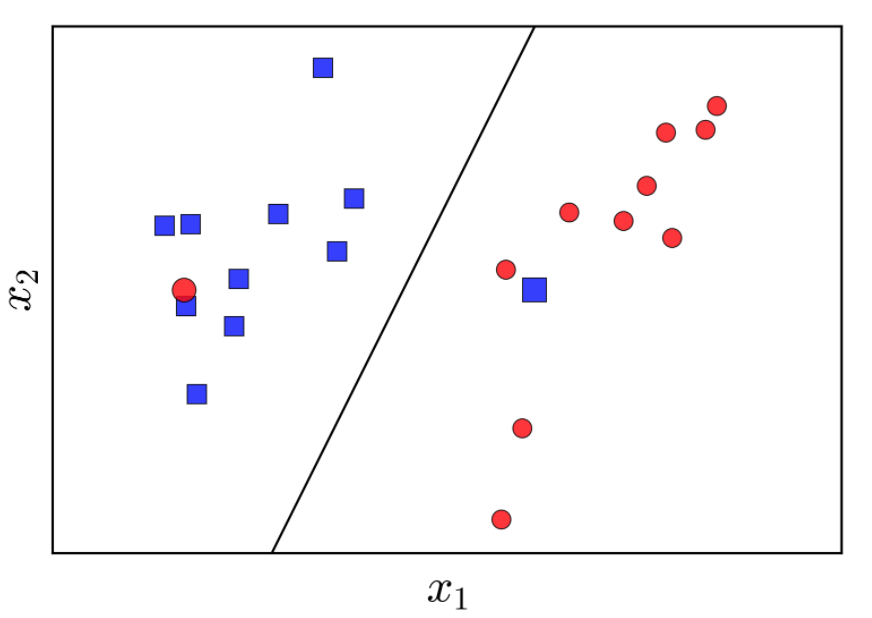